# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report, log_loss, accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import variation
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings

## 1.Tree-Based Methods

### (b) Data Preparation

#### i. Research what types of techniques are usually used for dealing with data with missing values. 2 Pick at least one of them and apply it to this data in the next steps.


Some data imputation techniques to handle missing values are as follows:

1) K Nearest Neighbors

2) Maximum or Minimum value

3) Missing value Prediction (Using a model)

4) Filling the missing values with Mean or Median

5) Filling with next or previous value

In [30]:
df_train = pd.read_csv('../data/HW6/aps_failure_training_set.csv',header=None,skiprows=20)
df_train.columns = df_train.iloc[0]
df_train = df_train[1:]
df_test = pd.read_csv('../data/HW6/aps_failure_test_set.csv',header=None,skiprows=20)
df_test.columns = df_test.iloc[0]
df_test = df_test[1:]

C:\Users\sojas\AppData\Local\Temp\ipykernel_5944\2995827459.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/HW6/aps_failure_training_set.csv',header=None,skiprows=20)
C:\Users\sojas\AppData\Local\Temp\ipykernel_5944\2995827459.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('../data/HW6/aps_failure_test_set.csv',header=None,skiprows=20)


In [3]:
df_train

0     class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
1       neg   76698     na  2130706438    280      0      0      0      0   
2       neg   33058     na           0     na      0      0      0      0   
3       neg   41040     na         228    100      0      0      0      0   
4       neg      12      0          70     66      0     10      0      0   
5       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59996   neg  153002     na         664    186      0      0      0      0   
59997   neg    2286     na  2130706538    224      0      0      0      0   
59998   neg     112      0  2130706432     18      0      0      0      0   
59999   neg   80292     na  2130706432    494      0      0      0      0   
60000   neg   40222     na         698    628      0      0      0      0   

0     ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
1          0  ...  1240520  493384   721044   469792   339156  157956   73224   
2          0  ...   421400  178064   293306   245416   133654   81140   97576   
3          0  ...   277378  159812   423992   409564   320746  158022   95128   
4          0  ...      240      46       58       44       10       0       0   
5          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59996      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59997      0  ...    10578    6760    21126    68424      136       0       0   
59998      0  ...      792     386      452      144      146    2622       0   
59999      0  ...   699352  222654   347378   225724   194440  165070  802280   
60000      0  ...   440066  183200   344546   254068   225148  158304  170384   

0      ee_009 ef_000 eg_000  
1           0      0      0  
2        1500      0      0  
3         514      0      0  
4           0      4     32  
5        1218      0      0  
...       ...    ...    ...  
59996   28588      0      0  
59997       0      0      0  
59998       0      0      0  
59999  388422      0      0  
60000     158      0      0  

[60000 rows x 171 columns]

In [4]:
df_test

0     class aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
1       neg     60      0          20     12      0      0      0      0   
2       neg     82      0          68     40      0      0      0      0   
3       neg  66002      2         212    112      0      0      0      0   
4       neg  59816     na        1010    936      0      0      0      0   
5       neg   1814     na         156    140      0      0      0      0   
...     ...    ...    ...         ...    ...    ...    ...    ...    ...   
15996   neg  81852     na  2130706432    892      0      0      0      0   
15997   neg     18      0          52     46      8     26      0      0   
15998   neg  79636     na        1670   1518      0      0      0      0   
15999   neg    110     na          36     32      0      0      0      0   
16000   neg      8      0           6      4      2      2      0      0   

0     ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
1          0  ...    1098     138     412     654       78      88       0   
2          0  ...    1068     276    1620     116       86     462       0   
3          0  ...  495076  380368  440134  269556  1315022  153680     516   
4          0  ...  540820  243270  483302  485332   431376  210074  281662   
5          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15996      0  ...  632658  273242  510354  373918   349840  317840  960024   
15997      0  ...     266      44      46      14        2       0       0   
15998      0  ...  806832  449962  778826  581558   375498  222866  358934   
15999      0  ...     588     210     180     544     1004    1338      74   
16000      0  ...      46      10      48      14       42      46       0   

0     ee_009 ef_000 eg_000  
1          0      0      0  
2          0      0      0  
3          0      0      0  
4       3232      0      0  
5          0      0      0  
...      ...    ...    ...  
15996  25566      0      0  
15997      0      0      0  
15998  19548      0      0  
15999      0      0      0  
16000      0      0      0  

[16000 rows x 171 columns]

In [31]:
#train
df_train = df_train.replace({'neg': 0, 'pos': 1})
df_train = df_train.replace({'na': np.nan})
imp = SimpleImputer(missing_values = np.nan, strategy='mean')
df_train.loc[:] = imp.fit_transform(df_train)

#test
df_test = df_test.replace({'neg': 0, 'pos': 1})
df_test = df_test.replace({'na': np.nan})
imp = SimpleImputer(missing_values = np.nan, strategy='mean')
df_test.loc[:] = imp.fit_transform(df_test)

C:\Users\sojas\AppData\Local\Temp\ipykernel_5944\260244436.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.loc[:] = imp.fit_transform(df_train)
C:\Users\sojas\AppData\Local\Temp\ipykernel_5944\260244436.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test.loc[:] = imp.fit_transform(df_test)


In [6]:
df_train

0      class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
1        0.0   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
2        0.0   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
3        0.0   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
4        0.0      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
5        0.0   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...       ...           ...            ...     ...     ...   
59996    0.0  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59997    0.0    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59998    0.0     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59999    0.0   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
60000    0.0   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

0      ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
1         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
2         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
3         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
4         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
5         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59996     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59997     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59998     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59999     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
60000     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

0         ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
1       339156.0  157956.0   73224.0       0.0     0.0     0.0  
2       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
3       320746.0  158022.0   95128.0     514.0     0.0     0.0  
4           10.0       0.0       0.0       0.0     4.0    32.0  
5       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59996  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59997      136.0       0.0       0.0       0.0     0.0     0.0  
59998      146.0    2622.0       0.0       0.0     0.0     0.0  
59999   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
60000   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [7]:
df_test

0      class   aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
1        0.0     60.0  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
2        0.0     82.0  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
3        0.0  66002.0  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
4        0.0  59816.0  0.772065  1.010000e+03   936.0     0.0     0.0     0.0   
5        0.0   1814.0  0.772065  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...      ...       ...           ...     ...     ...     ...     ...   
15996    0.0  81852.0  0.772065  2.130706e+09   892.0     0.0     0.0     0.0   
15997    0.0     18.0  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15998    0.0  79636.0  0.772065  1.670000e+03  1518.0     0.0     0.0     0.0   
15999    0.0    110.0  0.772065  3.600000e+01    32.0     0.0     0.0     0.0   
16000    0.0      8.0  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

0      ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
1         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
2         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
3         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
4         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
5         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15996     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15997     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15998     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15999     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
16000     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

0        ee_007    ee_008   ee_009  ef_000  eg_000  
1          88.0       0.0      0.0     0.0     0.0  
2         462.0       0.0      0.0     0.0     0.0  
3      153680.0     516.0      0.0     0.0     0.0  
4      210074.0  281662.0   3232.0     0.0     0.0  
5         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15996  317840.0  960024.0  25566.0     0.0     0.0  
15997       0.0       0.0      0.0     0.0     0.0  
15998  222866.0  358934.0  19548.0     0.0     0.0  
15999    1338.0      74.0      0.0     0.0     0.0  
16000      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

#### ii. For each of the 170 features, calculate the coefficient of variation CV = sm, where s is sample standard deviation and m is sample mean.

In [17]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [27]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,1]

df_CV = []

for column in X_train.columns:
    CV = X_train[column].std() / X_train[column].mean()
    row = [column,CV]
    df_CV.append(row)
    
df_CV = pd.DataFrame(df_CV)
df_CV.columns = ['Feature Name', 'CV']
df_CV

Feature Name          CV
0         aa_000    2.450938
1         ab_000    2.328400
2         ac_000    2.169767
3         ad_000  183.847620
4         ae_000   23.190937
..           ...         ...
165       ee_007    4.962483
166       ee_008    3.222010
167       ee_009    5.626979
168       ef_000   47.124953
169       eg_000   40.553250

[170 rows x 2 columns]

#### iii. Plot a correlation matrix for your features using pandas or any other tool.

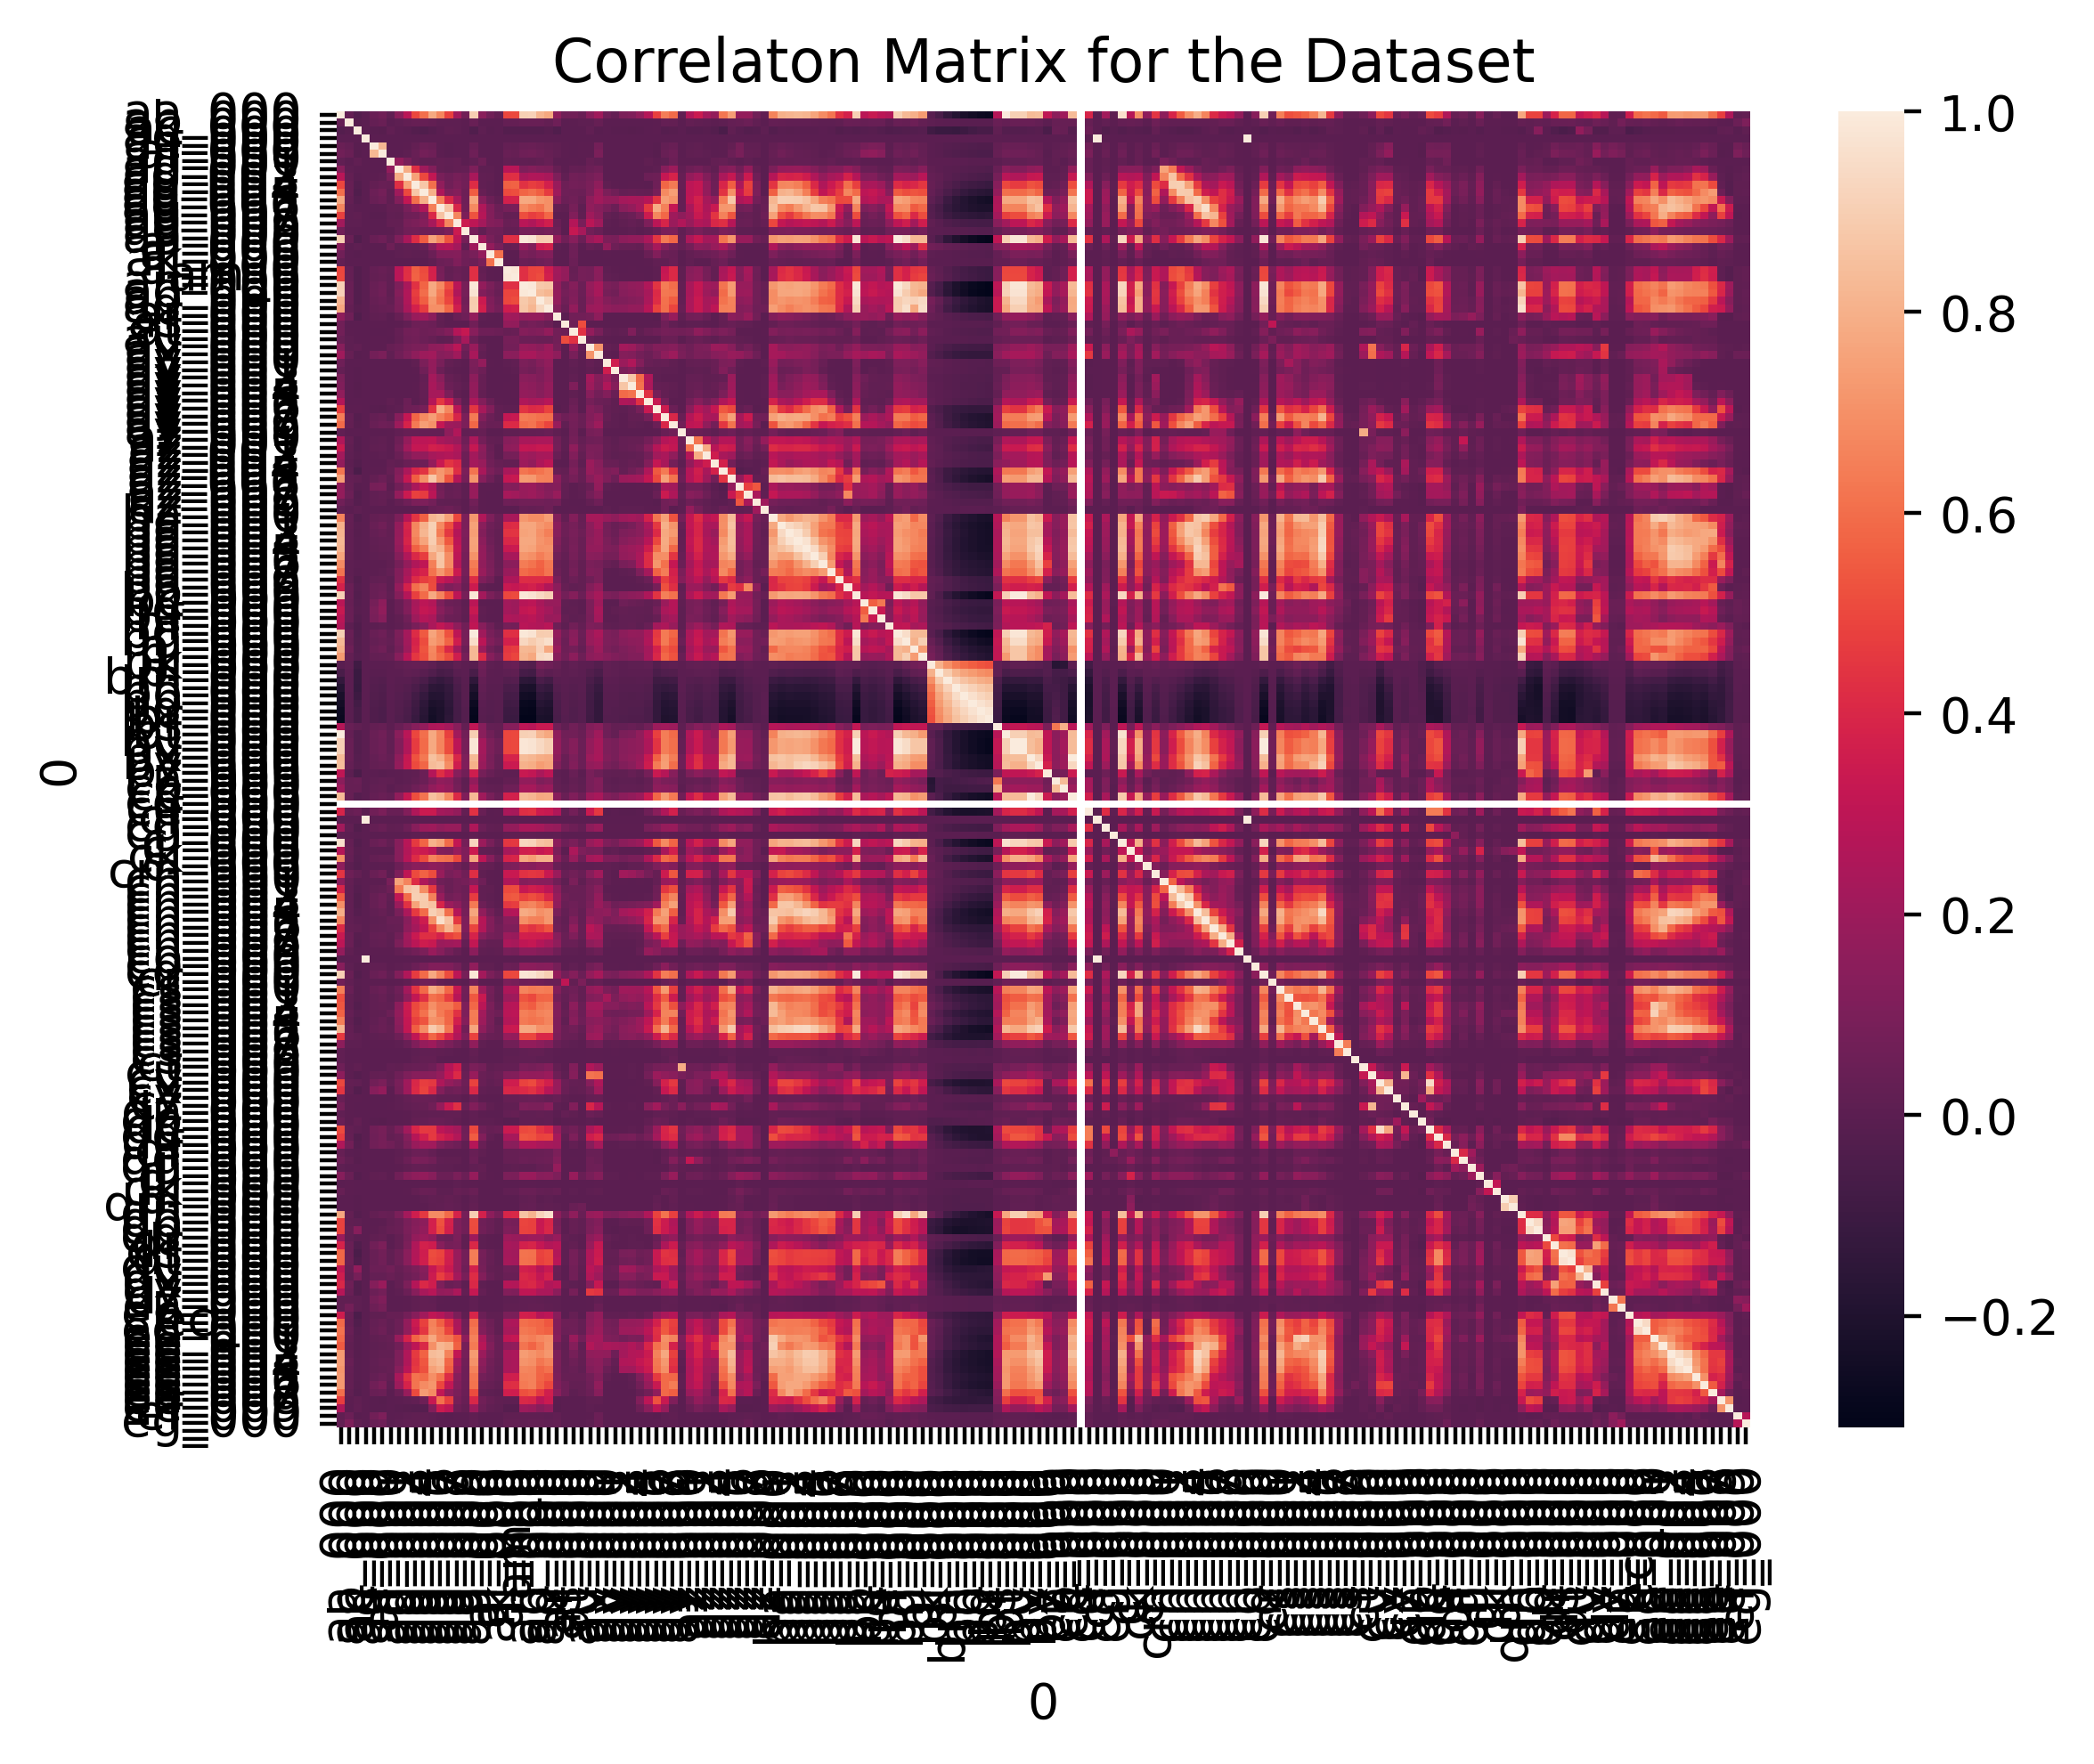

In [28]:
corr = X_train.corr()
plt.rcParams['figure.dpi'] = 400

sns.heatmap(corr, xticklabels = corr.columns.values, 
            yticklabels = corr.columns.values)

plt.title('Correlaton Matrix for the Dataset')

plt.show()

#### iv. Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [29]:
df_CV = df_CV.sort_values(by = 'CV', ascending = False)
n = int(math.sqrt(170))

train_features = list(df_CV['Feature Name'][:n])
train_features = train_features + ['class']
print(train_features)

['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000', 'class']


In [17]:
sns.pairplot(df_train[train_features],hue="class")

There are some trade offs between the features, but at this point we cannot give any assurance just by looking at the scatter plots

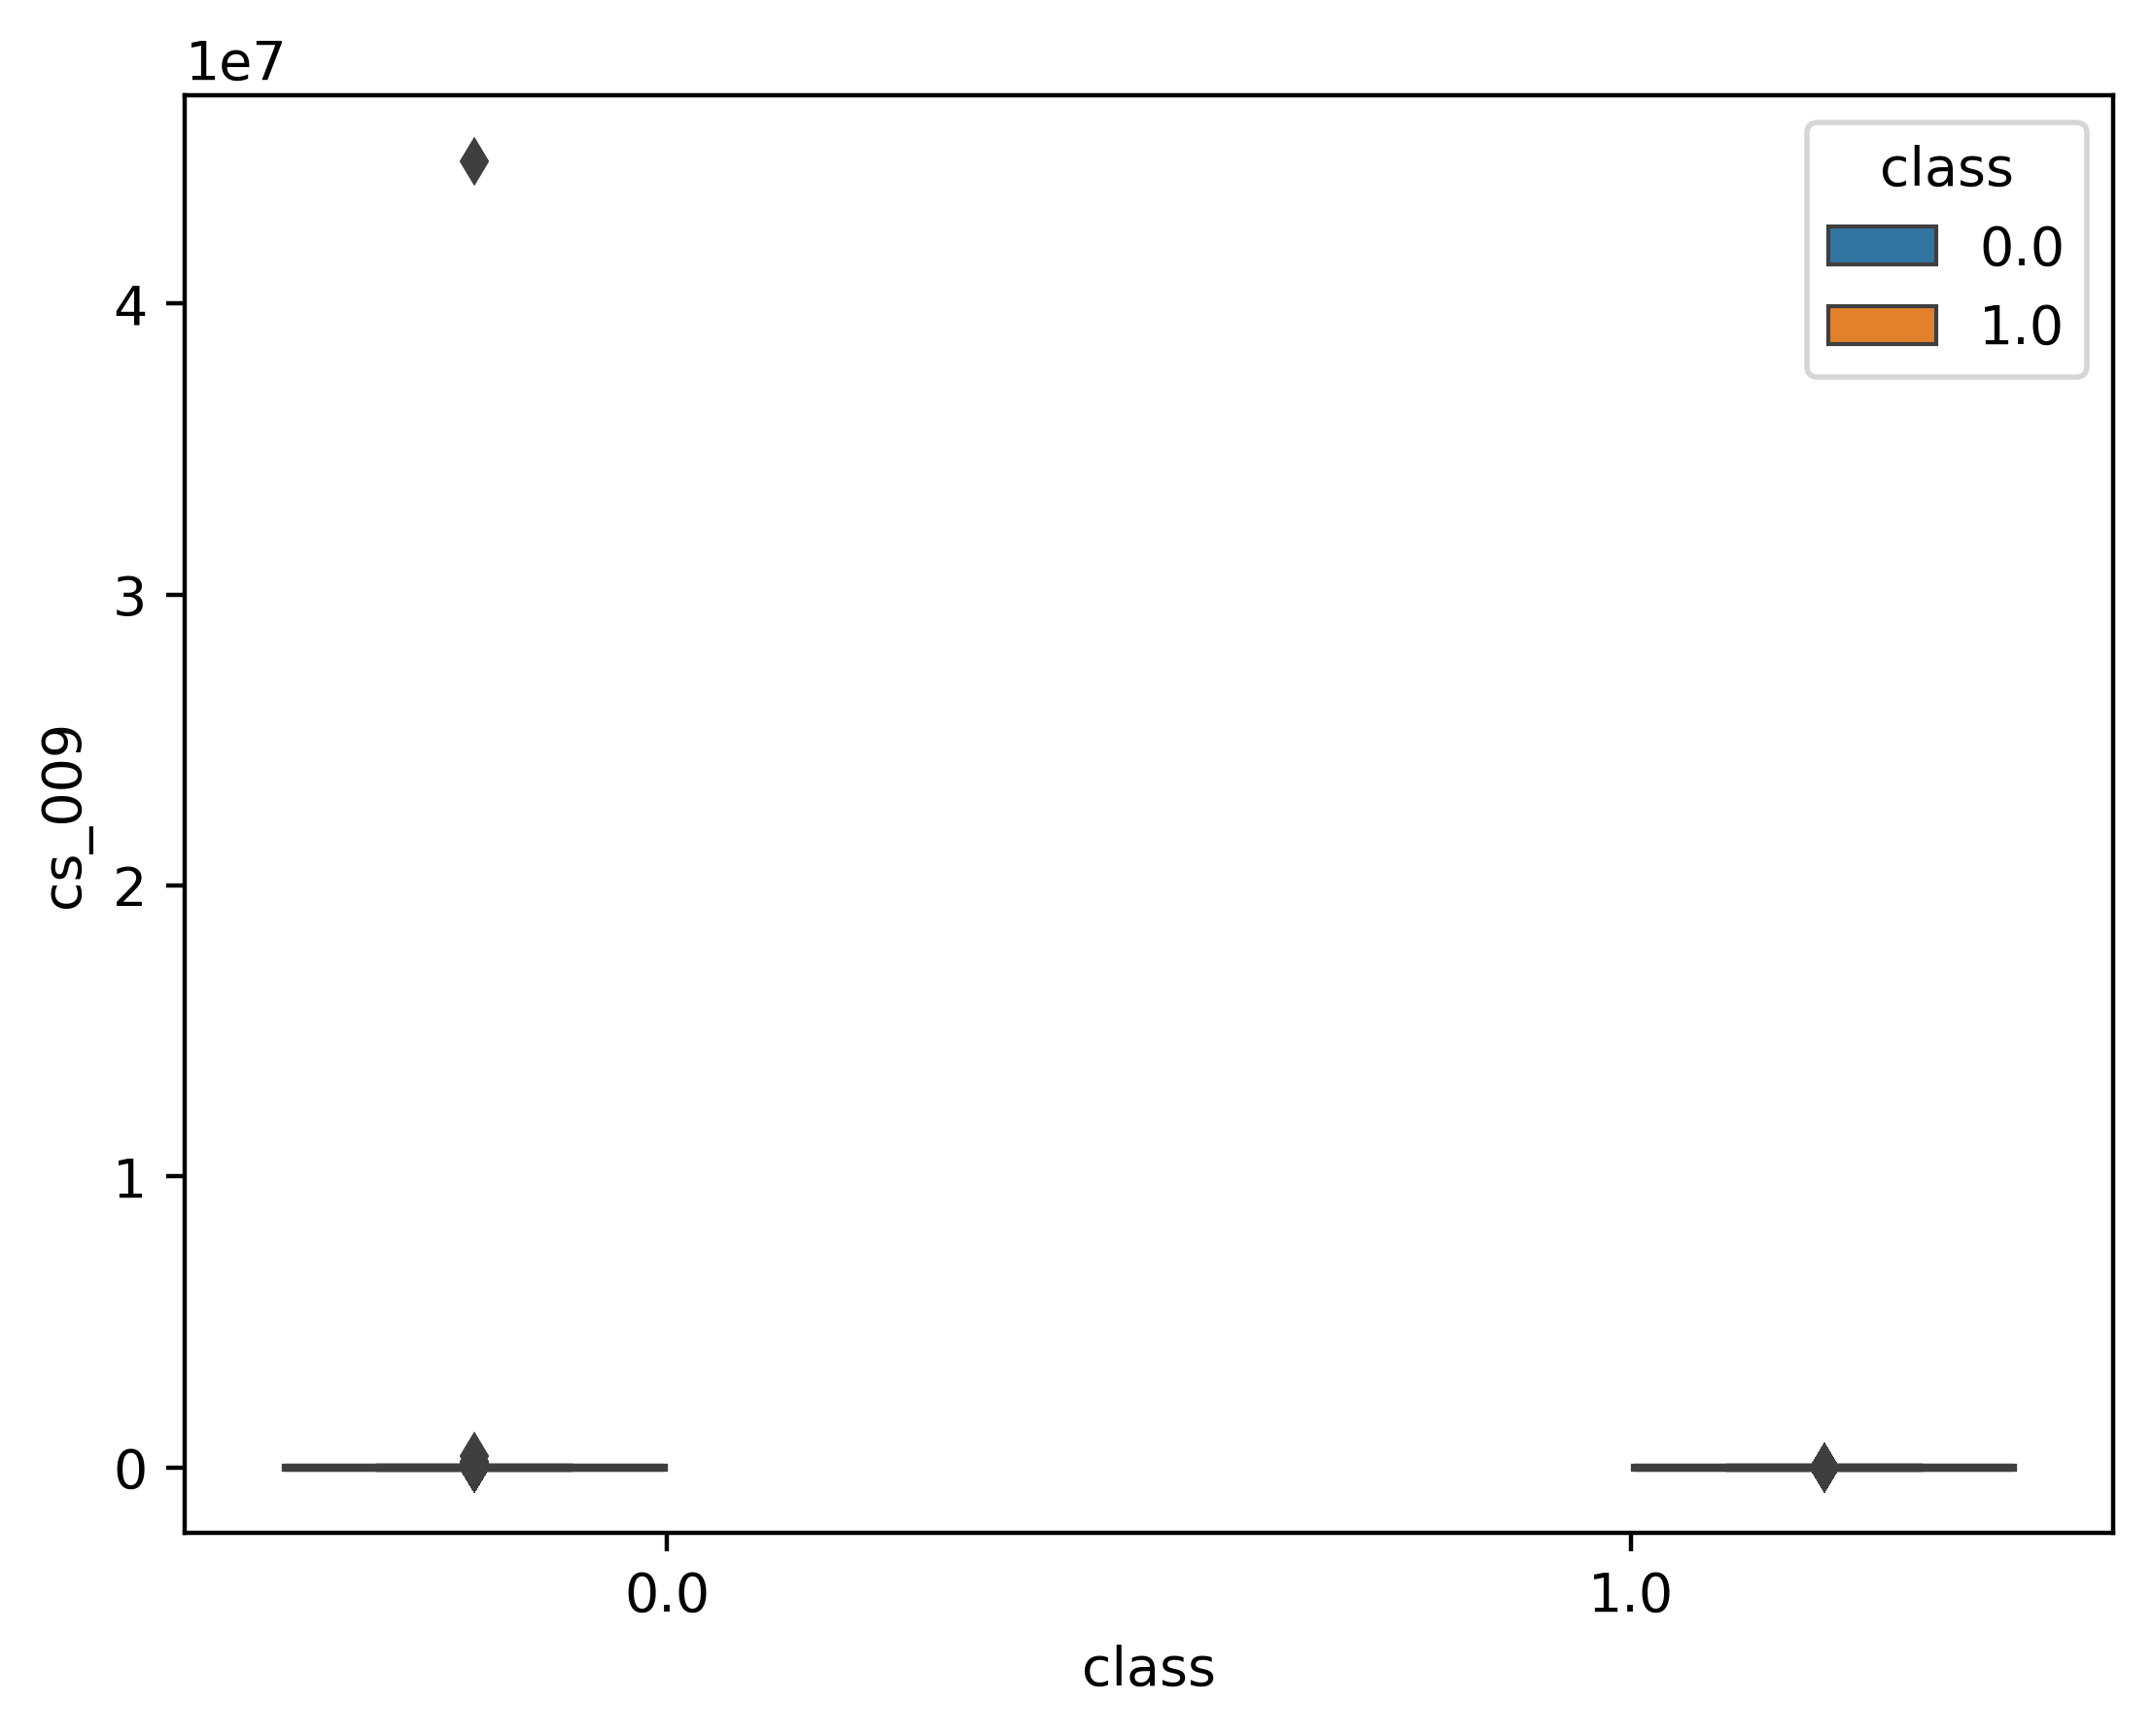

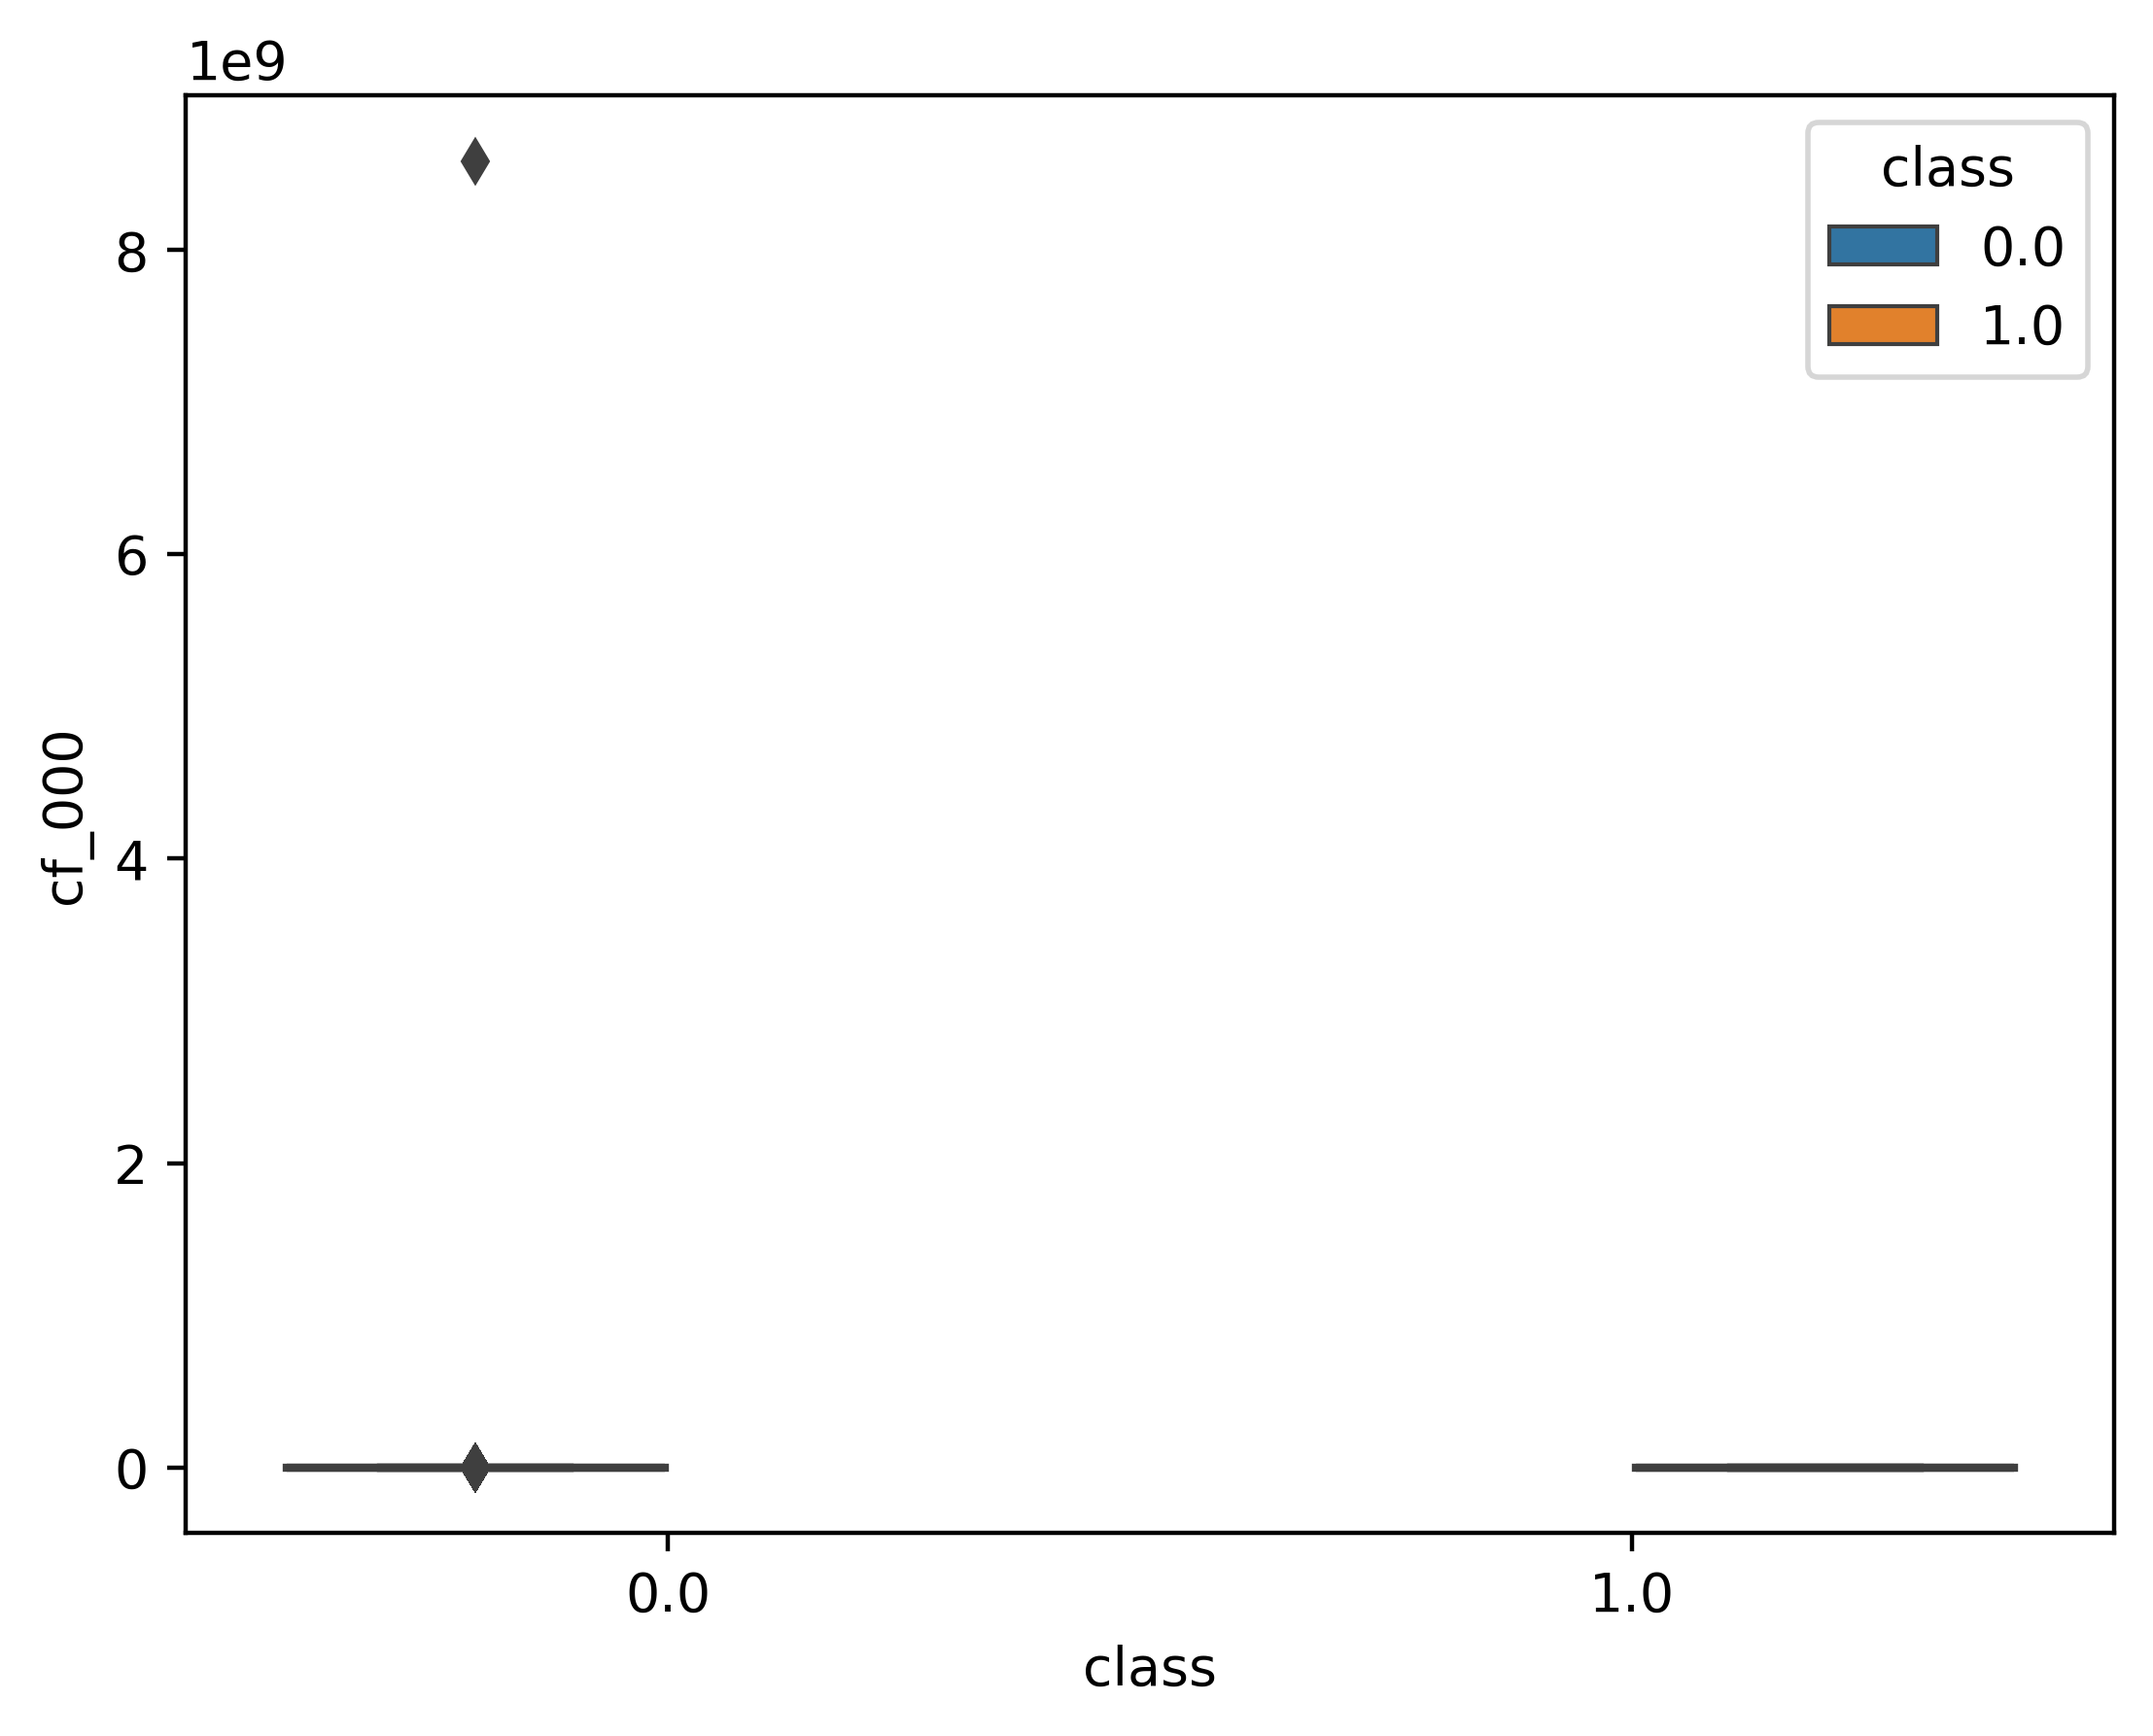

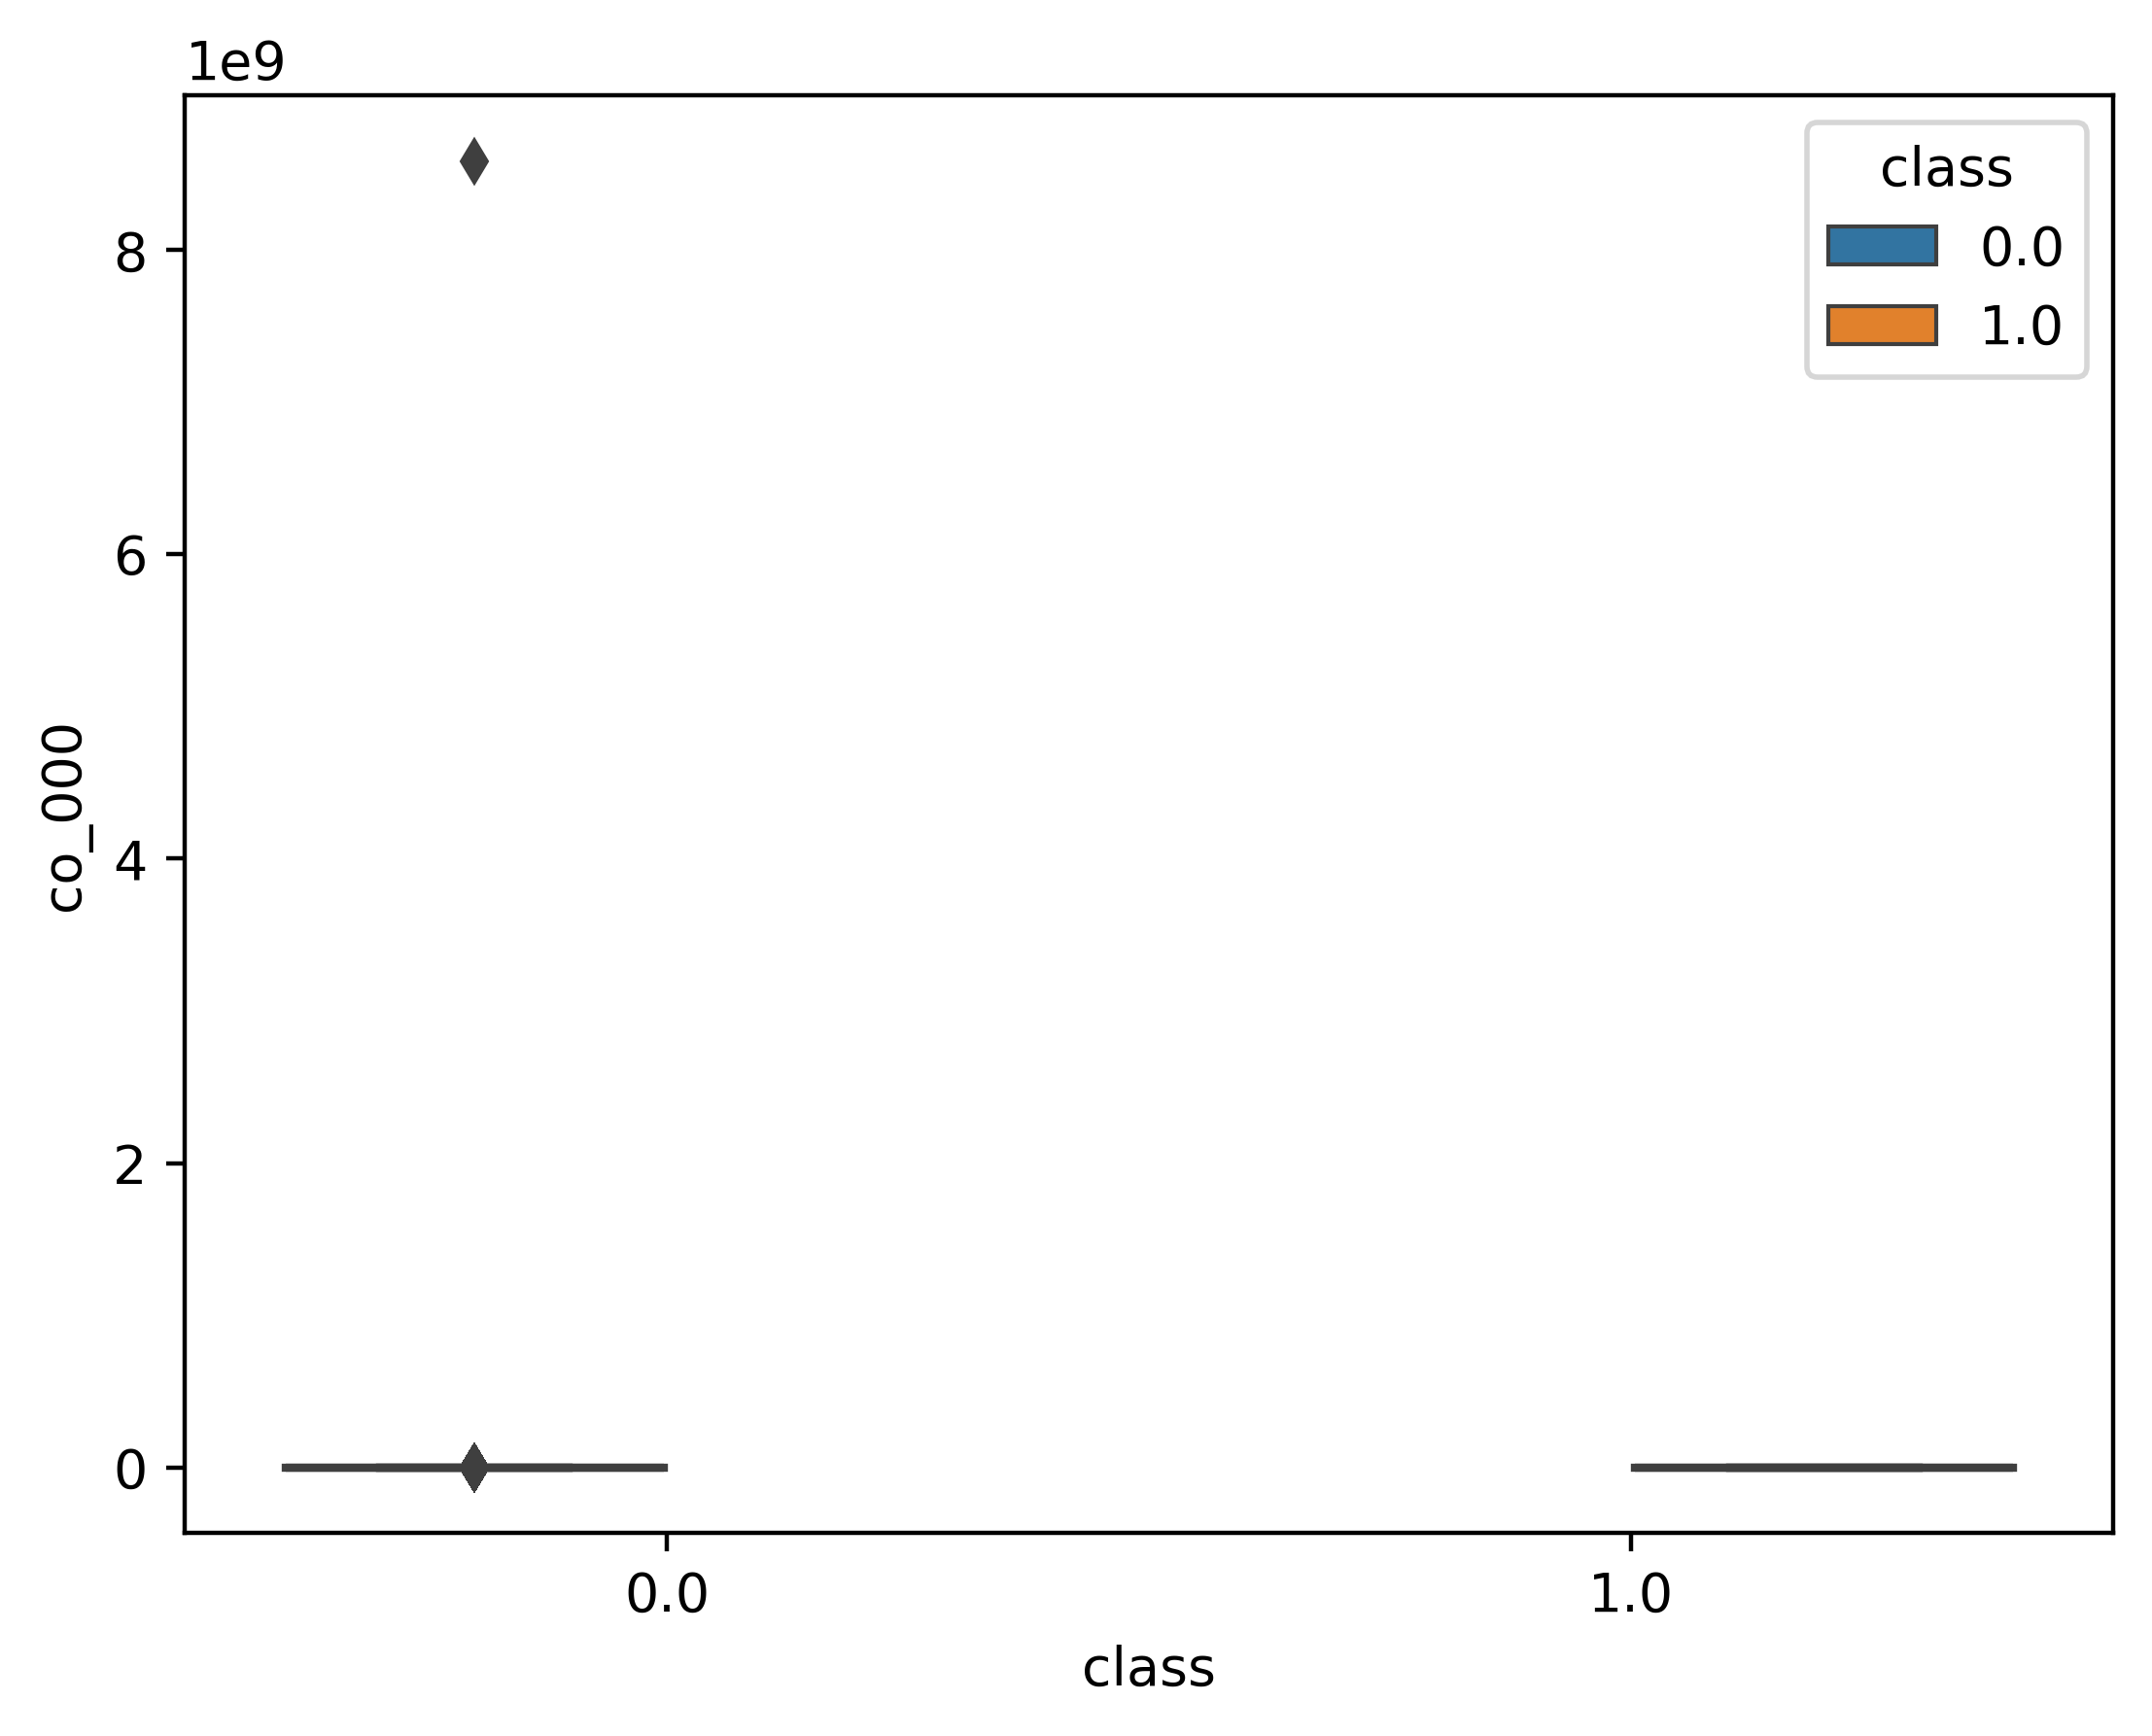

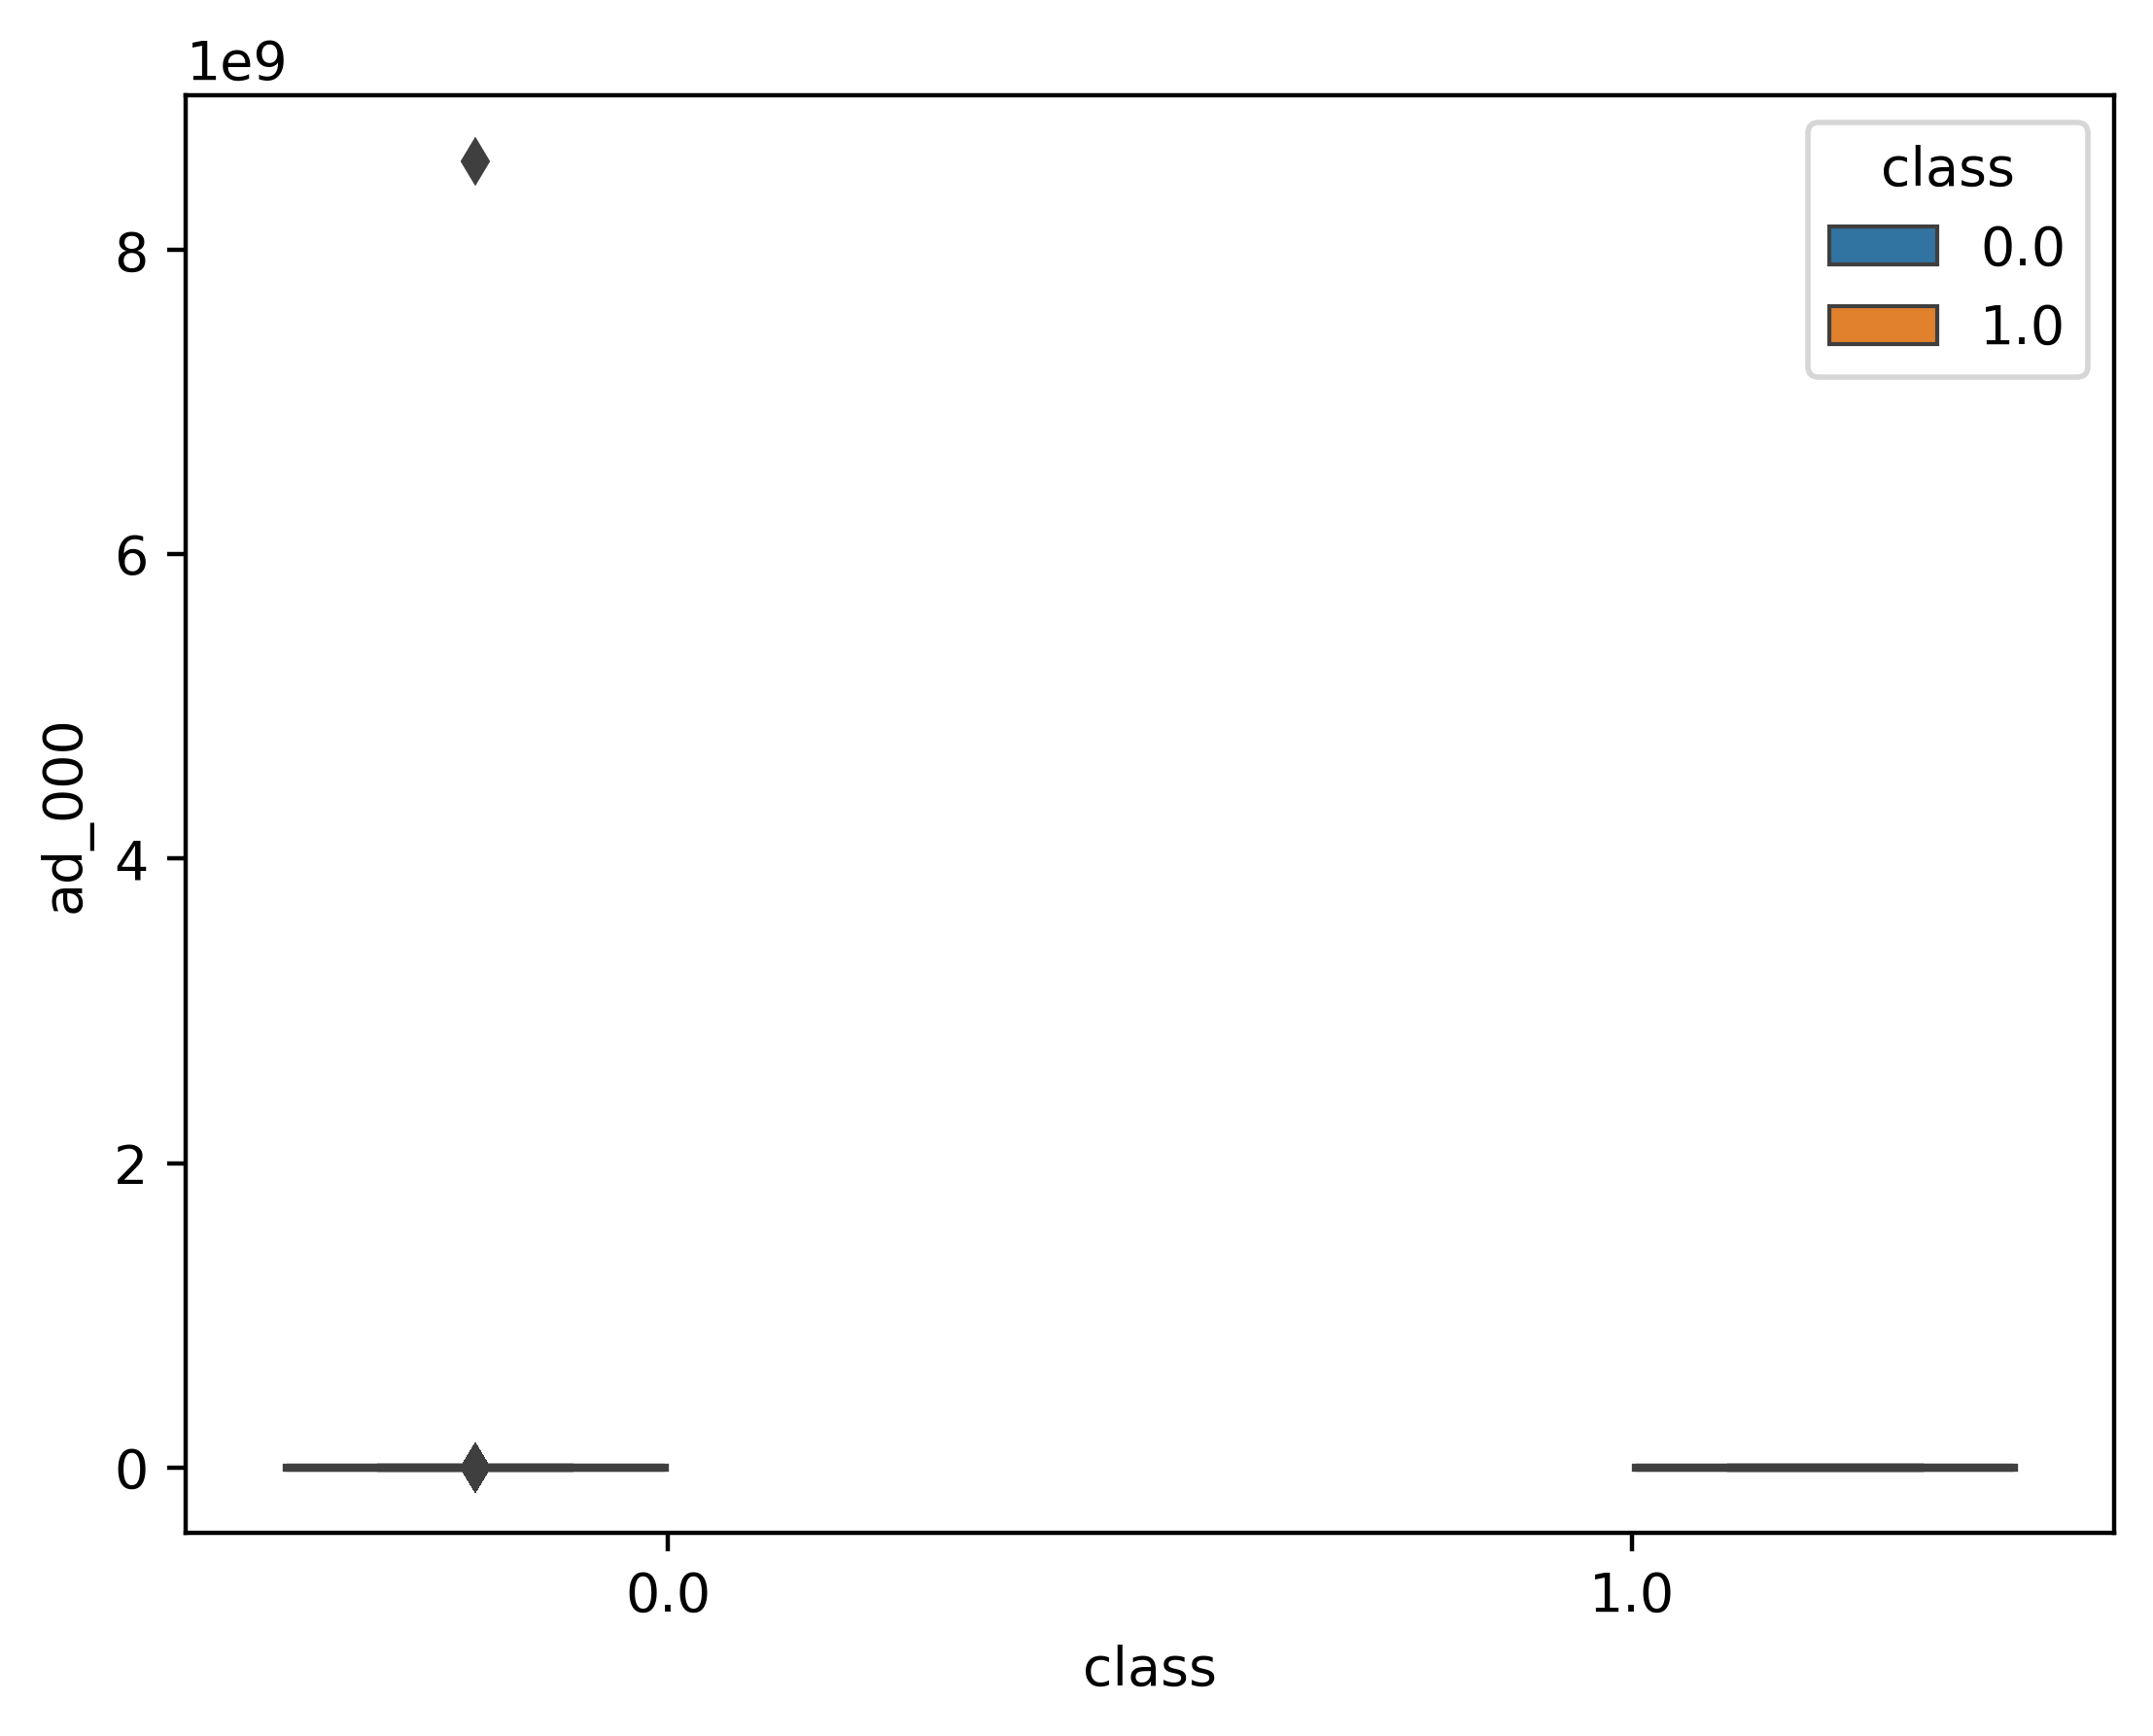

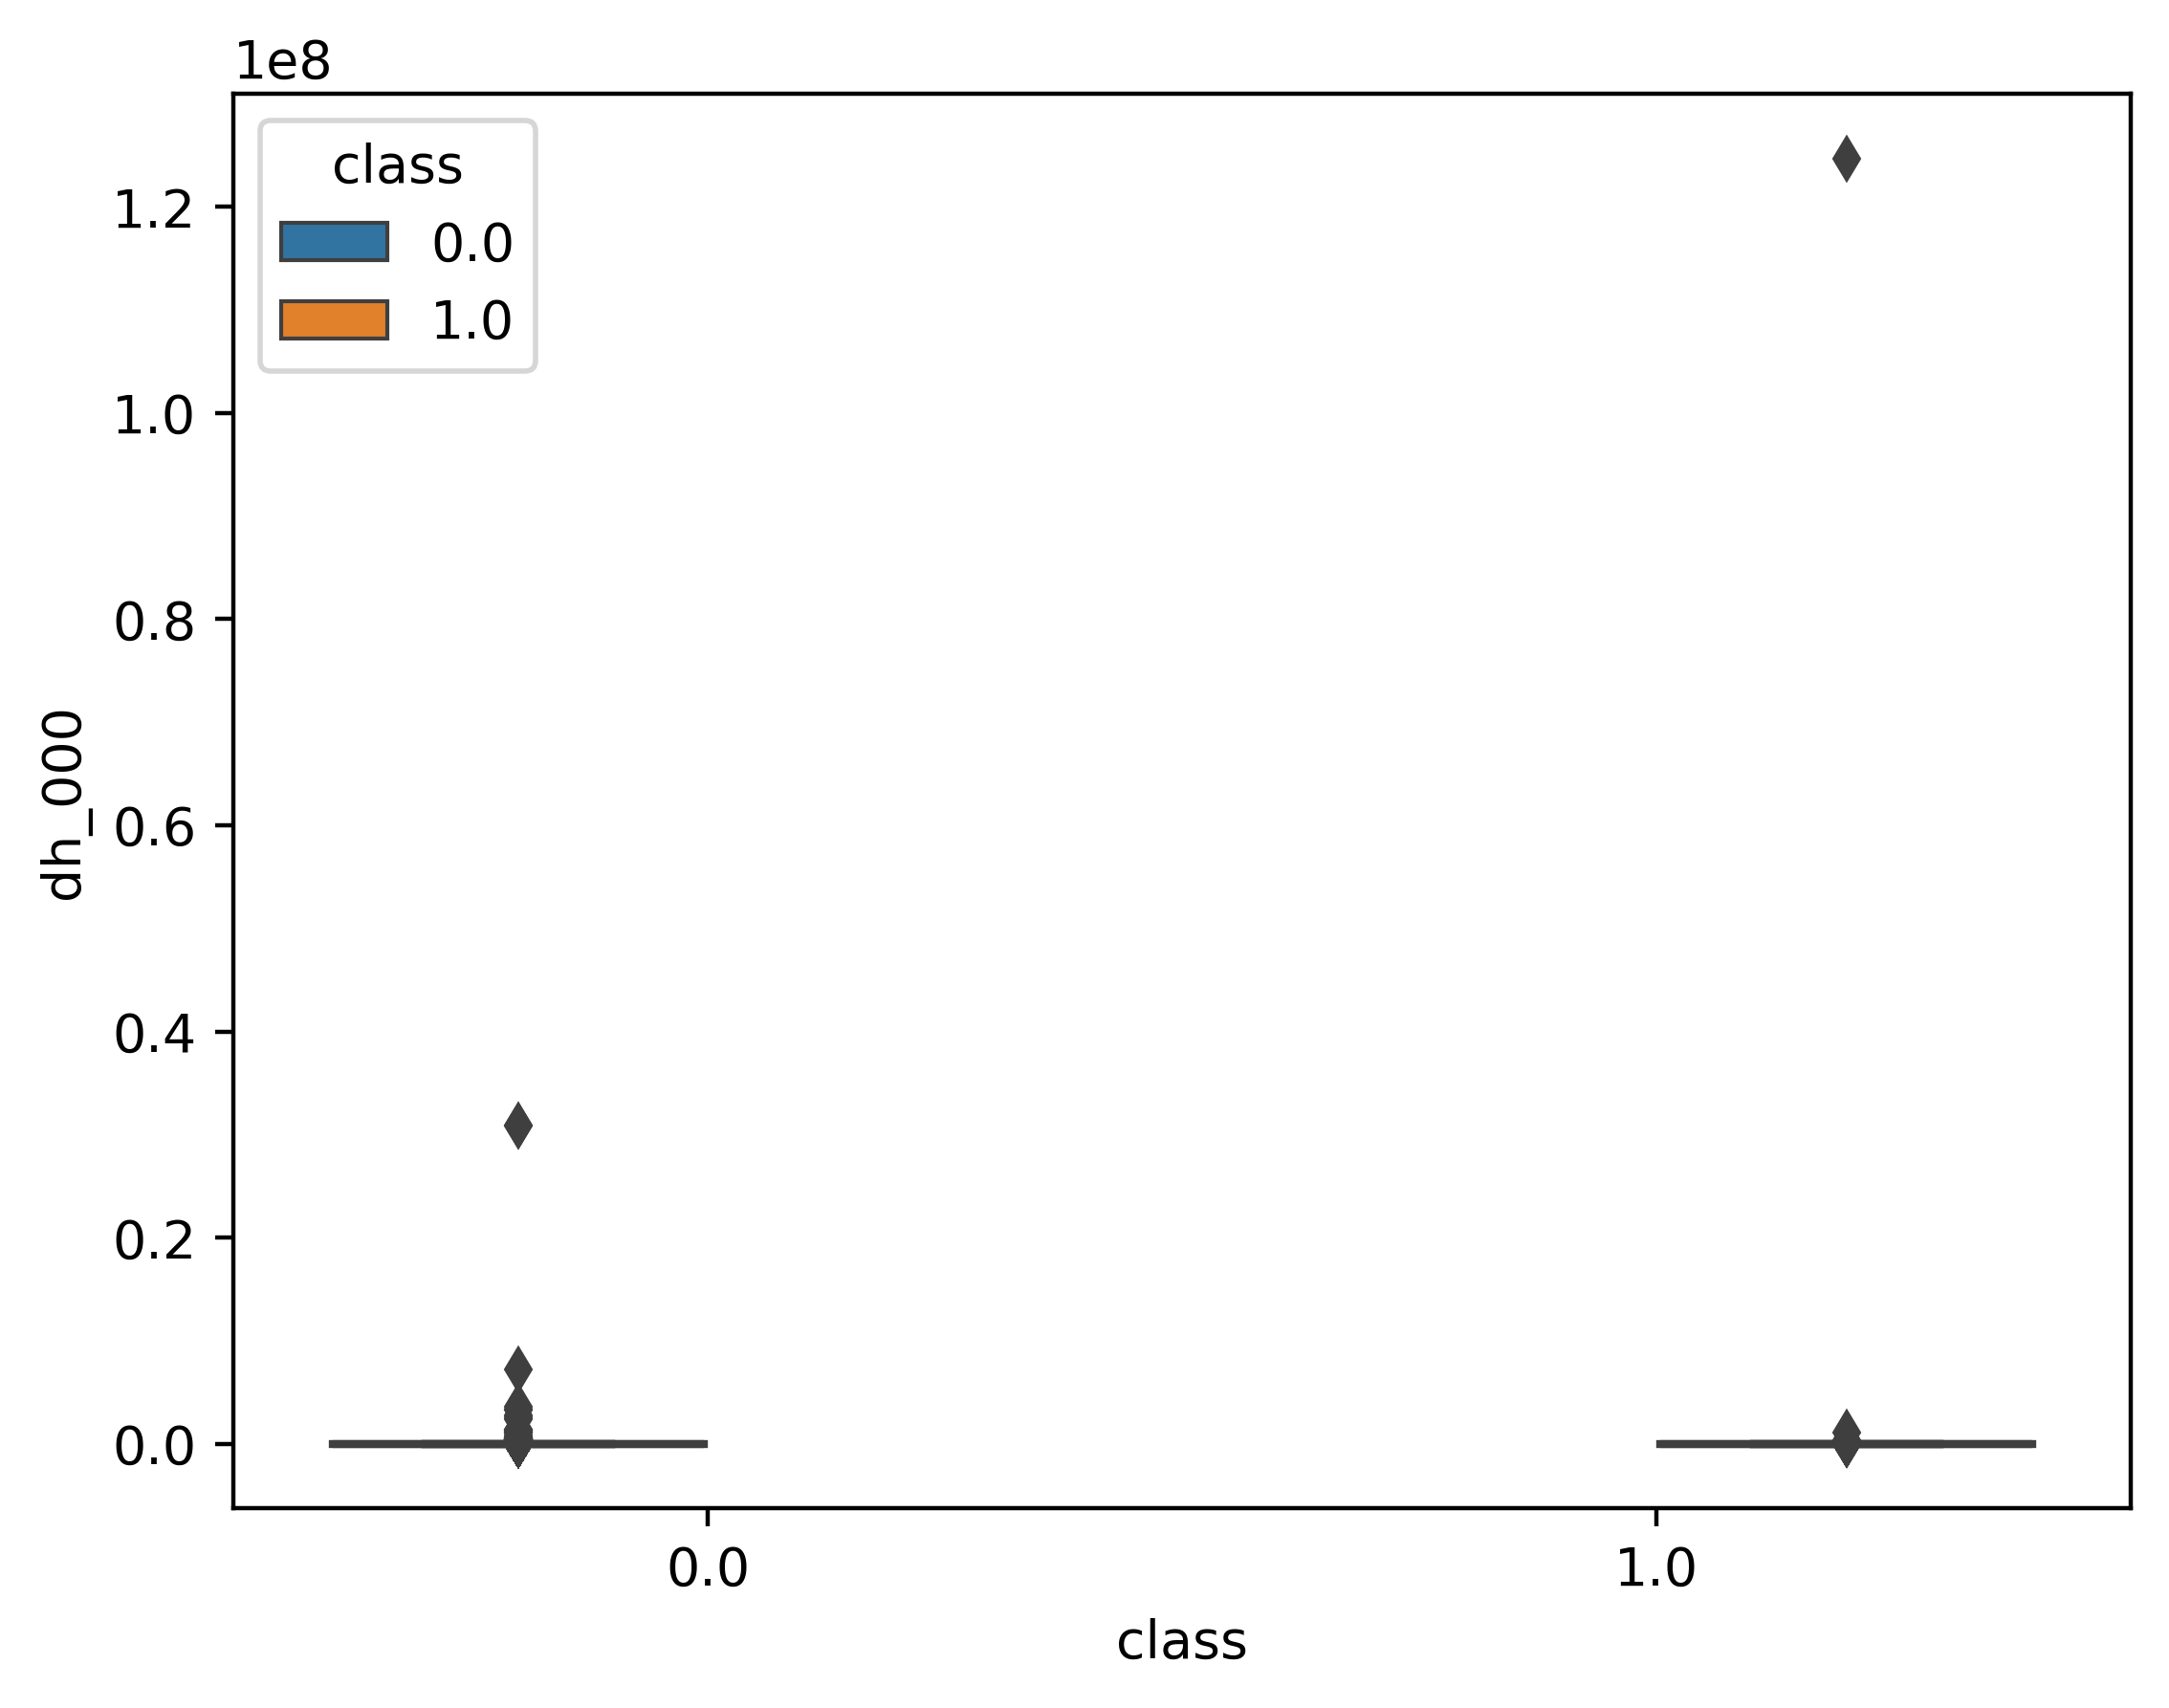

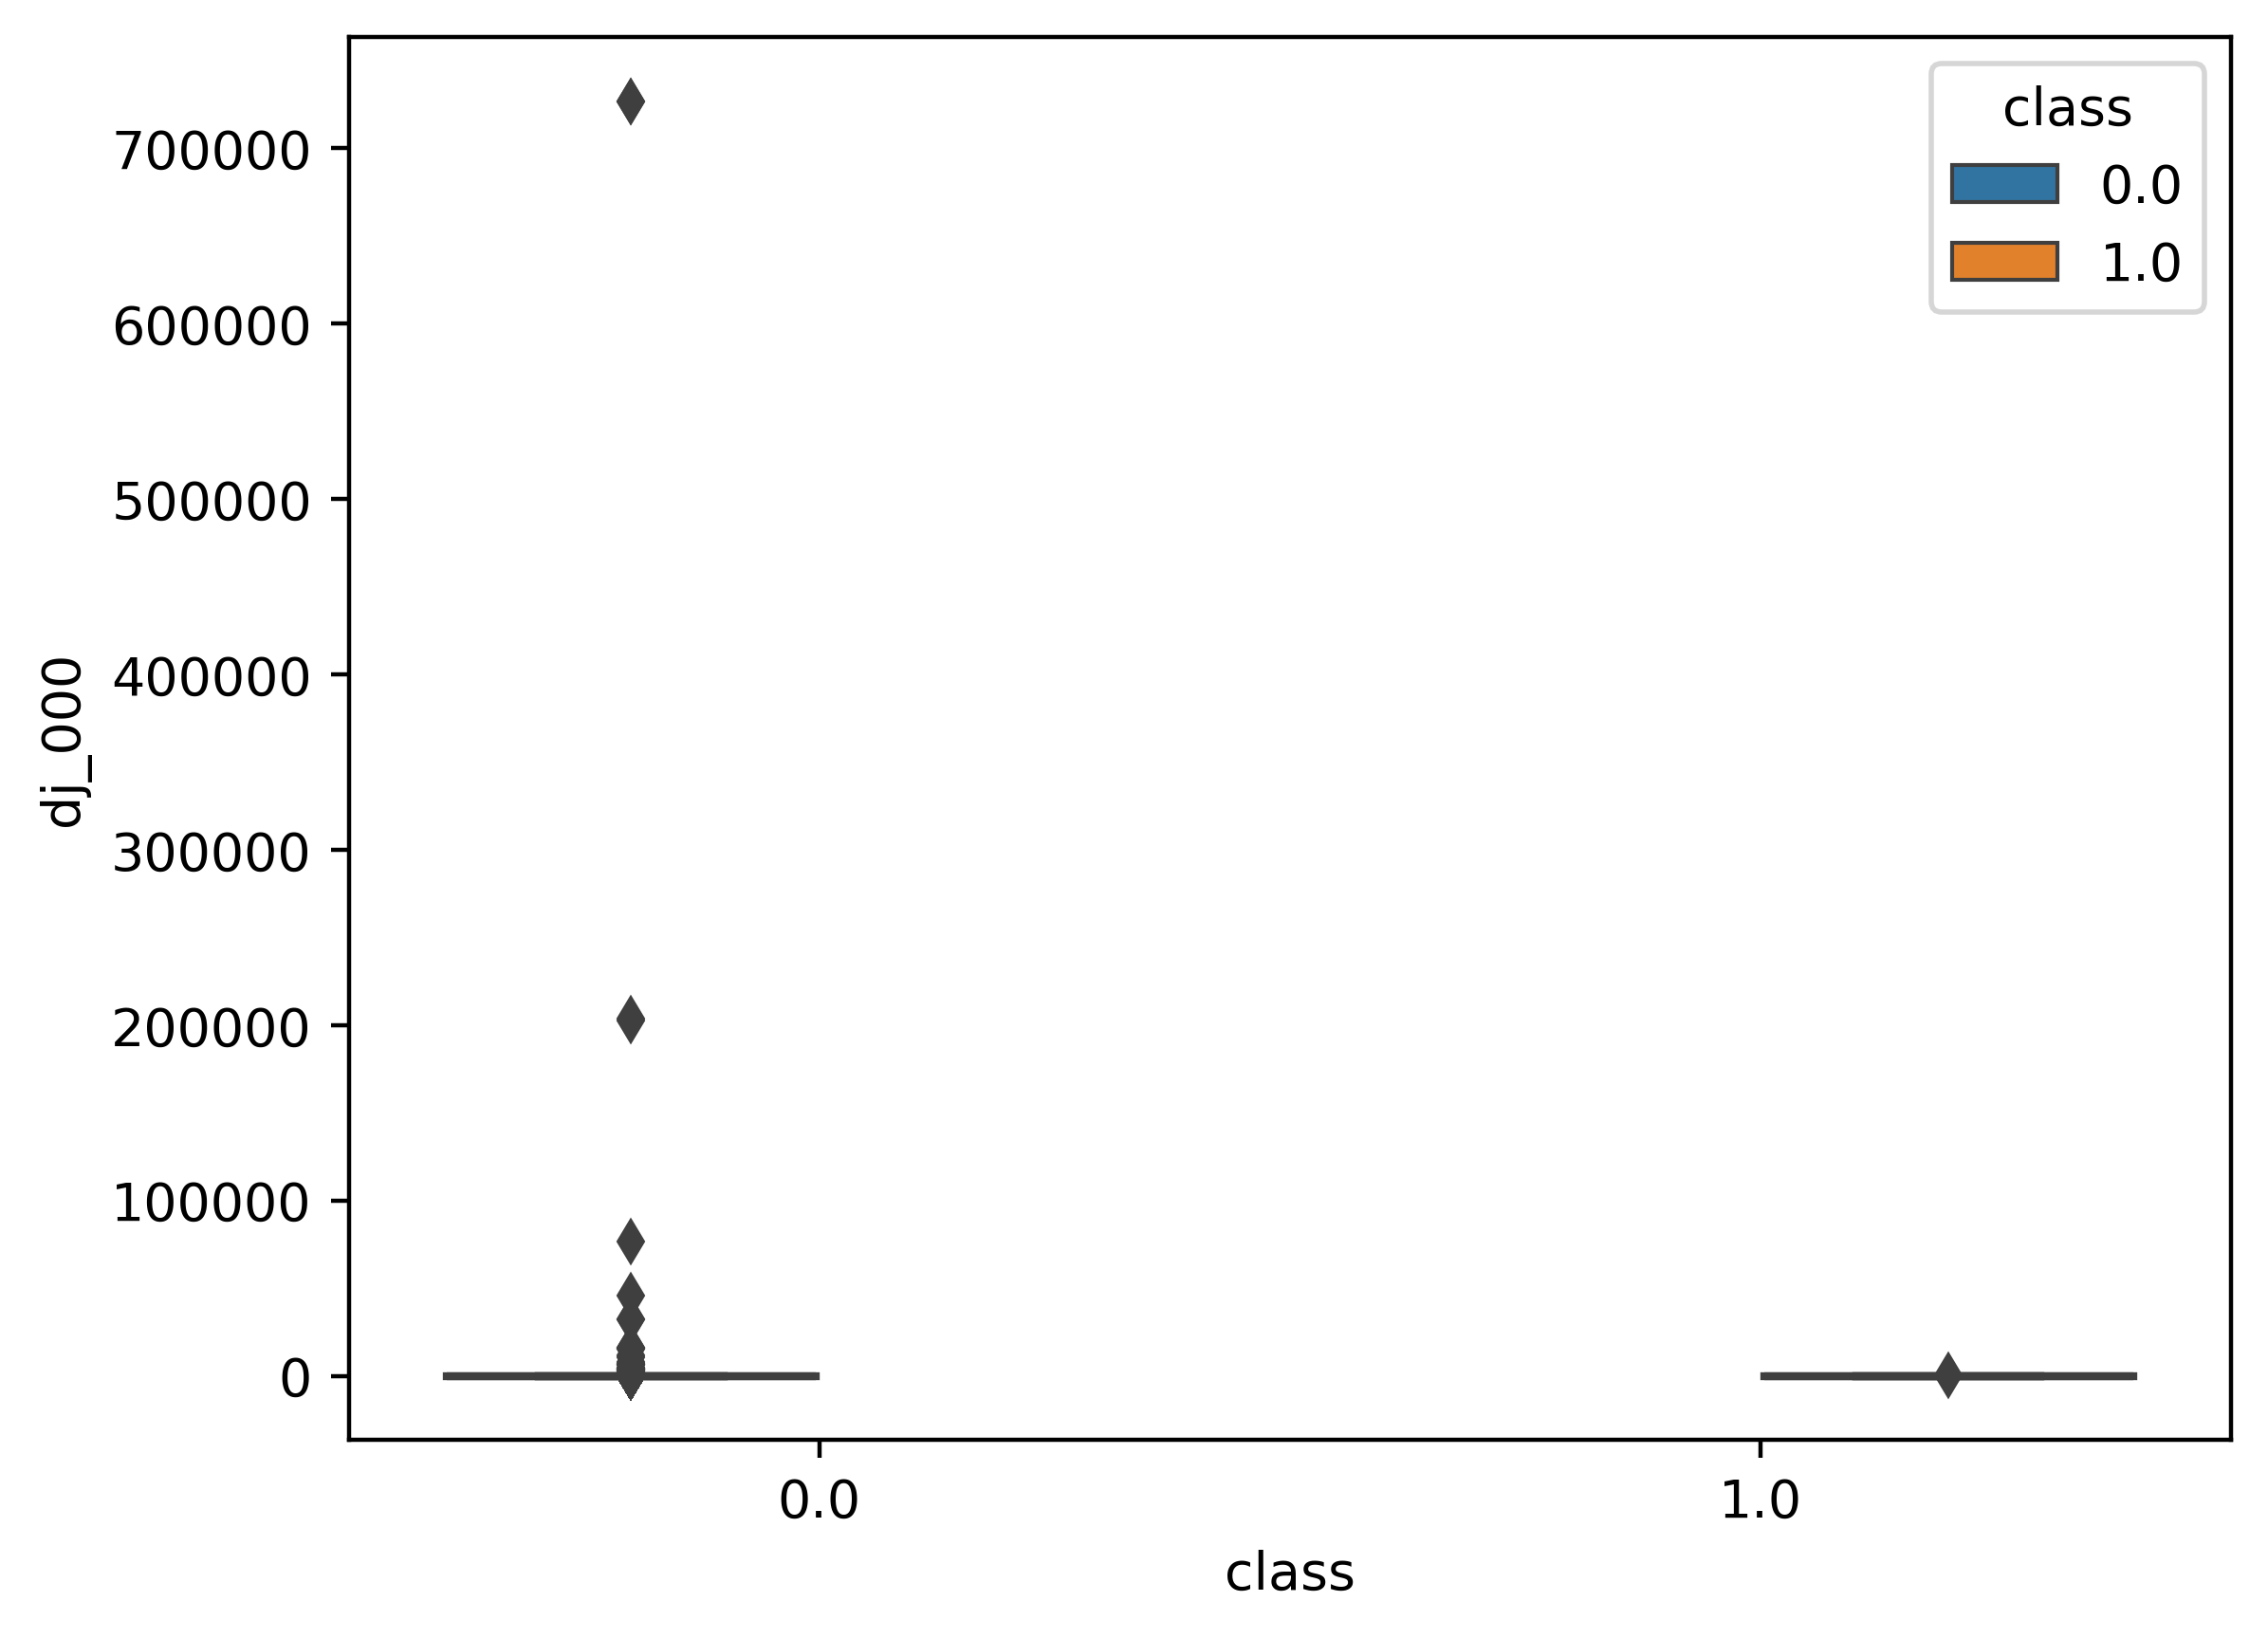

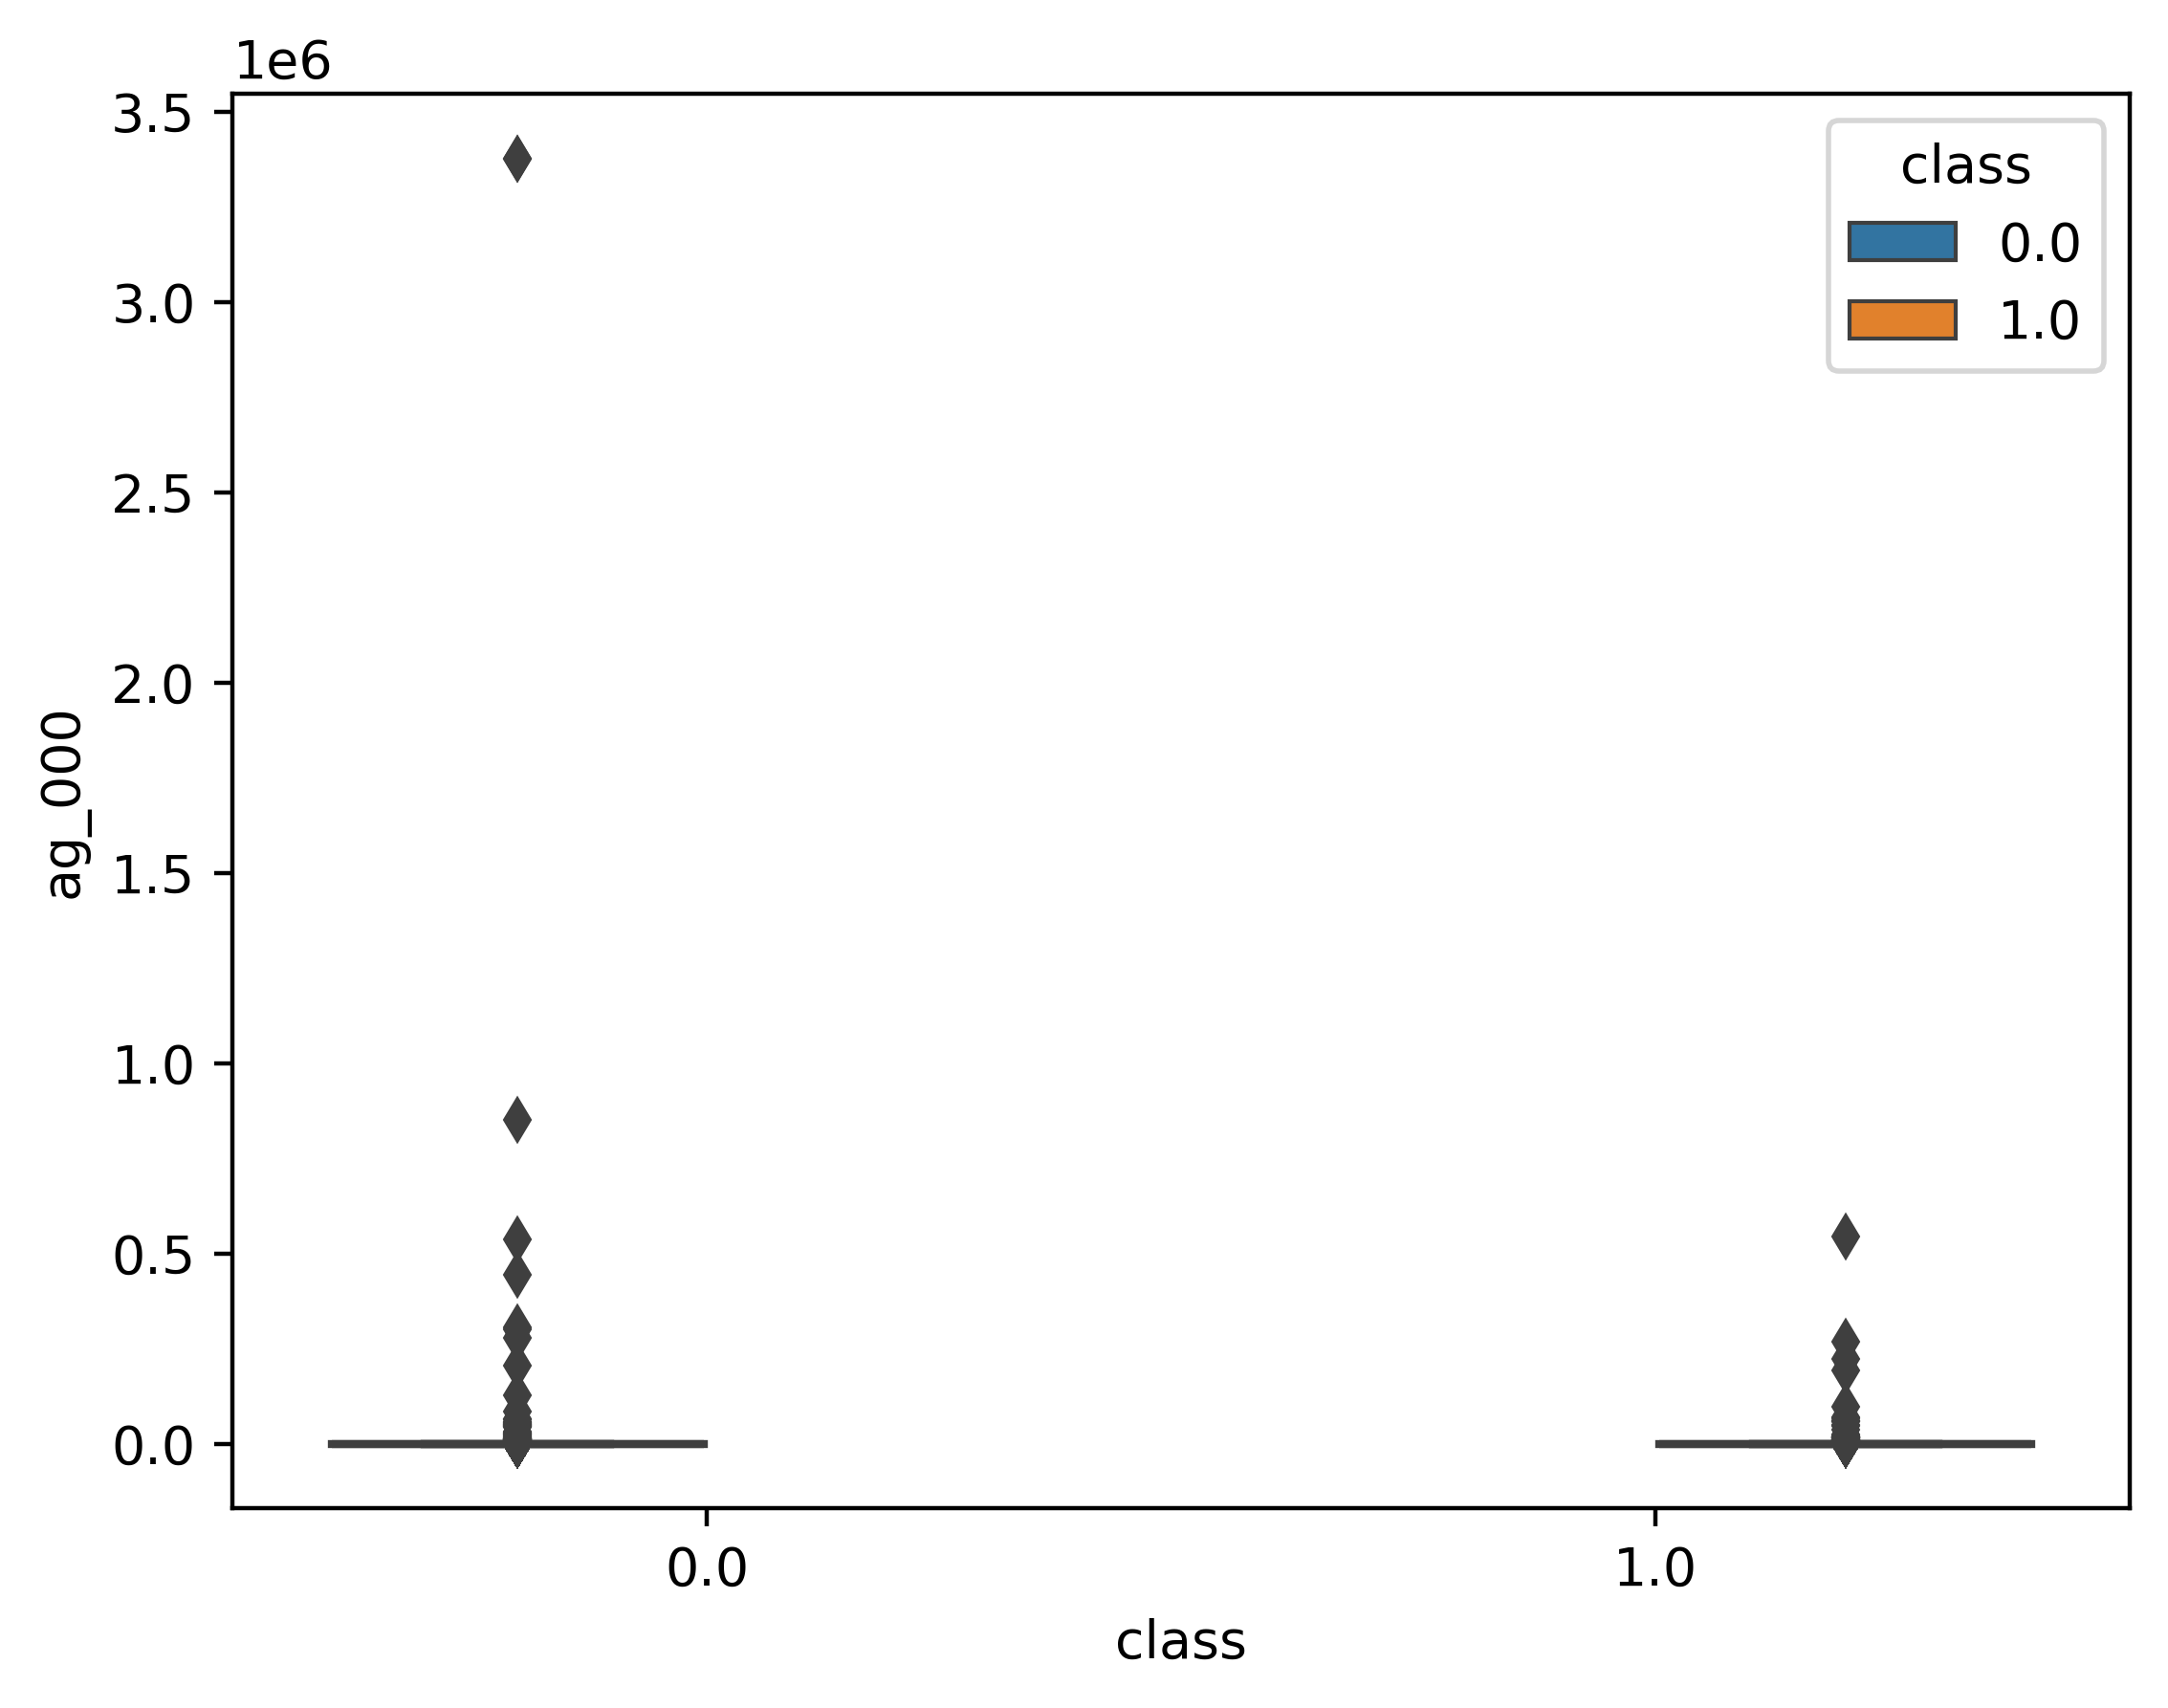

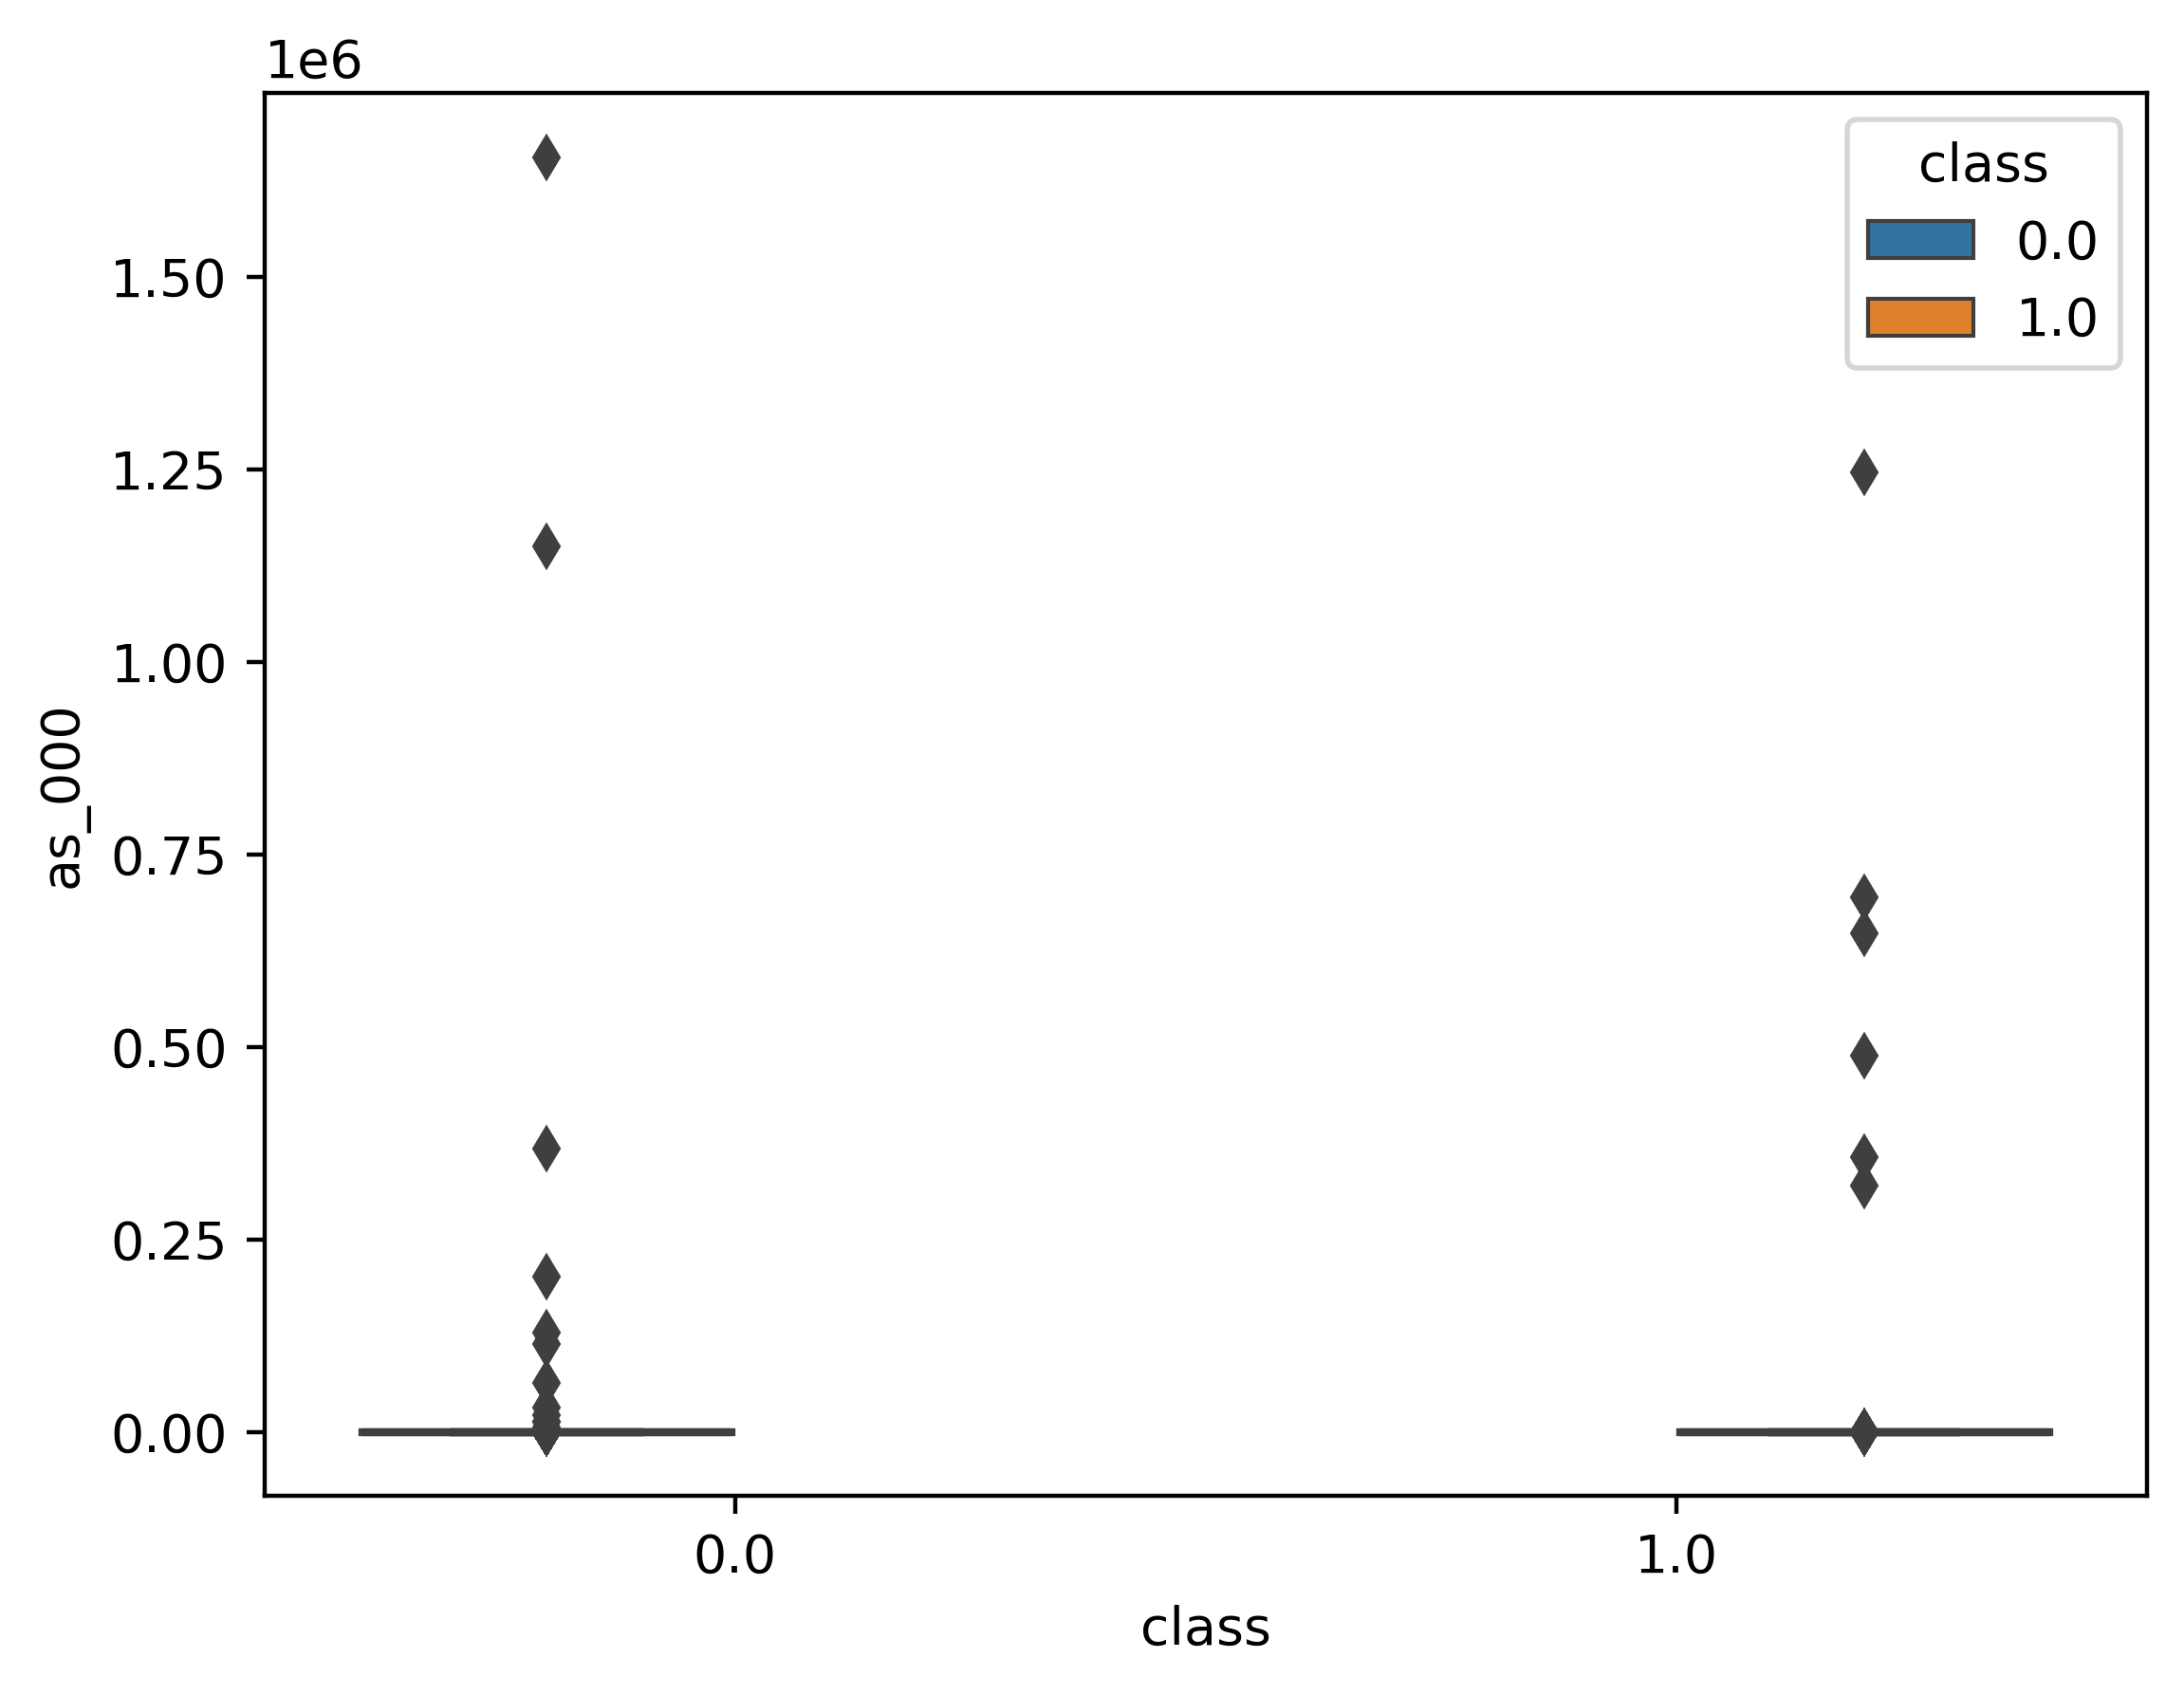

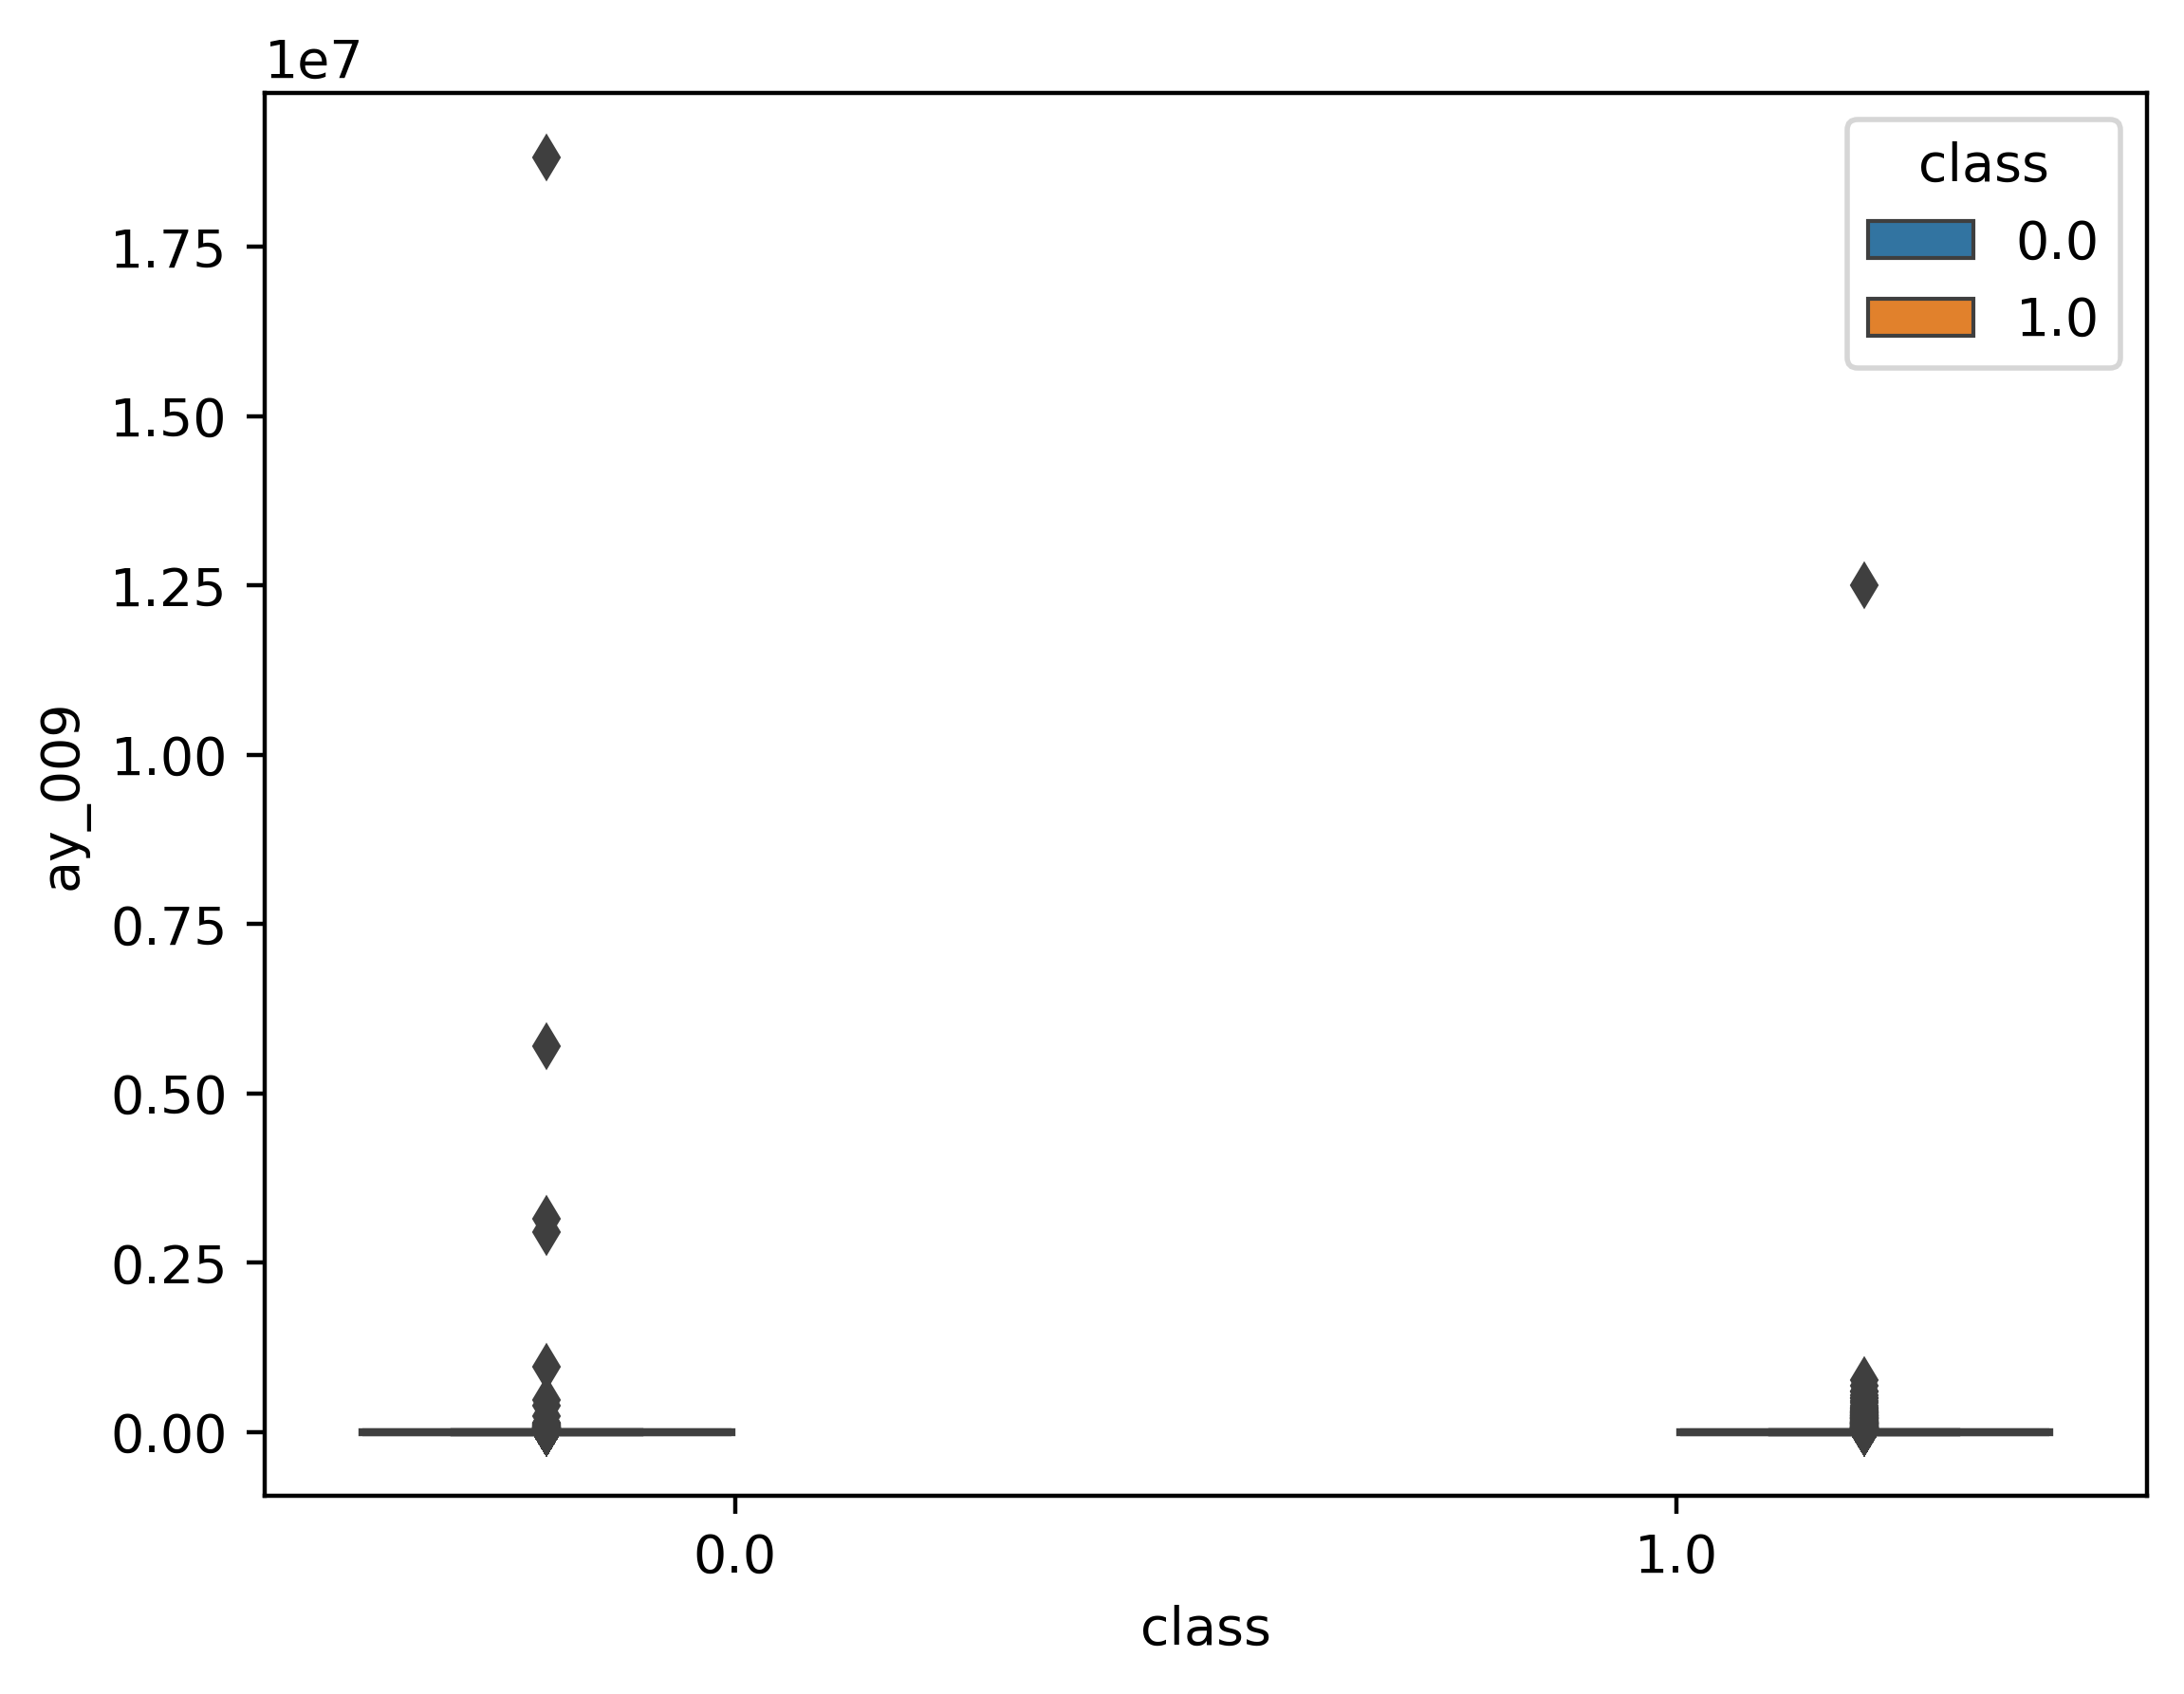

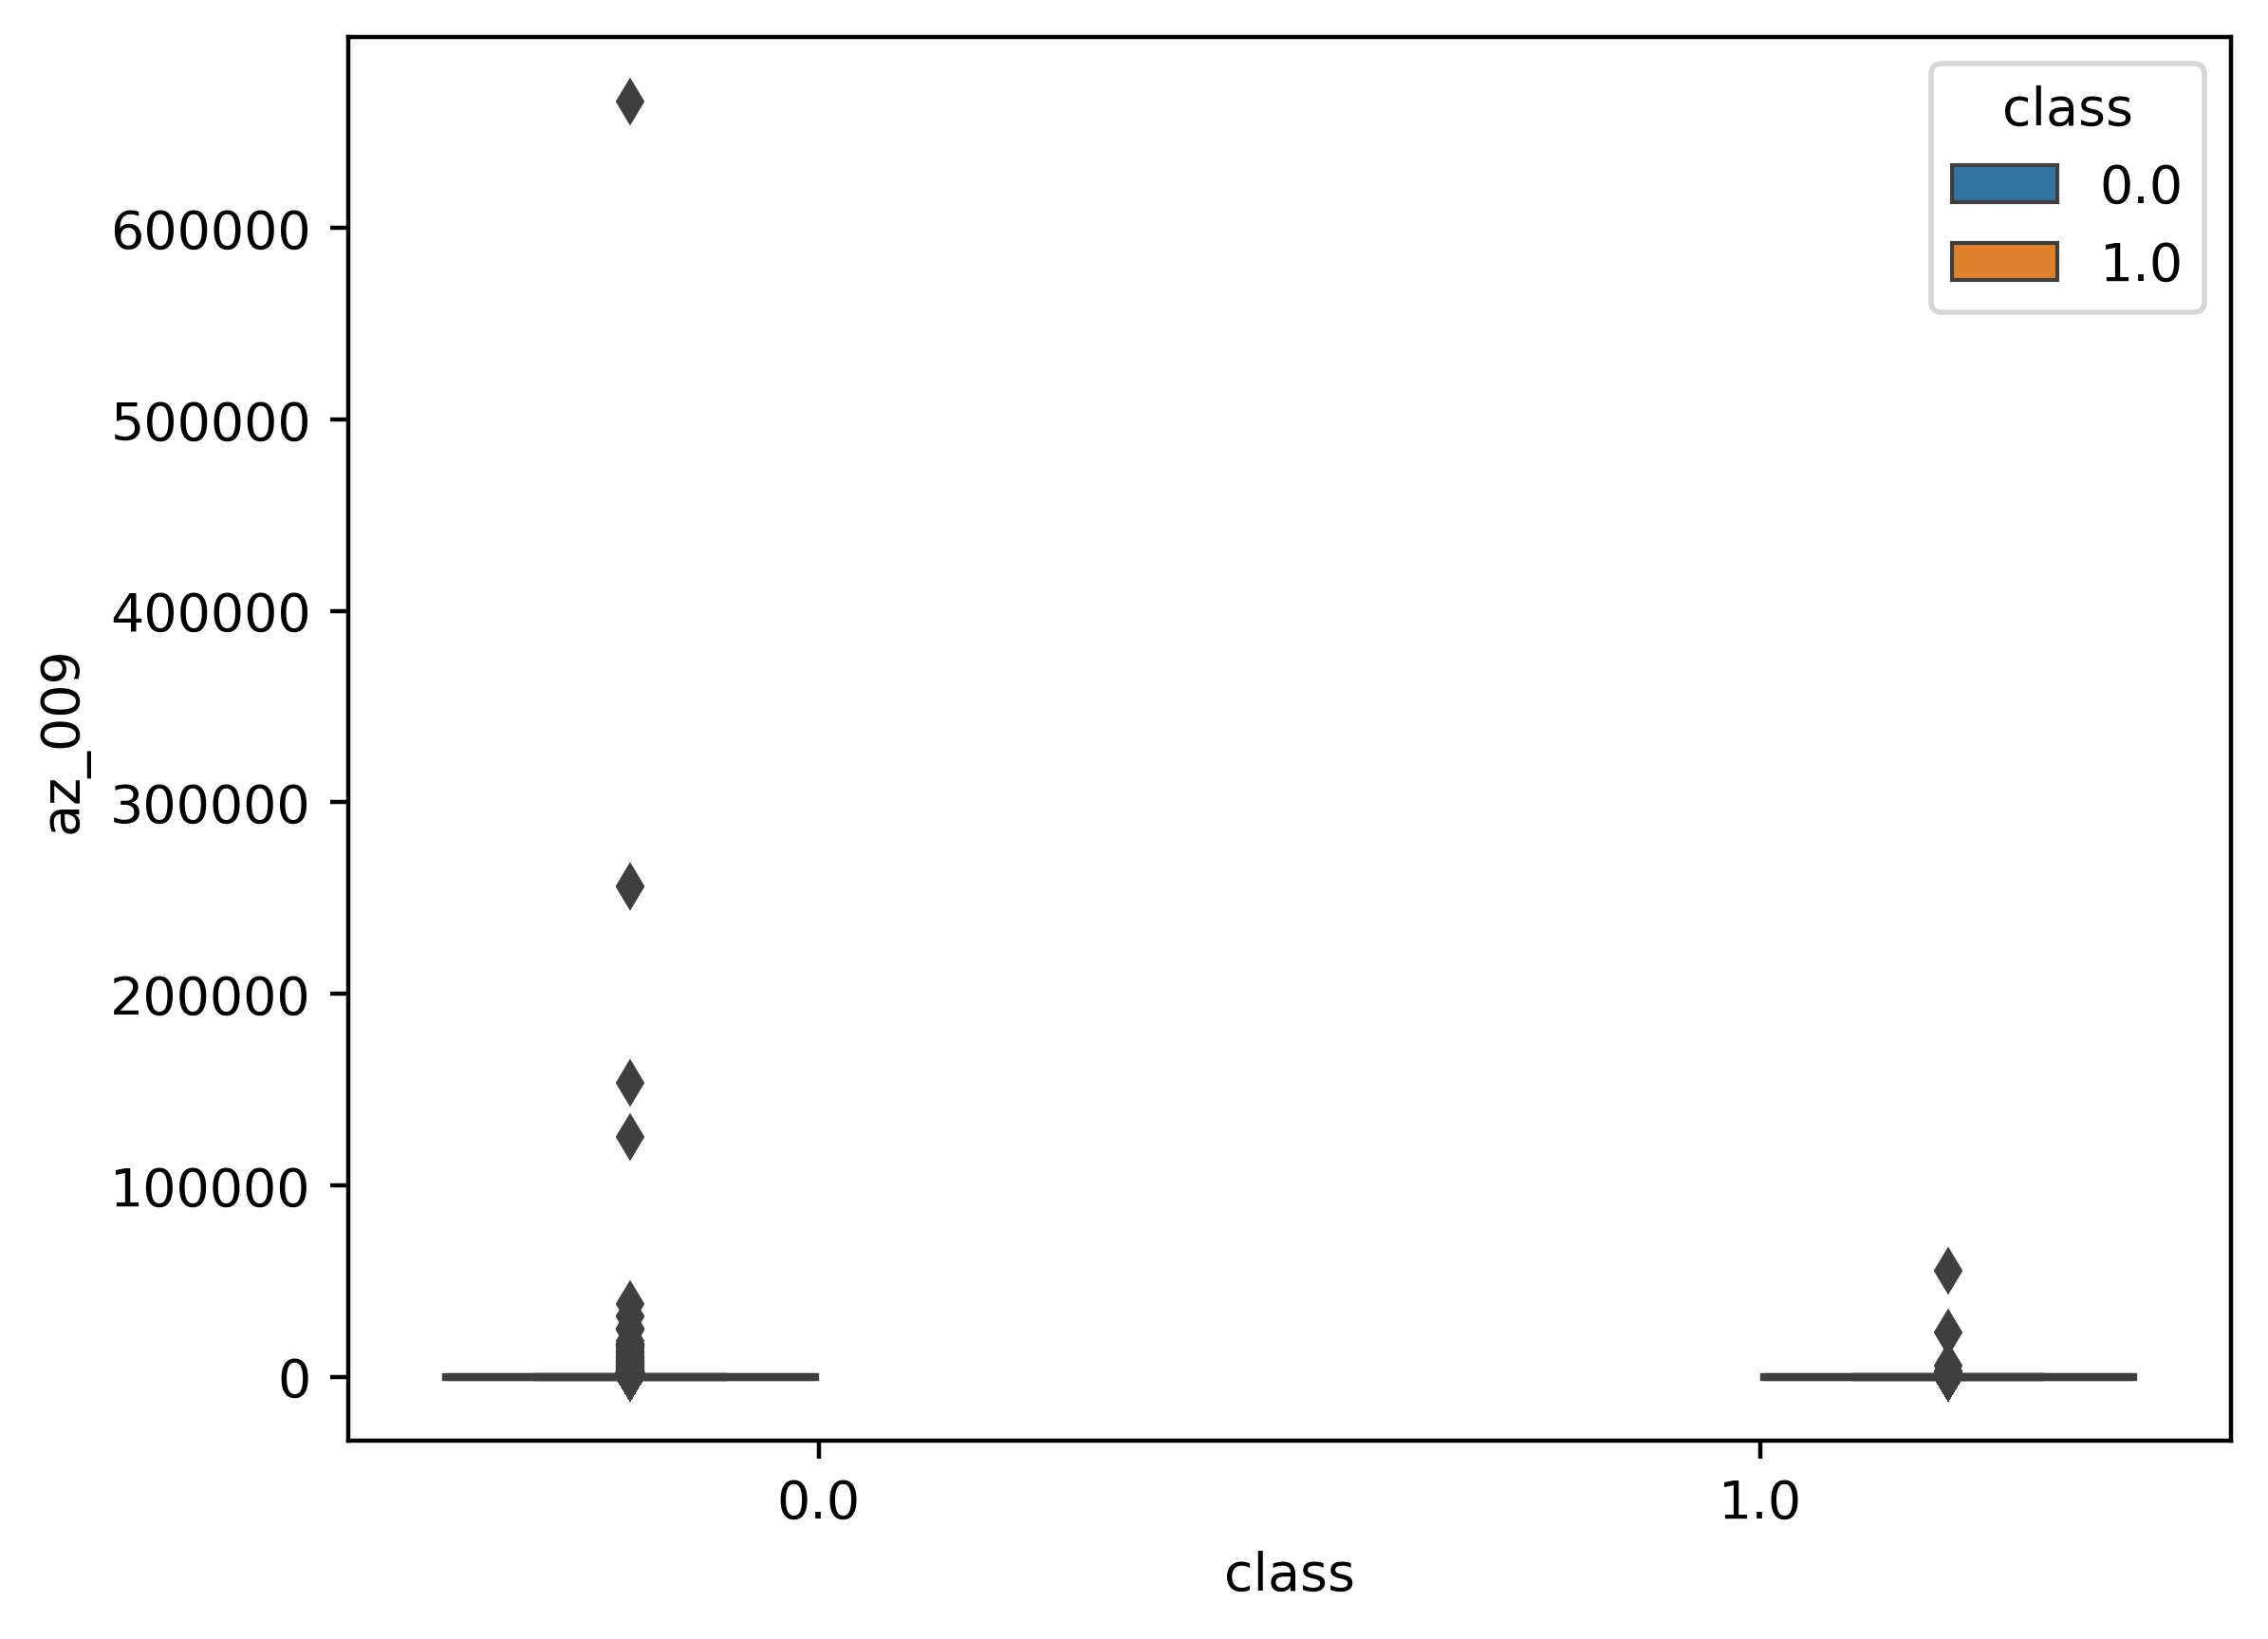

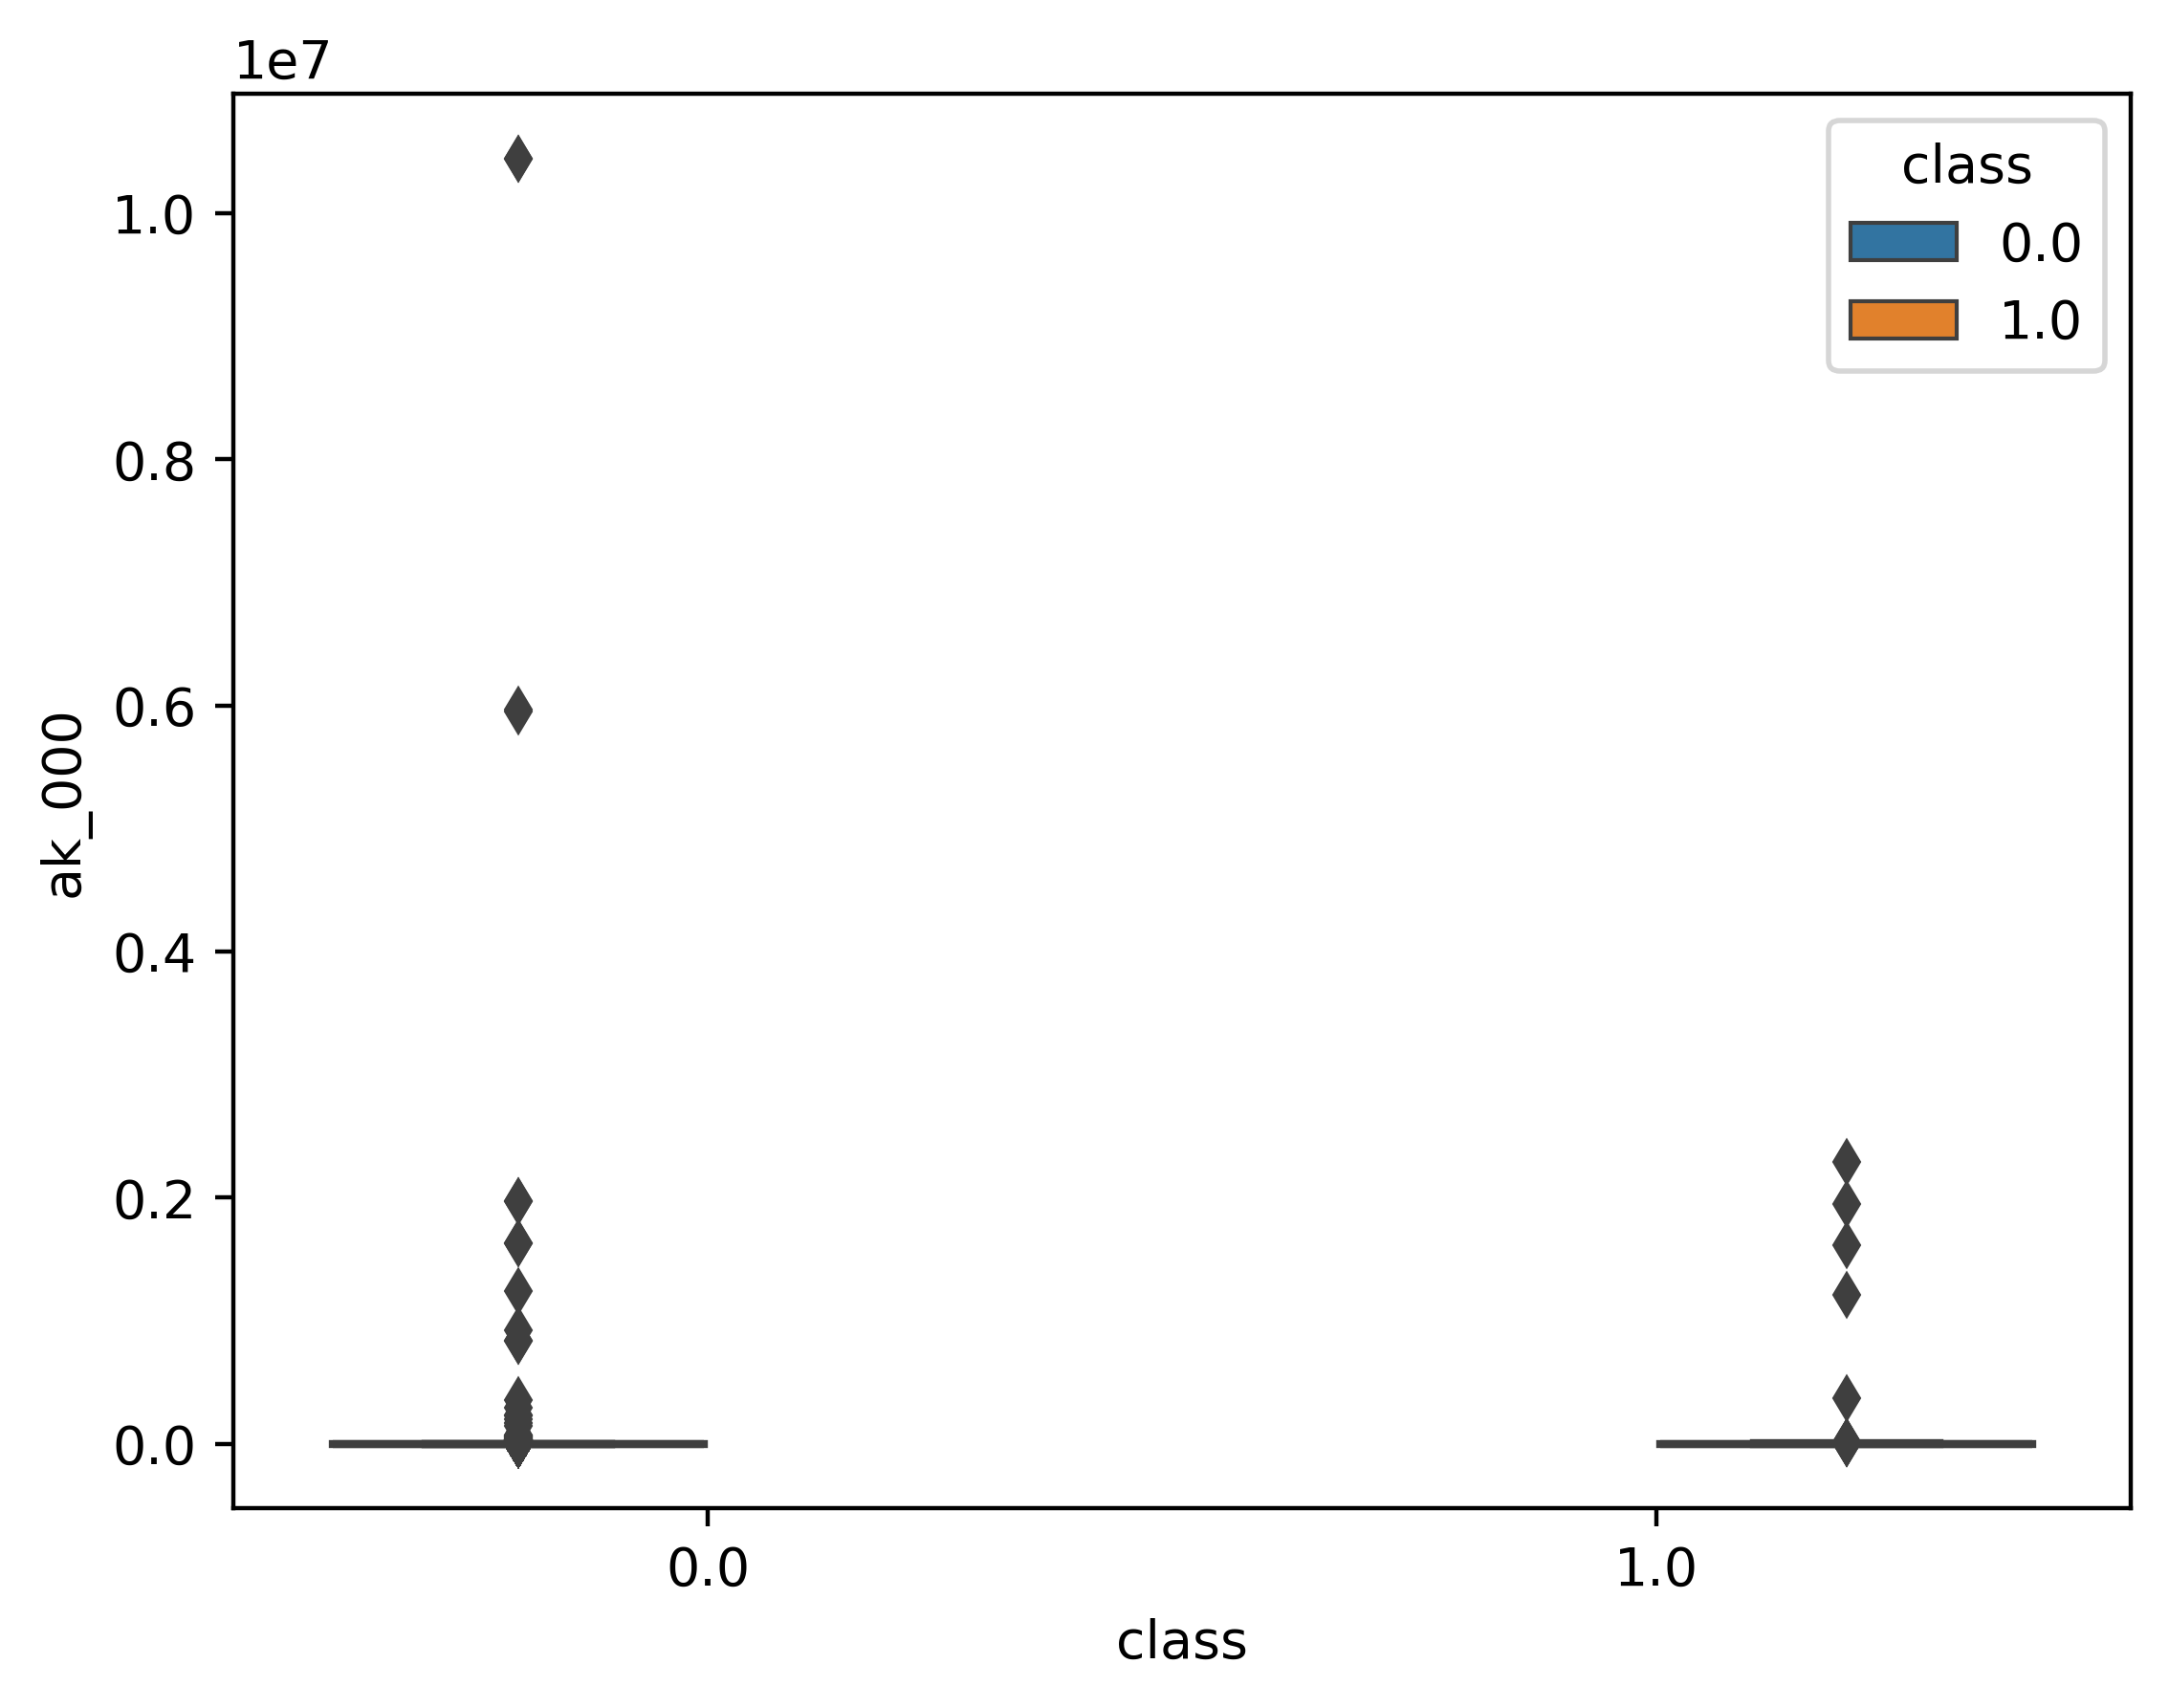

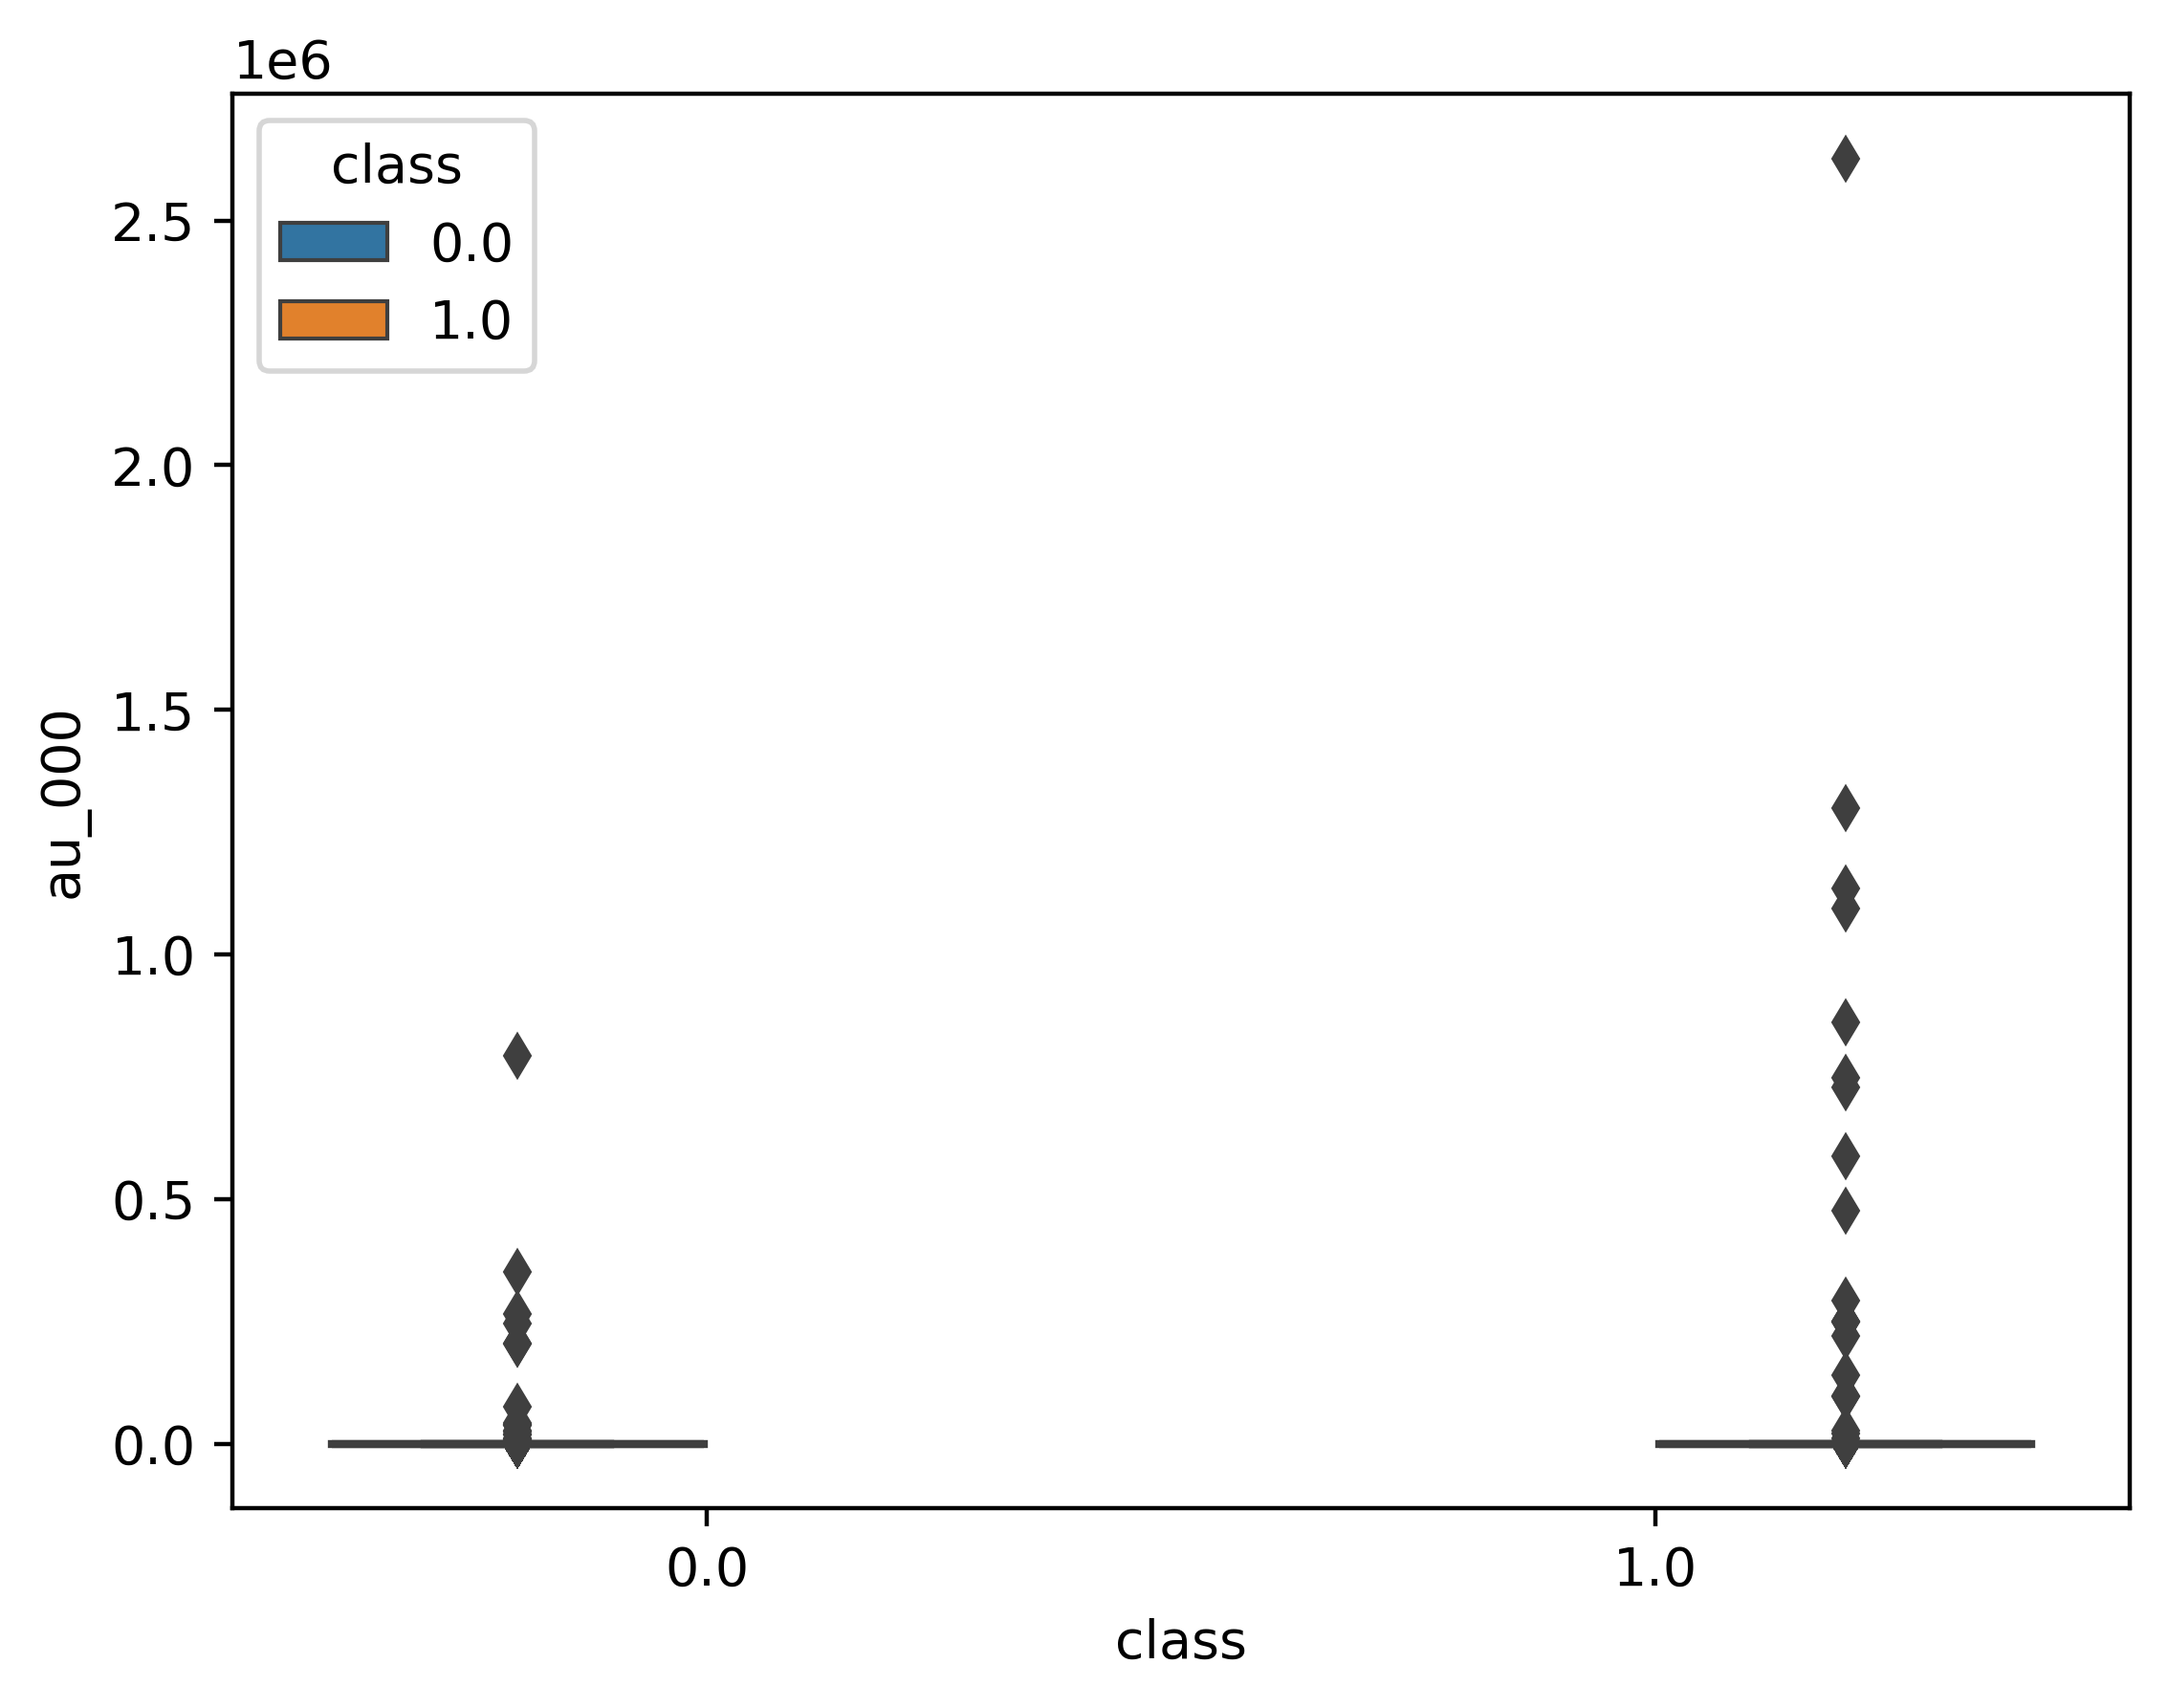

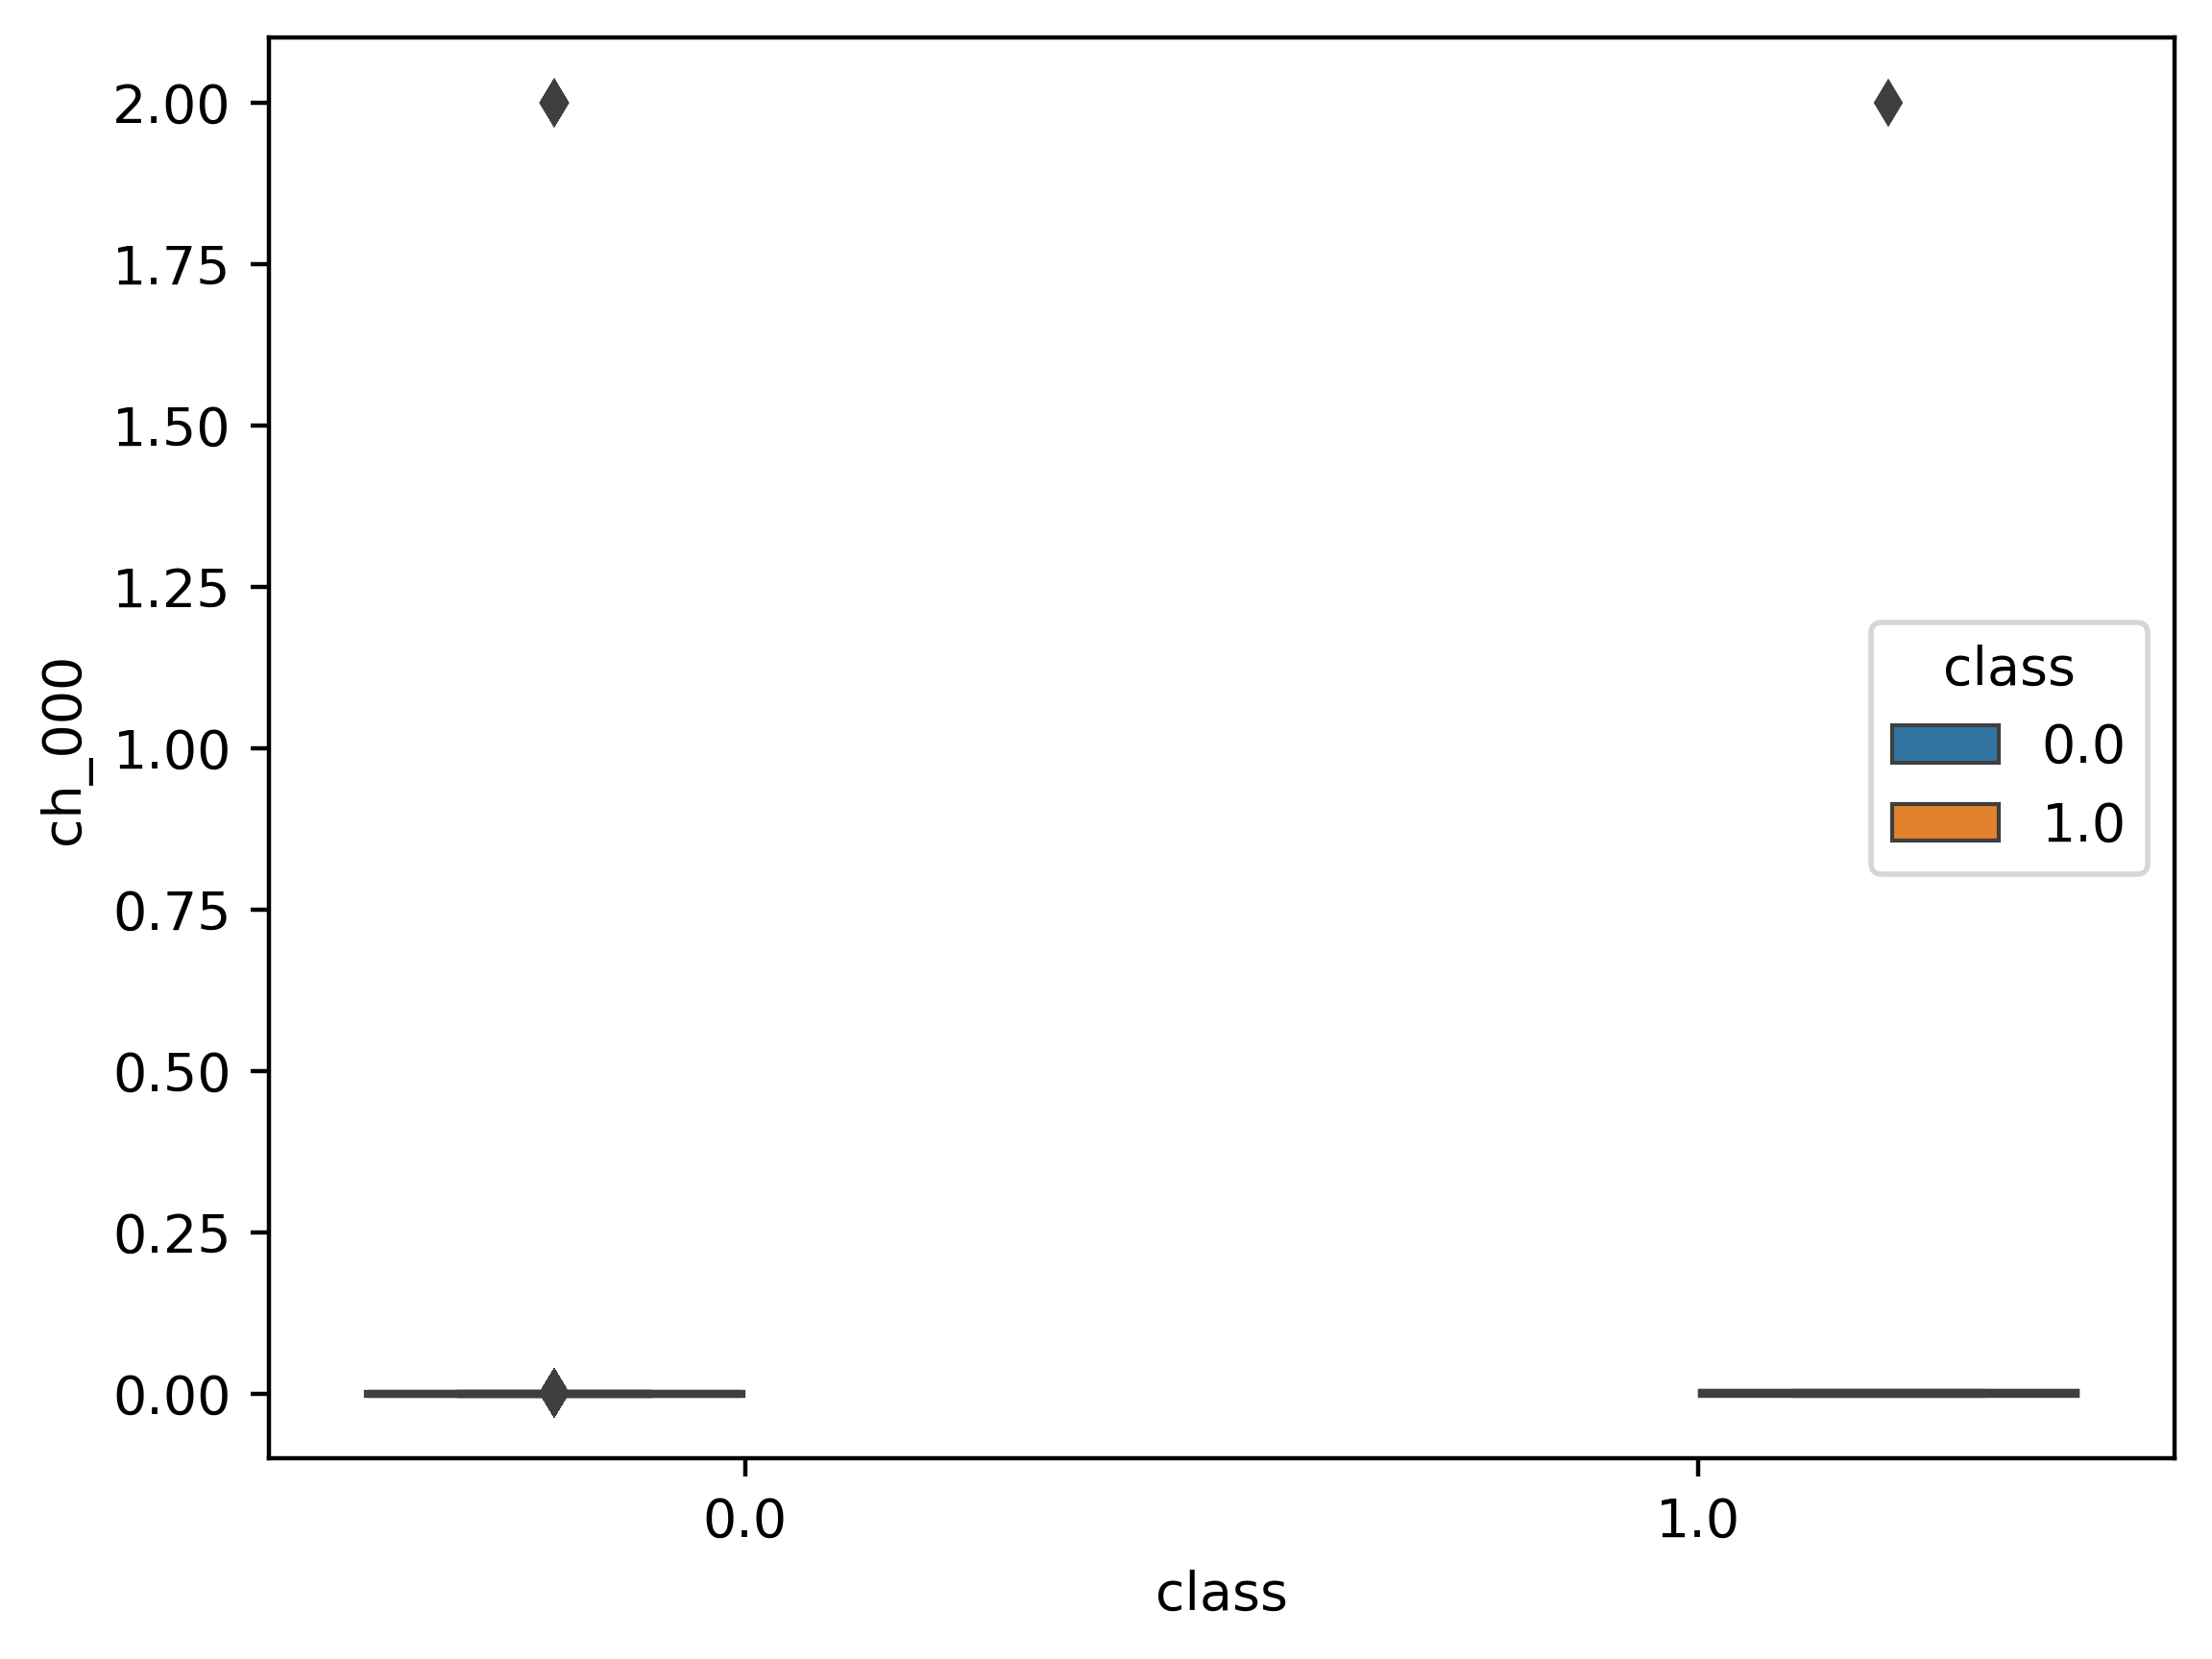

In [30]:
for feature in train_features:
    if(feature != 'class'):
        sns.boxplot(x="class", y=feature, data = df_train[[feature,"class"]], hue='class')
        plt.show()
   

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [24]:
# For training data
print(df_train['class'].value_counts())

# For test data
print(df_test['class'].value_counts())

0.0    59000
1.0     1000
Name: class, dtype: int64
0.0    15625
1.0      375
Name: class, dtype: int64


Definitely from the above information, we can say that the number of positive classes are far more less as compared to the negative classes. Hence the dataset as a whole is highly imbalanced

### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [8]:
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']


rfm = RandomForestClassifier(oob_score=True)
rfm.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [18]:
train_accuracy = rfm.score(X_train, y_train)
print("Train Accuracy : ", train_accuracy)
test_accuracy = rfm.score(X_test, y_test)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  0.9999833333333333
Test Accuracy :  0.9920625


In [14]:
y_train_pred_prob = rfm.predict_proba(X_train)[:, 1]
y_train_pred = list(map(lambda x: int(x > 0.5), y_train_pred_prob))

Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)

Confusion Matrix for Training DataSet: 
 [[59000     0]
 [    1   999]]


In [15]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_train)
print("Train Missclassification Error : ", miss_error)

Number of Data points Missclassified :  1
Train Missclassification Error :  1.6666666666666667e-05


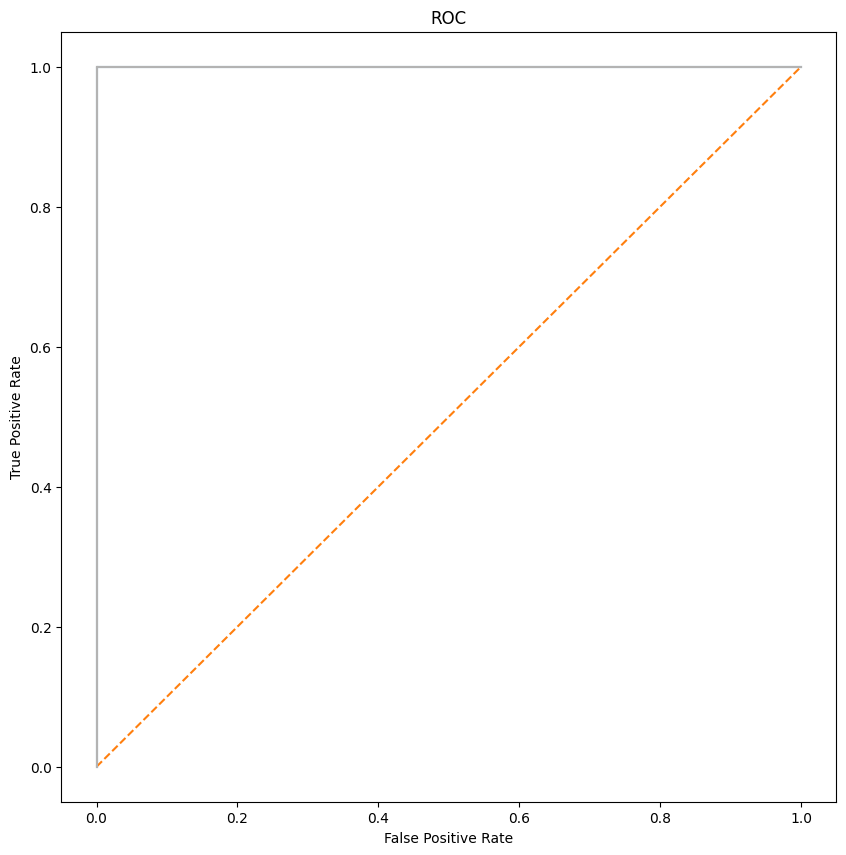

In [16]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
print('AUC curve', roc_auc_score(y_train, y_train_pred_prob))

AUC curve 1.0


In [21]:
# For test dataset

y_test_pred_prob = rfm.predict_proba(X_test)[:, 1]
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))

Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)

Confusion Matrix for Test DataSet: 
 [[15604    21]
 [  106   269]]


In [22]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_test)
print("Test Missclassification Error : ", miss_error)

Number of Data points Missclassified :  127
Test Missclassification Error :  0.0079375


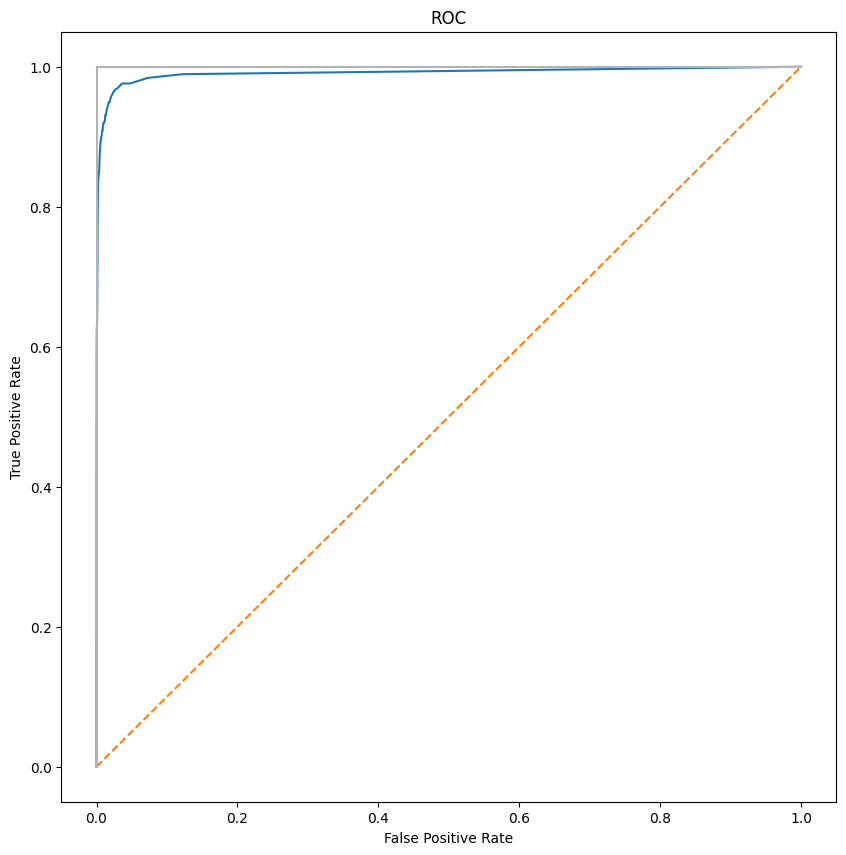

In [23]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))

AUC curve 0.9911341226666666


In [25]:
Error_OOB = 1 - rfm.oob_score_
print("Out of Bag Error Estimate : ", Error_OOB)

Out of Bag Error Estimate :  0.006099999999999994


Test Missclassification error rate is 0.0079 and Out of Bag Error Estimate is 0.006 which is less than test missclassification error rate

### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

The techniques to handle imbalanced datasets in random forests are as follows:

1) Class weights: use class weights while you define the model

2) Use of random upsampling/downsampling

In [27]:
b_rfm = RandomForestClassifier(oob_score=True, class_weight='balanced')
b_rfm.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True)

In [28]:
train_accuracy = b_rfm.score(X_train, y_train)
print("Train Accuracy : ", train_accuracy)
test_accuracy = b_rfm.score(X_test, y_test)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.9895


In [29]:
y_train_pred_prob = b_rfm.predict_proba(X_train)[:, 1]
y_train_pred = list(map(lambda x: int(x > 0.5), y_train_pred_prob))

Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)

Confusion Matrix for Training DataSet: 
 [[59000     0]
 [    0  1000]]


In [30]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_train)
print("Train Missclassification Error : ", miss_error)

Number of Data points Missclassified :  0
Train Missclassification Error :  0.0


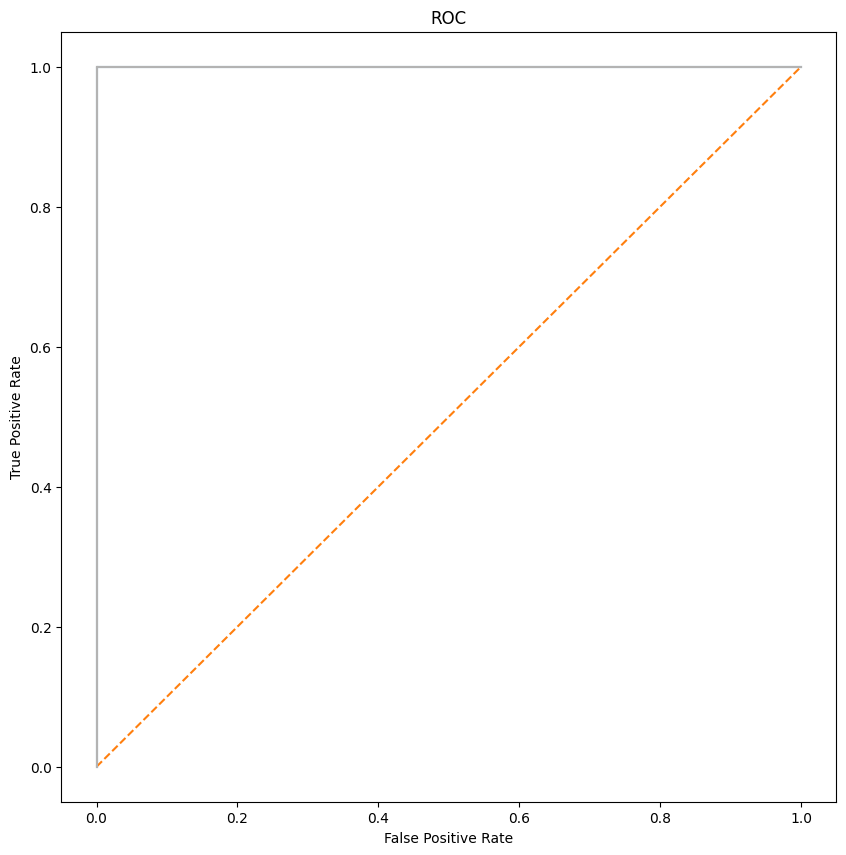

In [31]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
print('AUC curve', roc_auc_score(y_train, y_train_pred_prob))

AUC curve 1.0


In [34]:
# For test dataset

y_test_pred_prob = b_rfm.predict_proba(X_test)[:, 1]
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))

Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)

Confusion Matrix for Test DataSet: 
 [[15616     9]
 [  159   216]]


In [35]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_test)
print("Test Missclassification Error : ", miss_error)

Number of Data points Missclassified :  168
Test Missclassification Error :  0.0105


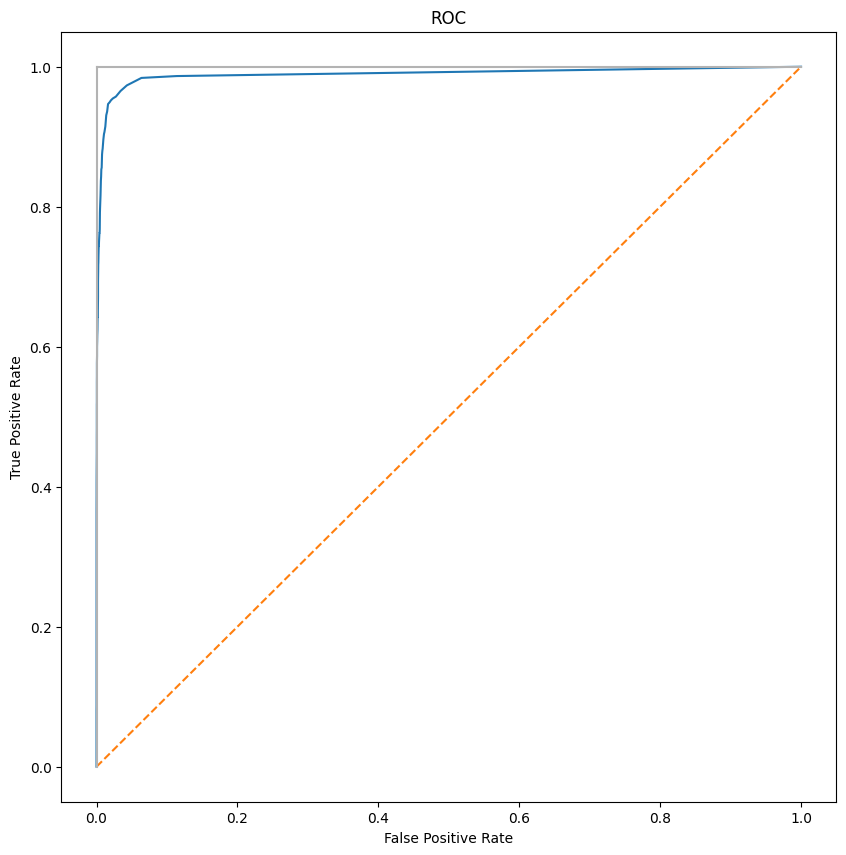

In [36]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))

AUC curve 0.9890086400000002


In [38]:
Error_OOB = 1 - b_rfm.oob_score_
print("Out of Bag Error Estimate : ", Error_OOB)

Out of Bag Error Estimate :  0.007916666666666683


Test Missclassification error rate is 0.0105 and Out of Bag Error Estimate is 0.00791 which is less than test missclassification error rate

### (e) XGBoost and Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Pj βj Xj > s as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold,and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [17]:
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

alphas = np.logspace(-3, 3, base=10)

XGBModel = xgb.XGBClassifier(objective='binary:logistic',use_label_encoder= False, n_estimators = 10)

parameters = {'reg_alpha': alphas}

XGBModelVal = GridSearchCV(XGBModel, parameters, cv=5)
XGBModelVal = XGBModelVal.fit(np.array(X_train), np.array(y_train).flatten())
best_alpha = XGBModelVal.best_params_['reg_alpha']

print("Best Alpha:", best_alpha)

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

Best Alpha: 0.15998587196060574


In [7]:
bestXGBModel = xgb.XGBClassifier(objective='binary:logistic',reg_alpha = best_alpha)

bestXGBModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
train_accuracy = bestXGBModel.score(X_train, y_train)
print("Train Accuracy : ", train_accuracy)
test_accuracy = bestXGBModel.score(X_test, y_test)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  0.9999833333333333
Test Accuracy :  0.994125


In [19]:
y_train_pred_prob = bestXGBModel.predict_proba(X_train)[:, 1]
y_train_pred = list(map(lambda x: int(x > 0.5), y_train_pred_prob))

Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)

Confusion Matrix for Training DataSet: 
 [[59000     0]
 [    1   999]]


In [20]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_train)
print("Train Missclassification Error : ", miss_error)

Number of Data points Missclassified :  1
Train Missclassification Error :  1.6666666666666667e-05


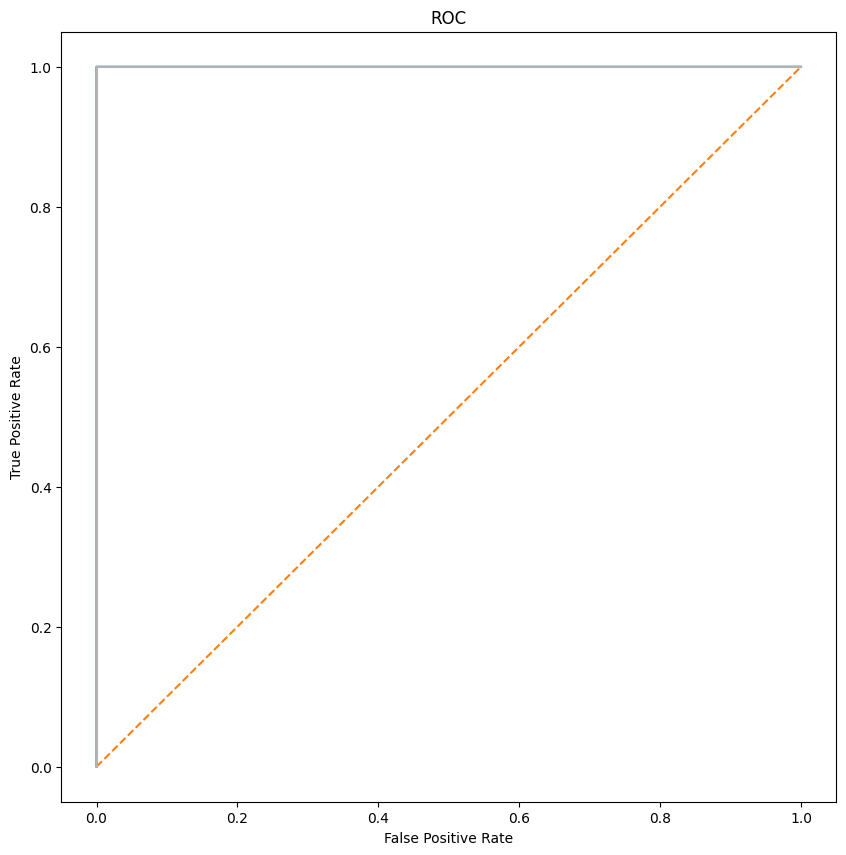

In [21]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
print('AUC curve', roc_auc_score(y_train, y_train_pred_prob))

AUC curve 0.9999997796610169


In [23]:
# For test dataset

y_test_pred_prob = bestXGBModel.predict_proba(X_test)[:, 1]
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))

Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)

Confusion Matrix for Test DataSet: 
 [[15611    14]
 [   80   295]]


In [24]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_test)
print("Test Missclassification Error : ", miss_error)

Number of Data points Missclassified :  94
Test Missclassification Error :  0.005875


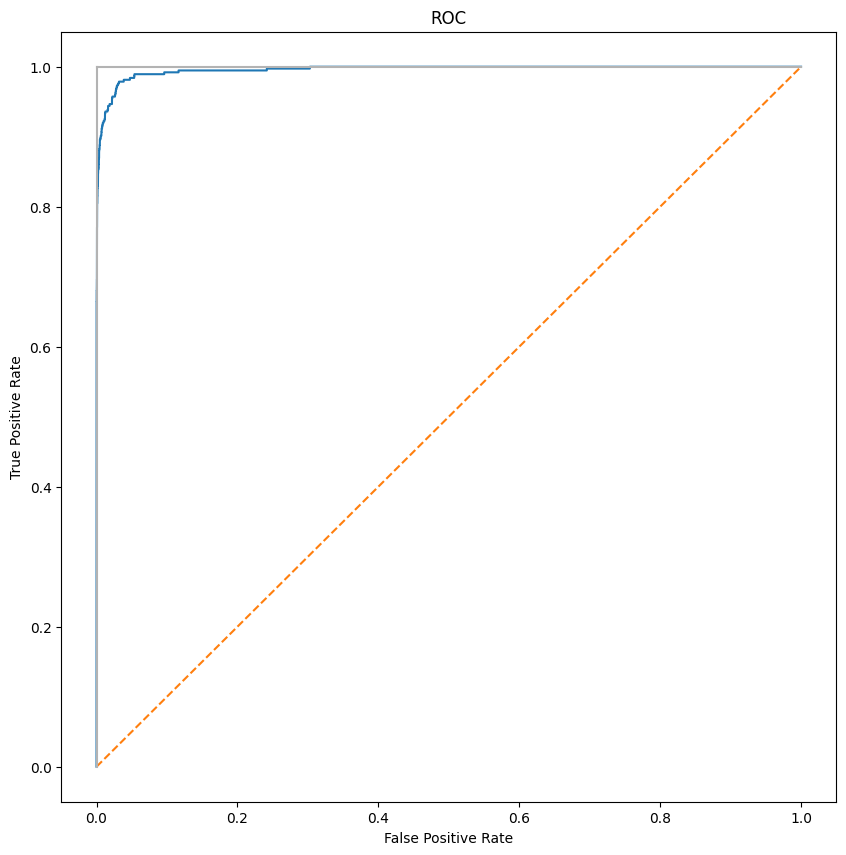

In [25]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))

AUC curve 0.9957092693333334


### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. 4 Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [32]:
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

XGBModel = xgb.XGBClassifier(objective='binary:logistic',use_label_encoder= False, n_estimators = 10)

model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', XGBModel)
    ])

parameters = {'classification__reg_alpha': np.logspace(-3, 3, base=10)}

smotXGB = GridSearchCV(model, parameters, cv = 5, scoring = 'roc_auc')
smotXGB = smotXGB.fit(np.array(X_train), np.array(y_train).flatten())

best_alpha = smotXGB.best_params_['classification__reg_alpha']

print("Best Alpha:", best_alpha)

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

Best Alpha: 8.286427728546842


In [34]:
y_train_pred_prob = smotXGB.predict_proba(X_train)[:, 1]
y_train_pred = list(map(lambda x: int(x > 0.5), y_train_pred_prob))

Confusion_Matrix = confusion_matrix(y_train, y_train_pred) 
print("Confusion Matrix for Training DataSet: \n", Confusion_Matrix)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_train)
print("Train Missclassification Error : ", miss_error)

Confusion Matrix for Training DataSet: 
 [[58003   997]
 [   48   952]]
Number of Data points Missclassified :  1045
Train Missclassification Error :  0.017416666666666667


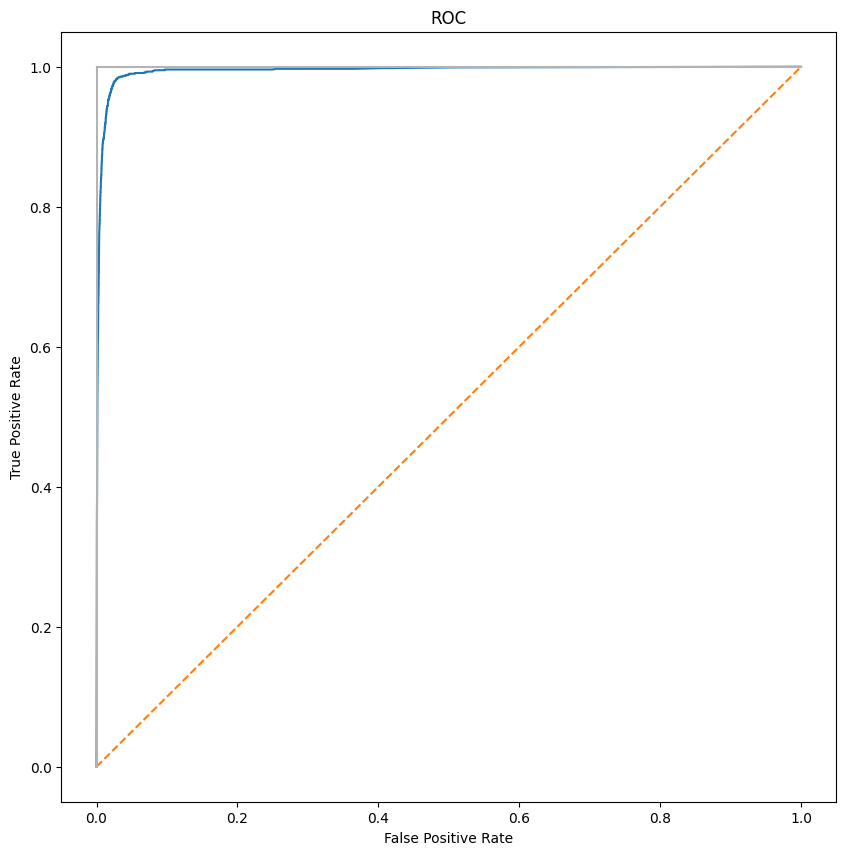

In [35]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
print('AUC curve', roc_auc_score(y_train, y_train_pred_prob))

AUC curve 0.9944052203389833


In [37]:
# For test dataset

y_test_pred_prob = smotXGB.predict_proba(X_test)[:, 1]
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))

Confusion_Matrix = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix for Test DataSet: \n", Confusion_Matrix)

Confusion Matrix for Test DataSet: 
 [[15199   426]
 [   31   344]]


In [38]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_pred_prob)
miss = Confusion_Matrix[0][1] + Confusion_Matrix[1][0]
print("Number of Data points Missclassified : ", miss)
miss_error = miss / len(y_test)
print("Test Missclassification Error : ", miss_error)

Number of Data points Missclassified :  457
Test Missclassification Error :  0.0285625


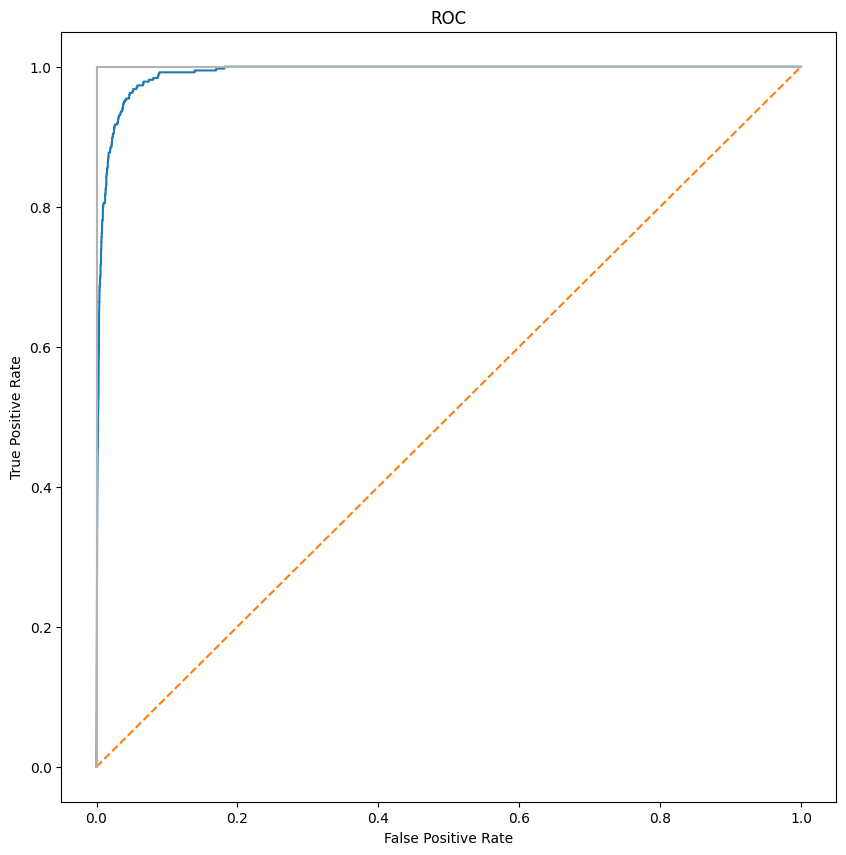

In [39]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))

AUC curve 0.991191552


In [42]:
results= []
results.append({"Model" : 'Balanced XGB using SMOTE', "Train AUC": 0.9944052203389833, "Missclassified_Points_Train": 1045, 
                "Train Error": 0.017416666666666667, "Test AUC": 0.991191552, "Missclassified_Points_Test": 457, 
                "Test Error": 0.0285625})
results.append({"Model" : 'Imbalanced XGB', "Train AUC": 0.9999997796610169, "Missclassified_Points_Train": 1, 
                "Train Error": 1.6666666666666667e-05, "Test AUC": 0.9957092693333334, "Missclassified_Points_Test": 94, 
                "Test Error": 0.005875})

pd.DataFrame(results)

Model  Train AUC  Missclassified_Points_Train  \
0  Balanced XGB using SMOTE   0.994405                         1045   
1            Imbalanced XGB   1.000000                            1   

   Train Error  Test AUC  Missclassified_Points_Test  Test Error  
0     0.017417  0.991192                         457    0.028563  
1     0.000017  0.995709                          94    0.005875

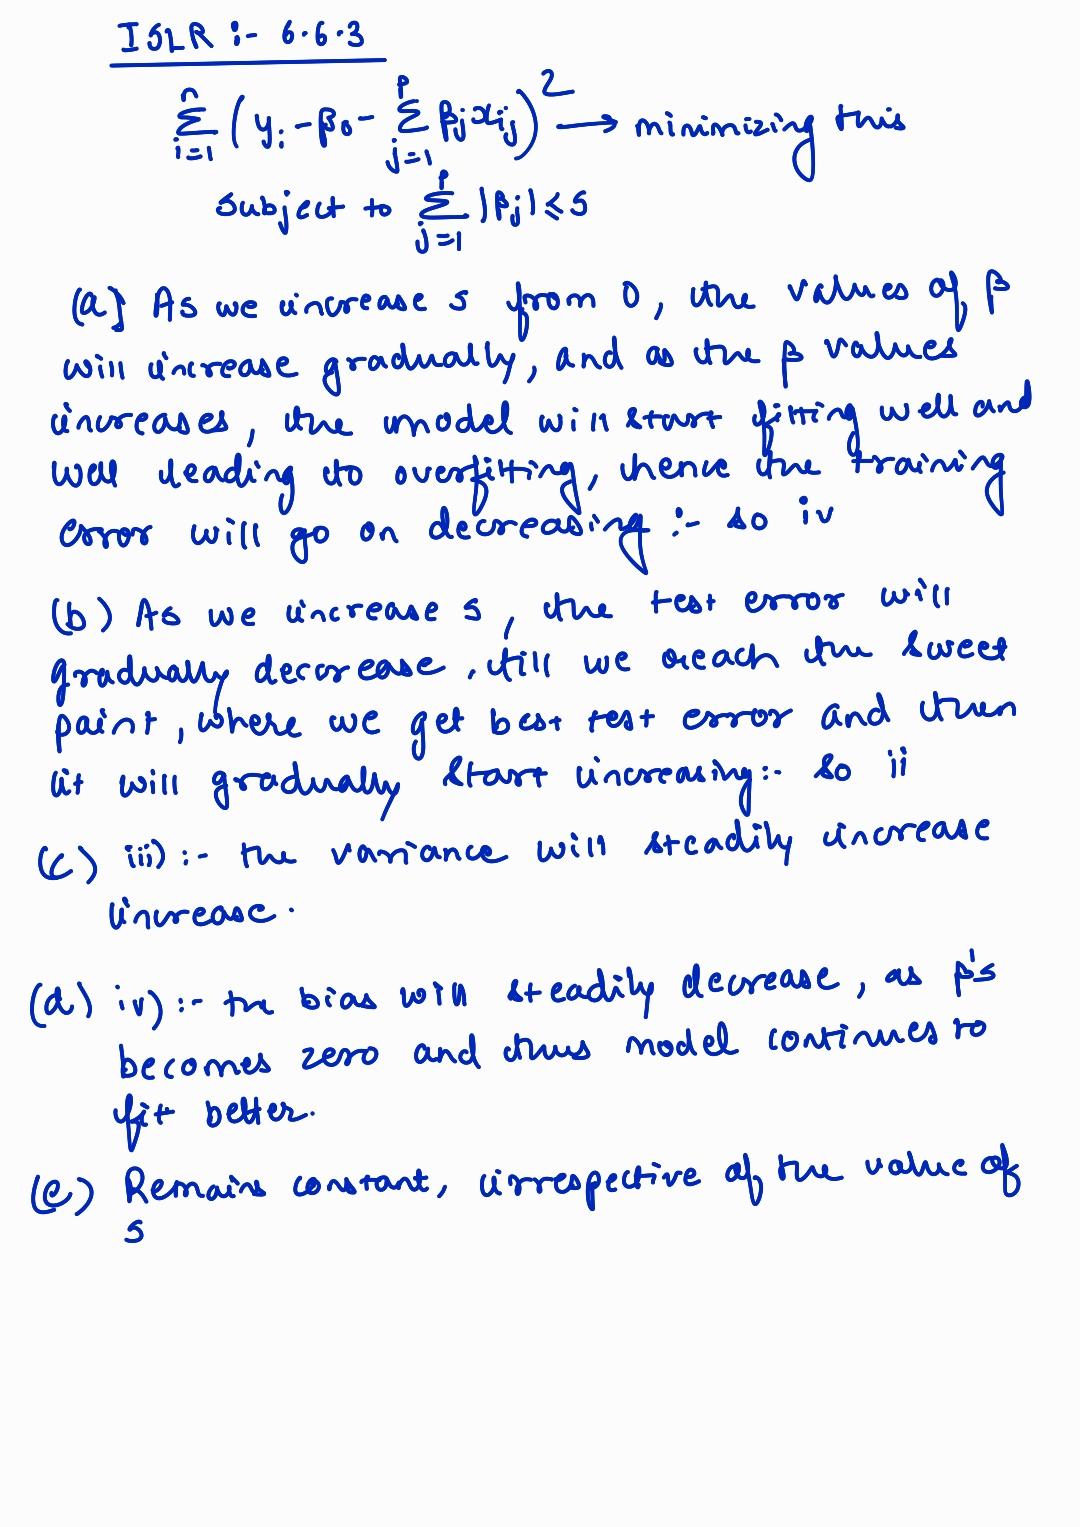

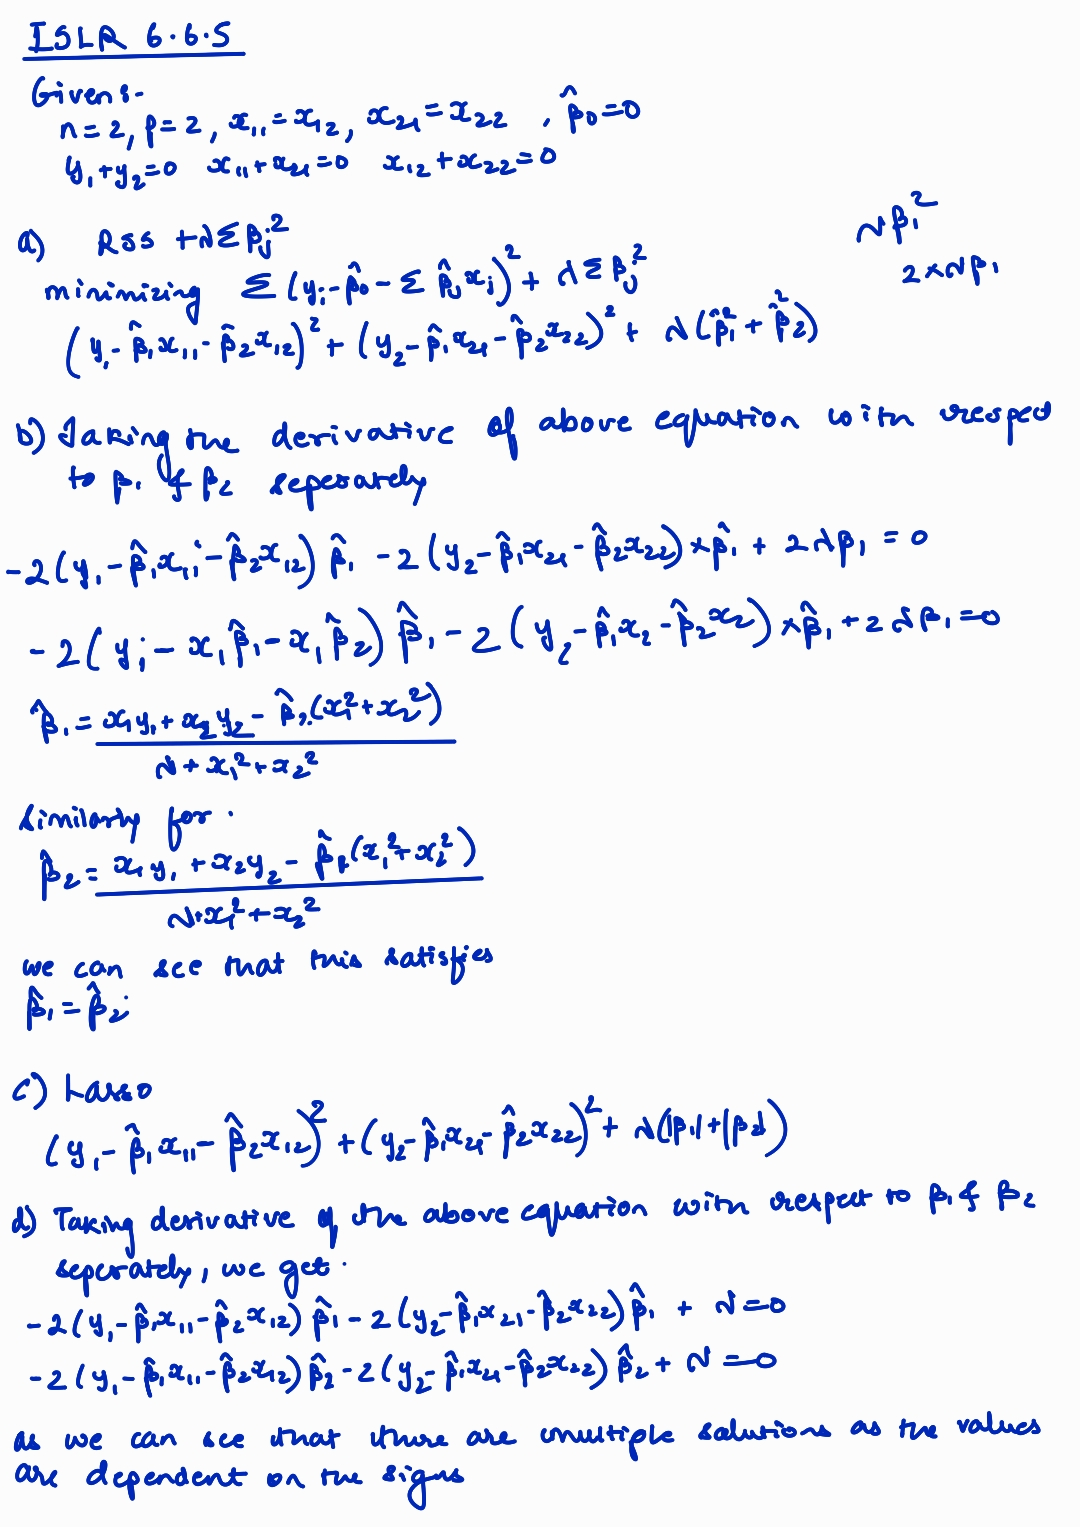

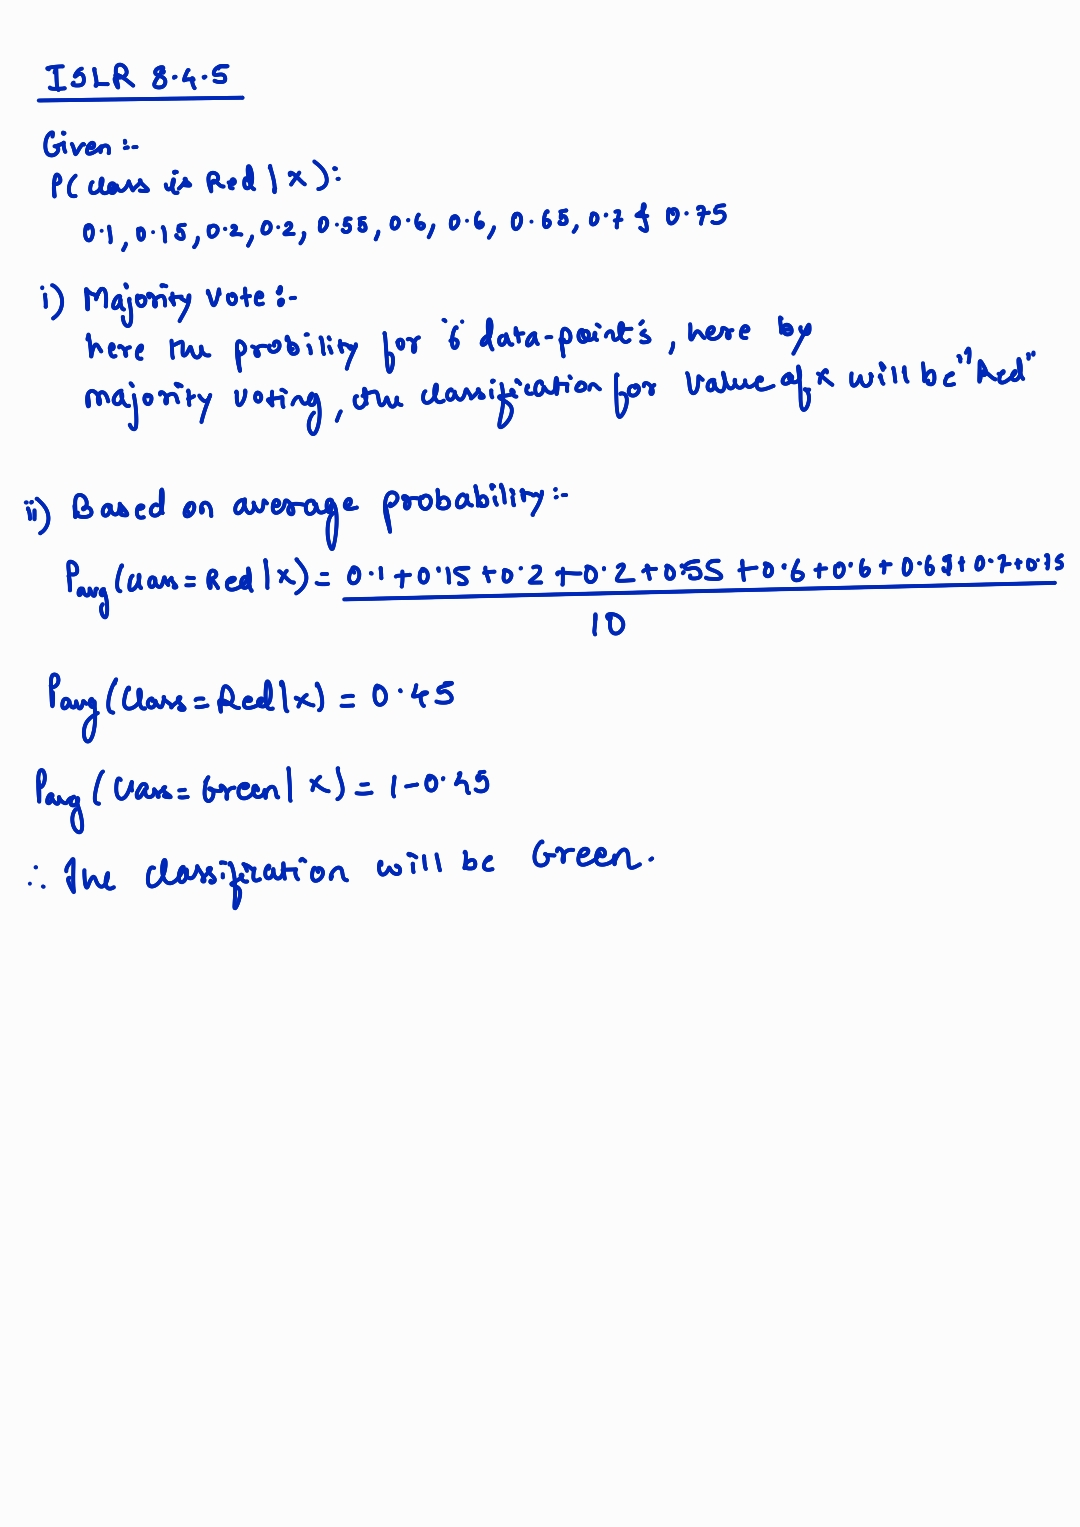

## 9.7.3

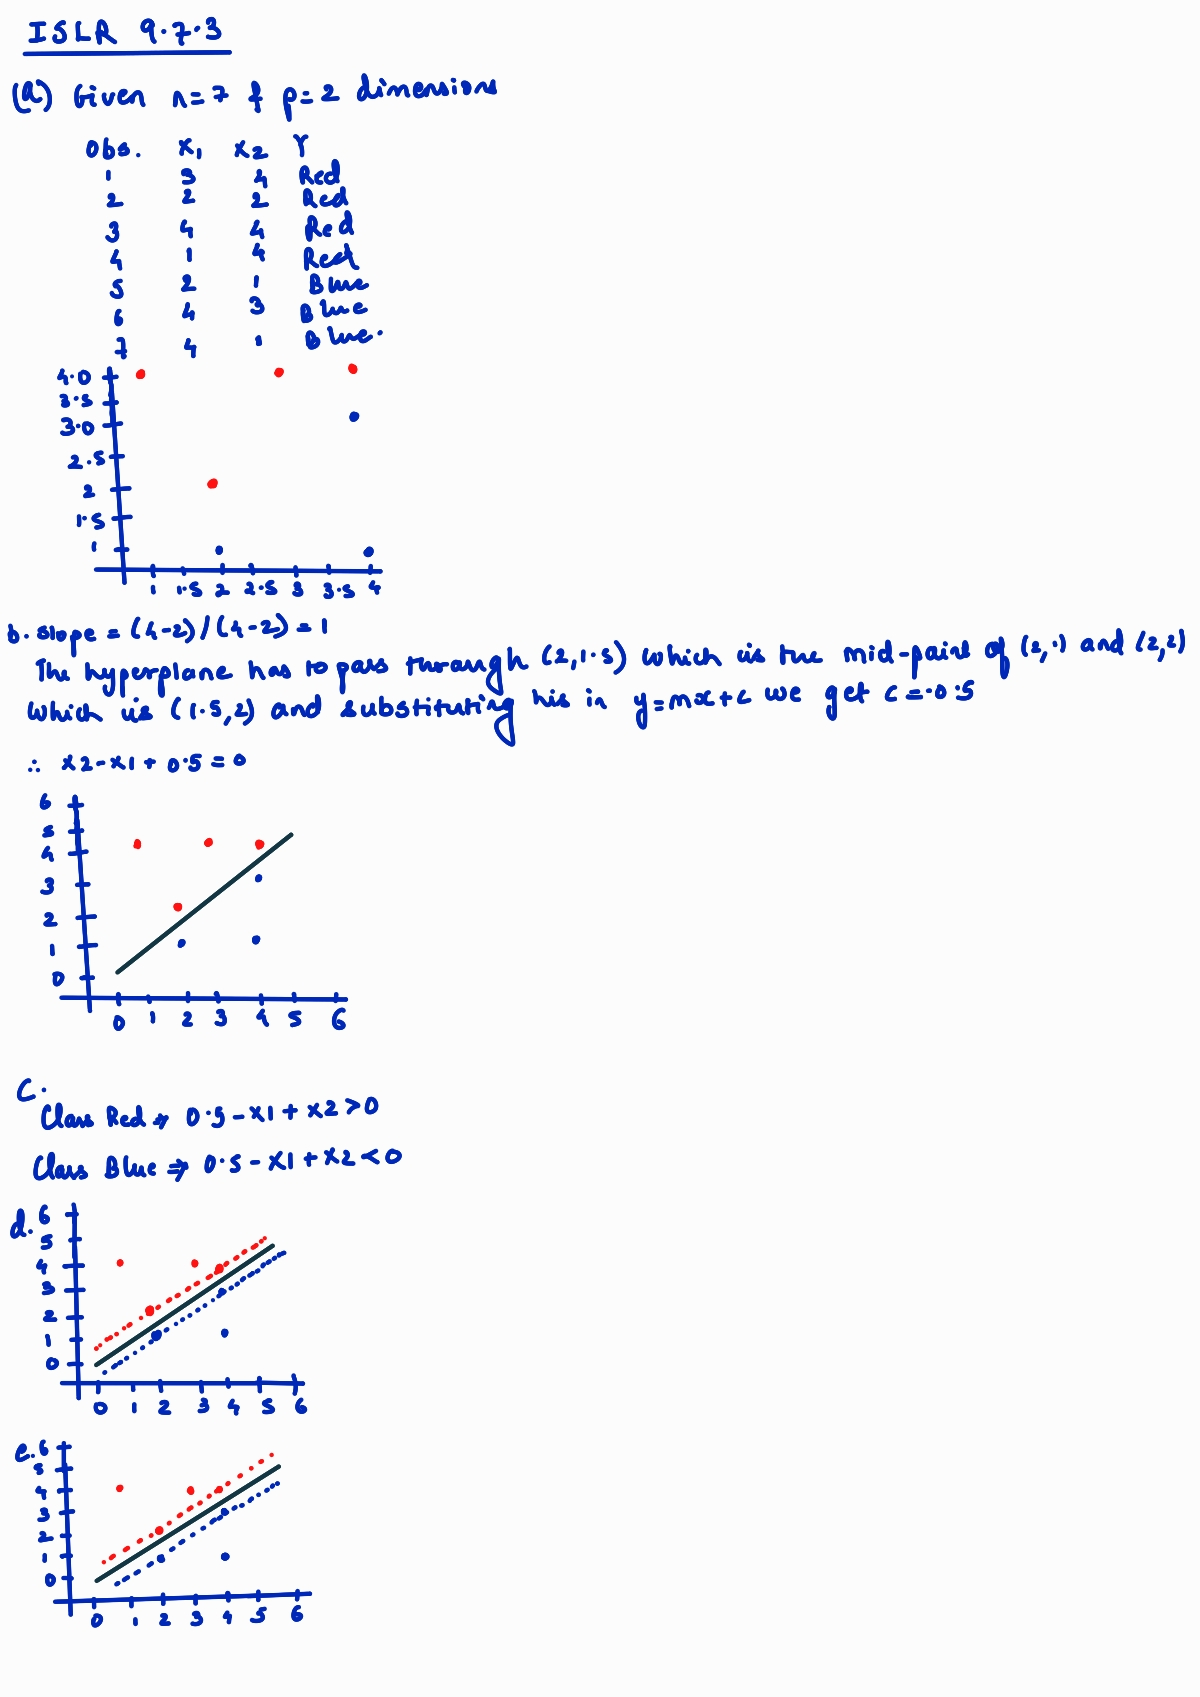

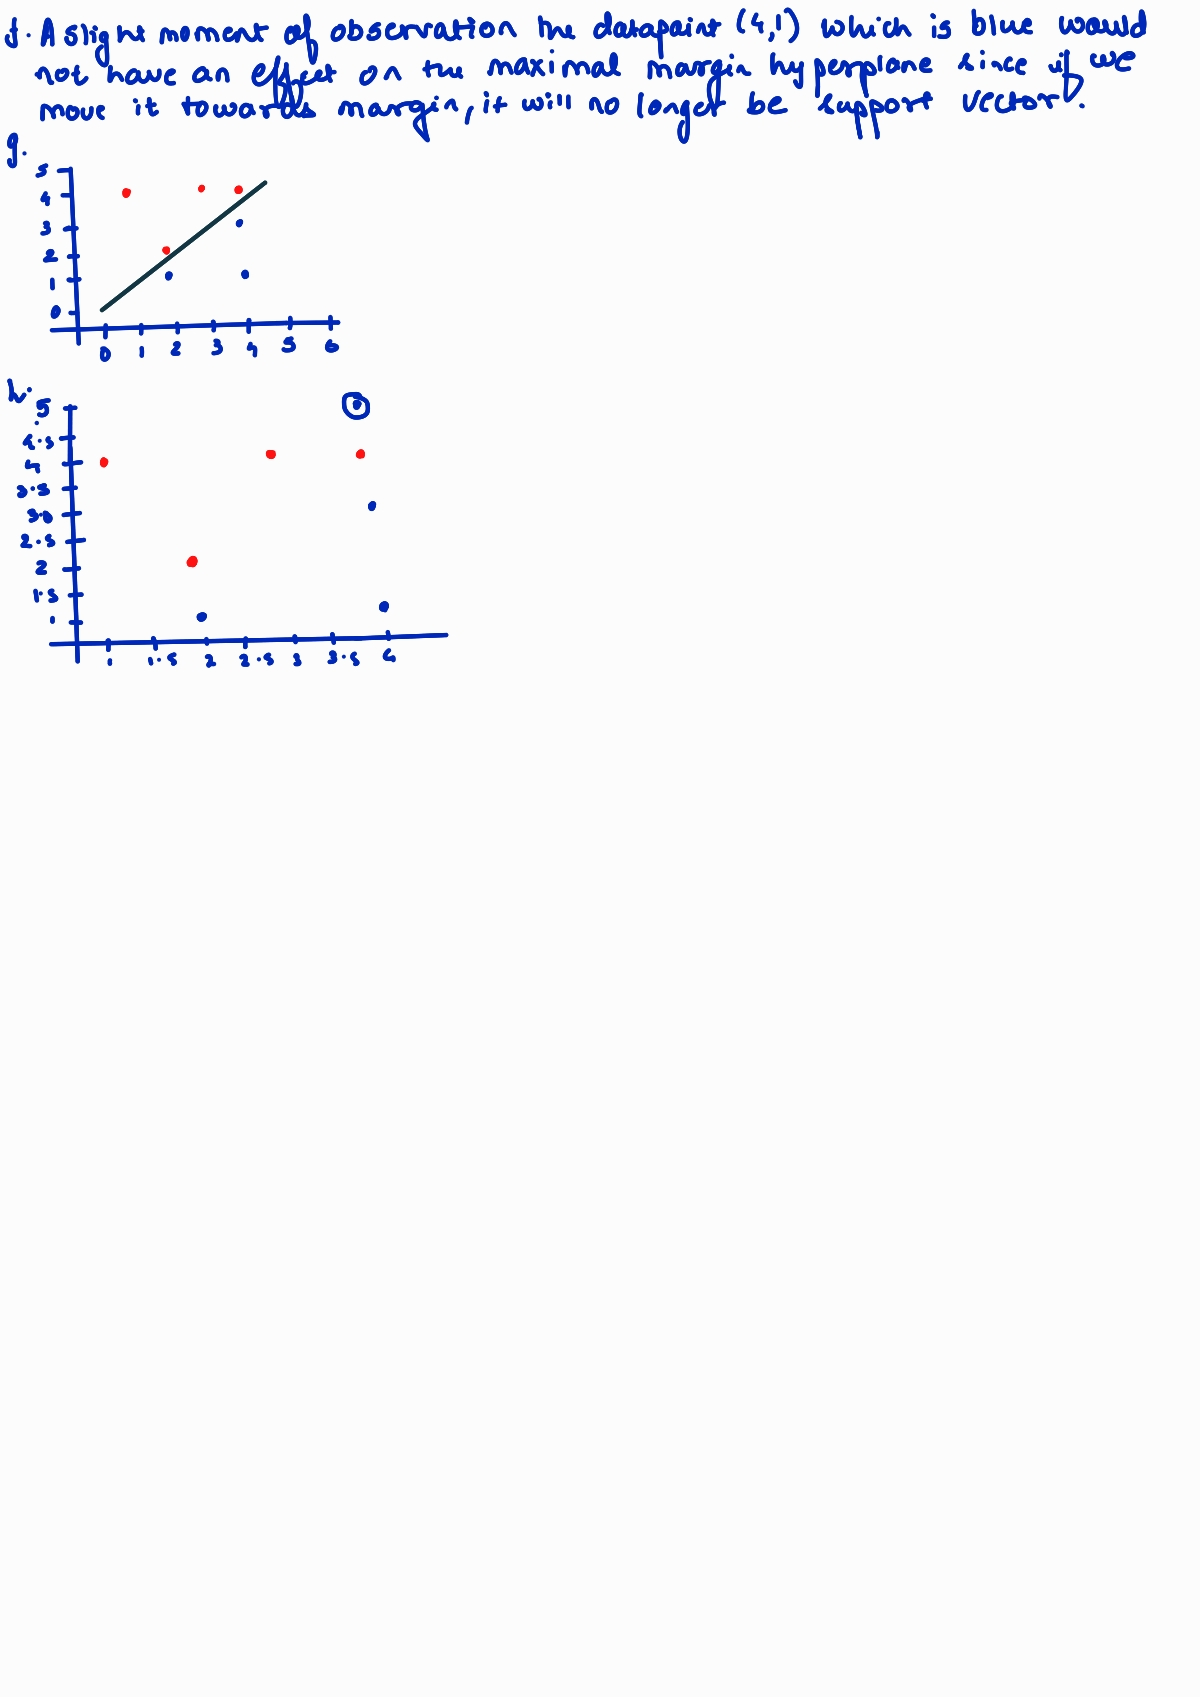